In [95]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from datetime import timedelta
import random
from prophet import Prophet
data_path = "data/"

# **Exploratory Data Analysis**

## Attendance

In [4]:
df_attendance = pd.read_csv(data_path + 'attendance.csv')
df_attendance.head()

USAGE_DATE       FACILITY_NAME  attendance
0  2018-06-01  PortAventura World       46804
1  2018-06-01      Tivoli Gardens       20420
2  2018-06-02  PortAventura World       57940
3  2018-06-02      Tivoli Gardens       29110
4  2018-06-03  PortAventura World       44365

In [5]:
df_attendance.isna().sum()

USAGE_DATE       0
FACILITY_NAME    0
attendance       0
dtype: int64

In [6]:
df_attendance["FACILITY_NAME"].value_counts()

FACILITY_NAME
Tivoli Gardens        1185
PortAventura World    1182
Name: count, dtype: int64

In [7]:
df_attendance.describe()

attendance
count   2367.000000
mean   26008.374736
std    16952.262456
min    -9991.000000
25%    13373.000000
50%    23376.000000
75%    36127.500000
max    80642.000000

There are negative attendance rows which makes no sense: to take into account when merging the data.

In [8]:
print(f"There are {df_attendance[(df_attendance["FACILITY_NAME"] == "PortAventura World")&(df_attendance["attendance"]<0)].shape[0]} rows out of {df_attendance[df_attendance["FACILITY_NAME"] == "PortAventura World"].shape[0]} with negative attendance values for PortAventura World")

There are 37 rows out of 1182 with negative attendance values for PortAventura World


In [9]:
print(f"There are {df_attendance[(df_attendance["FACILITY_NAME"] == "Tivoli Gardens")&(df_attendance["attendance"]<0)].shape[0]} rows out of {df_attendance[df_attendance["FACILITY_NAME"] == "Tivoli Gardens"].shape[0]} with negative attendance values for Tivoli Gardens")

There are 46 rows out of 1185 with negative attendance values for Tivoli Gardens


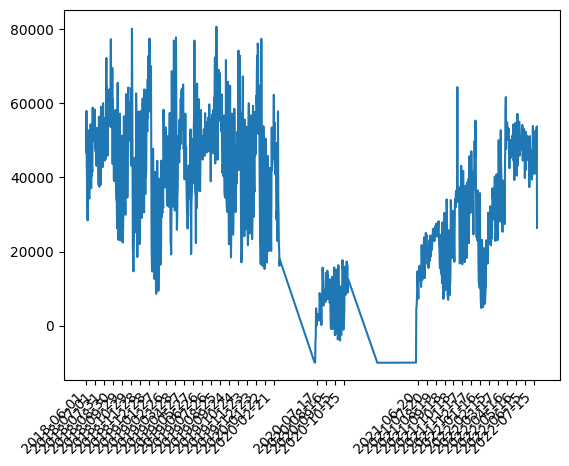

In [17]:
# Let us plot the attendance for each facility over time
plt.plot(df_attendance["USAGE_DATE"][df_attendance["FACILITY_NAME"] == "PortAventura World"], df_attendance["attendance"][df_attendance["FACILITY_NAME"] == "PortAventura World"], label="PortAventura World")
plt.xticks(df_attendance["USAGE_DATE"][df_attendance["FACILITY_NAME"]== "PortAventura World"][::30], rotation=45, ha='right')
plt.show()

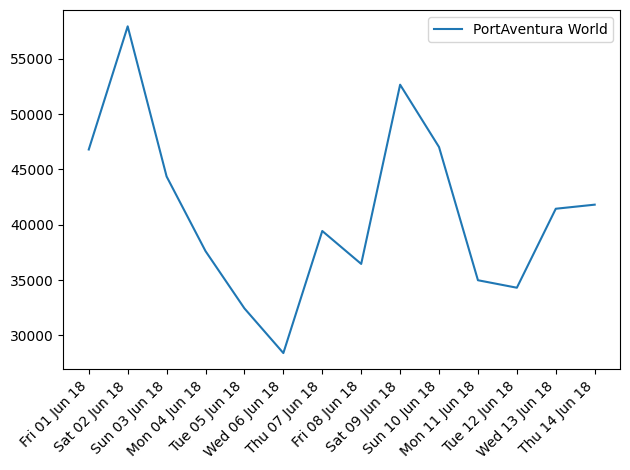

In [18]:
df_attendance["USAGE_DATE"] = pd.to_datetime(df_attendance["USAGE_DATE"])
plt.plot(
    df_attendance["USAGE_DATE"][df_attendance["FACILITY_NAME"] == "PortAventura World"][:14], 
    df_attendance["attendance"][df_attendance["FACILITY_NAME"] == "PortAventura World"][:14], 
    label="PortAventura World"
)

date_format = mdates.DateFormatter('%a %d %b %y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


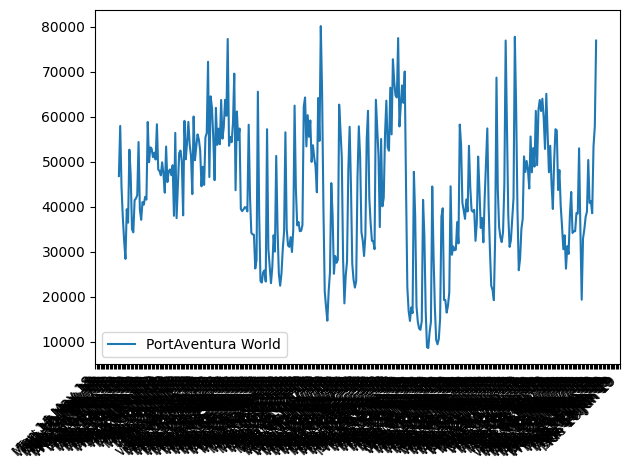

In [19]:
df_attendance["USAGE_DATE"] = pd.to_datetime(df_attendance["USAGE_DATE"])
plt.plot(
    df_attendance["USAGE_DATE"][df_attendance["FACILITY_NAME"] == "PortAventura World"][:365], 
    df_attendance["attendance"][df_attendance["FACILITY_NAME"] == "PortAventura World"][:365], 
    label="PortAventura World"
)

date_format = mdates.DateFormatter('%a %d %b %y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


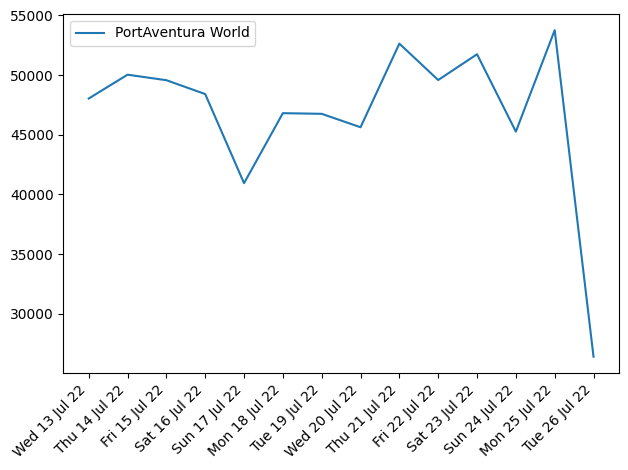

In [20]:
# Let us compare the attendance for both facilities over the last 7 days
plt.plot(df_attendance["USAGE_DATE"][df_attendance["FACILITY_NAME"] == "PortAventura World"][-14:], df_attendance["attendance"][df_attendance["FACILITY_NAME"] == "PortAventura World"][-14:], label="PortAventura World")

date_format = mdates.DateFormatter('%a %d %b %y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


## Entitity schedule

Gives information on park and attraction closure

In [21]:
df_entity_schedule = pd.read_csv(data_path + 'entity_schedule.csv')
df_entity_schedule.head()

REF_CLOSING_DESCRIPTION ENTITY_DESCRIPTION_SHORT ENTITY_TYPE  \
0                     NaN           Tivoli Gardens        PARK   
1                     NaN            Dizzy Dropper        ATTR   
2                     NaN               Sling Shot        ATTR   
3                     NaN                  Gondola        ATTR   
4                     NaN                 Monorail        ATTR   

                  DEB_TIME                 FIN_TIME              UPDATE_TIME  \
0  2018-11-19 10:00:00.000  2018-11-19 18:00:00.000  2018-11-20 08:24:32.000   
1  2022-04-07 08:30:00.000  2022-04-07 22:04:00.000  2022-04-08 08:00:30.000   
2  2018-03-28 08:37:00.000  2018-03-28 18:12:00.000  2018-03-29 08:24:37.000   
3  2019-04-11 09:55:00.000  2019-04-11 20:19:00.000  2019-04-12 08:59:29.000   
4  2019-06-29 08:30:00.000  2019-06-29 20:35:00.000  2019-06-30 08:14:16.000   

    WORK_DATE  
0  2018-11-19  
1  2022-04-07  
2  2018-03-28  
3  2019-04-11  
4  2019-06-29

In [22]:
df_entity_schedule.shape

(38307, 7)

In [23]:
for column in df_entity_schedule.columns:
    print(df_entity_schedule[column].value_counts())
    print("")

REF_CLOSING_DESCRIPTION
Fermeture Réhab             3613
Fermeture Opérationnelle     859
Name: count, dtype: int64

ENTITY_DESCRIPTION_SHORT
Tivoli Gardens        1864
PortAventura World    1864
Flying Coaster         932
Crazy Bus              932
Spiral Slide           932
Superman Ride          932
Drop Tower             932
Merry Go Round         932
Bumper Cars            932
Giant Wheel            932
Roller Coaster         932
Bungee Jump            932
Go-Karts               932
Haunted House          932
Zipline                932
Pirate Ship            932
Crazy Dance            932
Circus Train           932
Dizzy Dropper          932
Rapids Ride            932
Log Flume              932
Water Ride             932
Kiddie Coaster         932
Free Fall              932
Inverted Coaster       932
Himalaya Ride          932
Giga Coaster           932
Spinning Coaster       932
Swing Ride             932
Power Tower            931
Reverse Bungee         931
Scooby Doo           

In [24]:
df_entity_schedule[df_entity_schedule["ENTITY_TYPE"]=="PARK"].groupby("ENTITY_DESCRIPTION_SHORT").agg({"REF_CLOSING_DESCRIPTION":lambda x:x.notnull().sum(),"ENTITY_DESCRIPTION_SHORT":"count"})

REF_CLOSING_DESCRIPTION  ENTITY_DESCRIPTION_SHORT
ENTITY_DESCRIPTION_SHORT                                                   
PortAventura World                              0                      1864
Tivoli Gardens                                  0                      1864

In [25]:
df_closures = df_entity_schedule[df_entity_schedule["ENTITY_TYPE"]=="ATTR"].groupby("ENTITY_DESCRIPTION_SHORT").agg(
    num_of_closures=("REF_CLOSING_DESCRIPTION",lambda x:x.notnull().sum()),
    num_of_total_days=("ENTITY_DESCRIPTION_SHORT","count")).reset_index()
df_closures["percentage_of_closures"] = df_closures["num_of_closures"]/df_closures["num_of_total_days"]
df_closures = df_closures.sort_values("percentage_of_closures",ascending=False)
df_closures

ENTITY_DESCRIPTION_SHORT  num_of_closures  num_of_total_days  \
35                 Top Spin              562                931   
16         Inverted Coaster              482                932   
19           Merry Go Round              479                932   
22              Pirate Ship              436                932   
34             Tilt-A-Whirl               19                 53   
36            Vertical Drop               19                 53   
29               Sling Shot              276                931   
15            Himalaya Ride              257                932   
21               Oz Theatre              201                930   
13                  Gondola              170                931   
11             Giga Coaster              161                932   
7                Drop Tower              149                932   
5               Crazy Dance              144                932   
1               Bumper Cars              136                932   
2               Bungee Jump              127                932   
32            Superman Ride              122                932   
17           Kiddie Coaster              121                932   
24              Rapids Ride              118                932   
20                 Monorail              102                931   
18                Log Flume               81                932   
12                 Go-Karts               47                932   
6             Dizzy Dropper               37                932   
8            Flying Coaster               36                932   
37               Water Ride               35                932   
33               Swing Ride               29                932   
3              Circus Train               27                932   
23              Power Tower               26                931   
10              Giant Wheel               16                932   
0            Aeroplane Ride               15                931   
14            Haunted House               11                932   
28                   Skyway                8                931   
25           Reverse Bungee                8                931   
31             Spiral Slide                5                932   
9                 Free Fall                5                932   
38                  Zipline                5                932   
30         Spinning Coaster                0                932   
27               Scooby Doo                0                931   
26           Roller Coaster                0                932   
4                 Crazy Bus                0                932   

    percentage_of_closures  
35                0.603652  
16                0.517167  
19                0.513948  
22                0.467811  
34                0.358491  
36                0.358491  
29                0.296455  
15                0.275751  
21                0.216129  
13                0.182599  
11                0.172747  
7                 0.159871  
5                 0.154506  
1                 0.145923  
2                 0.136266  
32                0.130901  
17                0.129828  
24                0.126609  
20                0.109560  
18                0.086910  
12                0.050429  
6                 0.039700  
8                 0.038627  
37                0.037554  
33                0.031116  
3                 0.028970  
23                0.027927  
10                0.017167  
0                 0.016112  
14                0.011803  
28                0.008593  
25                0.008593  
31                0.005365  
9                 0.005365  
38                0.005365  
30                0.000000  
27                0.000000  
26                0.000000  
4                 0.000000

## Link attraction park

A mapping of each attraction with its correpsonding park

In [ ]:
df_link_attraction_park = pd.read_csv(data_path + 'link_attraction_park.csv')
df_link_attraction_park["attraction"] = df_link_attraction_park["ATTRACTION;PARK"].str.split(";").str[0]
df_link_attraction_park["park"] = df_link_attraction_park["ATTRACTION;PARK"].str.split(";").str[1]
df_link_attraction_park = df_link_attraction_park.drop("ATTRACTION;PARK",axis=1)
df_link_attraction_park = df_link_attraction_park.sort_values("park")
df_link_attraction_park

attraction                park
19    Merry Go Round  PortAventura World
36     Vertical Drop  PortAventura World
33        Swing Ride  PortAventura World
32     Superman Ride  PortAventura World
31      Spiral Slide  PortAventura World
30  Spinning Coaster  PortAventura World
26    Roller Coaster  PortAventura World
24       Rapids Ride  PortAventura World
21        Oz Theatre  PortAventura World
37        Water Ride  PortAventura World
17    Kiddie Coaster  PortAventura World
16  Inverted Coaster  PortAventura World
15     Himalaya Ride  PortAventura World
14     Haunted House  PortAventura World
38           Zipline  PortAventura World
12          Go-Karts  PortAventura World
1        Bumper Cars  PortAventura World
2        Bungee Jump  PortAventura World
3       Circus Train  PortAventura World
5        Crazy Dance  PortAventura World
7         Drop Tower  PortAventura World
6      Dizzy Dropper  PortAventura World
9          Free Fall  PortAventura World
11      Giga Coaster  PortAventura World
10       Giant Wheel  PortAventura World
8     Flying Coaster  PortAventura World
35          Top Spin      Tivoli Gardens
34      Tilt-A-Whirl      Tivoli Gardens
18         Log Flume      Tivoli Gardens
4          Crazy Bus      Tivoli Gardens
22       Pirate Ship      Tivoli Gardens
28            Skyway      Tivoli Gardens
27        Scooby Doo      Tivoli Gardens
13           Gondola      Tivoli Gardens
25    Reverse Bungee      Tivoli Gardens
20          Monorail      Tivoli Gardens
23       Power Tower      Tivoli Gardens
29        Sling Shot      Tivoli Gardens
0     Aeroplane Ride      Tivoli Gardens

## Waiting times

In [26]:
df_waiting_times = pd.read_csv(data_path + 'waiting_times.csv')
df_waiting_times.head()

WORK_DATE                 DEB_TIME  DEB_TIME_HOUR  \
0  2018-01-01  2018-01-01 21:00:00.000             21   
1  2018-01-01  2018-01-01 19:30:00.000             19   
2  2018-01-01  2018-01-01 22:30:00.000             22   
3  2018-01-01  2018-01-01 12:45:00.000             12   
4  2018-01-01  2018-01-01 17:00:00.000             17   

                  FIN_TIME ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  NB_UNITS  \
0  2018-01-01 21:15:00.000           Roller Coaster              0       2.0   
1  2018-01-01 19:45:00.000              Bumper Cars              5      18.0   
2  2018-01-01 22:45:00.000              Rapids Ride              0       1.0   
3  2018-01-01 13:00:00.000              Crazy Dance              5       1.0   
4  2018-01-01 17:15:00.000                   Skyway              5      15.0   

   GUEST_CARRIED  CAPACITY  ADJUST_CAPACITY  OPEN_TIME  UP_TIME  DOWNTIME  \
0            0.0     0.000             0.00          0        0         0   
1          148.0   254.749           254.75         15       15         0   
2            0.0     0.000             0.00          0        0         0   
3           46.0   250.001           250.00         15       15         0   
4           92.0   211.500           198.25         15       15         0   

   NB_MAX_UNIT  
0          2.0  
1         18.0  
2          2.0  
3          1.0  
4         16.0

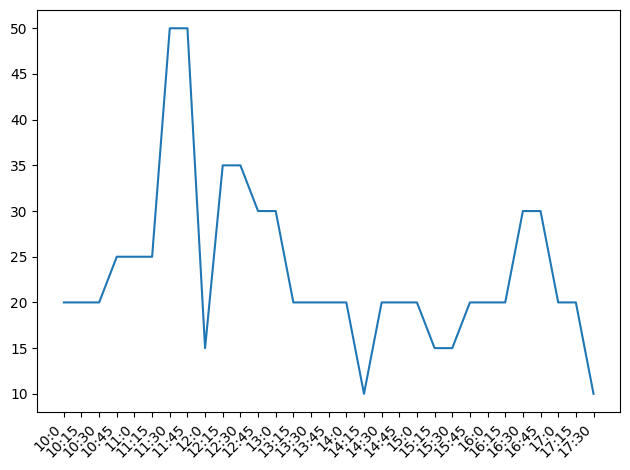

In [27]:
df_wainting_time_example = df_waiting_times[(df_waiting_times["WORK_DATE"]=="2018-01-01")&(df_waiting_times["ENTITY_DESCRIPTION_SHORT"]=="Roller Coaster")].sort_values("DEB_TIME")
df_wainting_time_example_open = df_wainting_time_example[df_wainting_time_example["OPEN_TIME"]>0]
x_labels = []
for i in range(len(df_wainting_time_example_open["DEB_TIME"])):
    label = str(pd.to_datetime(df_wainting_time_example_open["DEB_TIME"].iloc[i]).hour)
    label = label + ":" + str(pd.to_datetime(df_wainting_time_example_open["DEB_TIME"].iloc[i]).minute)
    x_labels.append(label)

plt.plot(x_labels,df_wainting_time_example_open["WAIT_TIME_MAX"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

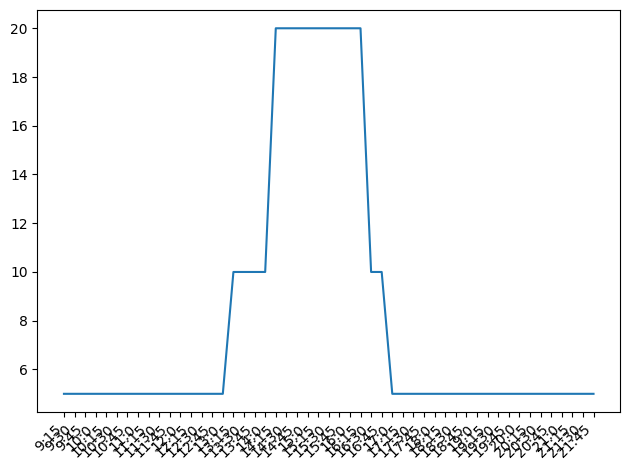

In [28]:
df_wainting_time_example = df_waiting_times[(df_waiting_times["WORK_DATE"]=="2018-01-01")&(df_waiting_times["ENTITY_DESCRIPTION_SHORT"]=="Merry Go Round")].sort_values("DEB_TIME")
df_wainting_time_example_open = df_wainting_time_example[df_wainting_time_example["OPEN_TIME"]>0]
x_labels = []
for i in range(len(df_wainting_time_example_open["DEB_TIME"])):
    label = str(pd.to_datetime(df_wainting_time_example_open["DEB_TIME"].iloc[i]).hour)
    label = label + ":" + str(pd.to_datetime(df_wainting_time_example_open["DEB_TIME"].iloc[i]).minute)
    x_labels.append(label)

plt.plot(x_labels,df_wainting_time_example_open["WAIT_TIME_MAX"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

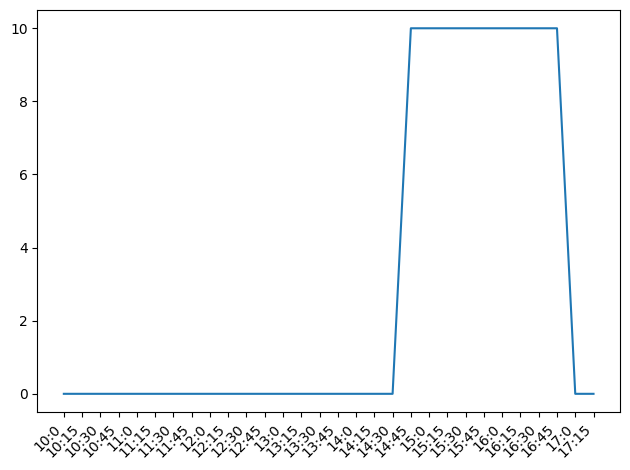

In [29]:
df_wainting_time_example = df_waiting_times[(df_waiting_times["WORK_DATE"]=="2018-01-03")&(df_waiting_times["ENTITY_DESCRIPTION_SHORT"]=="Superman Ride")].sort_values("DEB_TIME")
df_wainting_time_example_open = df_wainting_time_example[df_wainting_time_example["OPEN_TIME"]>0]
x_labels = []
for i in range(len(df_wainting_time_example_open["DEB_TIME"])):
    label = str(pd.to_datetime(df_wainting_time_example_open["DEB_TIME"].iloc[i]).hour)
    label = label + ":" + str(pd.to_datetime(df_wainting_time_example_open["DEB_TIME"].iloc[i]).minute)
    x_labels.append(label)

plt.plot(x_labels,df_wainting_time_example_open["WAIT_TIME_MAX"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

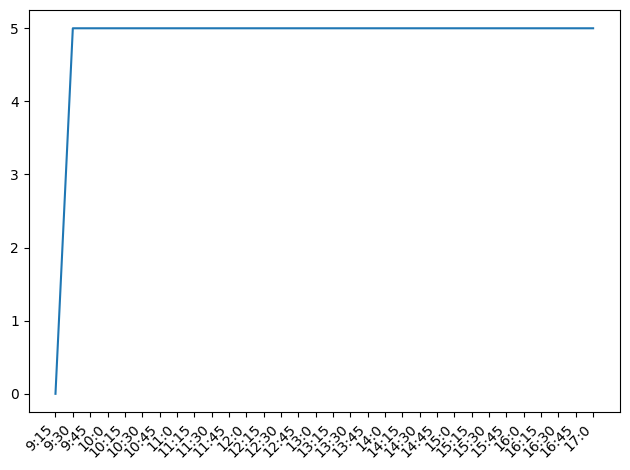

In [30]:
df_wainting_time_example = df_waiting_times[(df_waiting_times["WORK_DATE"]=="2018-01-01")&(df_waiting_times["ENTITY_DESCRIPTION_SHORT"]=="Rapids Ride")].sort_values("DEB_TIME")
df_wainting_time_example_open = df_wainting_time_example[df_wainting_time_example["OPEN_TIME"]>0]
x_labels = []
for i in range(len(df_wainting_time_example_open["DEB_TIME"])):
    label = str(pd.to_datetime(df_wainting_time_example_open["DEB_TIME"].iloc[i]).hour)
    label = label + ":" + str(pd.to_datetime(df_wainting_time_example_open["DEB_TIME"].iloc[i]).minute)
    x_labels.append(label)

plt.plot(x_labels,df_wainting_time_example_open["WAIT_TIME_MAX"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Information about the colulmn names:
- **ENTITY_DESCRIPTION_SHORT**: Name of the entity (park, attraction)  
- **WAIT_TIME_MAX**: Max waiting time during the considered period (in minutes)  
- **NB_UNITS**: Number of units in the attraction  
- **GUEST_CARRIED**: Number of guests carried during the period  
- **CAPACITY**: Capacity of the attraction  
- **ADJUST_CAPACITY**: Adjusted capacity of the attraction to the time slot considered  
- **OPEN_TIME**: Open time of the attraction (in minutes)  
- **UP_TIME**: Up time of the attraction (in minutes)  
- **DOWNTIME**: Down time of the attraction (in minutes)  
- **NB_MAX_UNIT**: Maximum number of units the attraction can take  

In [32]:
# Looking for the longest waiting lines
df_waiting_times.groupby("ENTITY_DESCRIPTION_SHORT").agg({"WAIT_TIME_MAX":"mean"}).sort_values("WAIT_TIME_MAX",ascending=False).reset_index()

ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX
0                  Monorail      35.387042
1              Spiral Slide      32.245107
2               Giant Wheel      31.422579
3                Swing Ride      29.313063
4              Tilt-A-Whirl      27.993695
5                 Free Fall      24.277858
6                Scooby Doo      24.275360
7            Aeroplane Ride      22.556130
8                 Log Flume      22.349700
9                  Go-Karts      21.792256
10           Reverse Bungee      20.885544
11                Crazy Bus      18.882720
12         Spinning Coaster      18.590211
13                  Zipline      16.486129
14               Drop Tower      15.063442
15               Water Ride      13.630696
16              Pirate Ship      13.383448
17           Flying Coaster      12.480666
18              Bungee Jump      12.388916
19           Roller Coaster      10.881731
20            Haunted House       9.997042
21            Vertical Drop       9.968434
22         Inverted Coaster       8.926047
23            Superman Ride       8.904974
24              Rapids Ride       8.537914
25                   Skyway       7.521869
26           Merry Go Round       7.436159
27            Dizzy Dropper       7.167464
28              Power Tower       6.427024
29              Bumper Cars       6.218891
30             Giga Coaster       6.212936
31                  Gondola       6.181753
32               Sling Shot       5.990534
33           Kiddie Coaster       3.738200
34             Circus Train       3.010428
35              Crazy Dance       2.992086
36               Oz Theatre       2.763109
37            Himalaya Ride       1.925312
38                 Top Spin       1.056471

In [33]:
# Checking for missing data
df_waiting_times.groupby("ENTITY_DESCRIPTION_SHORT").agg(num_of_data_points=("WORK_DATE","count")).reset_index().sort_values("num_of_data_points",ascending=False)

ENTITY_DESCRIPTION_SHORT  num_of_data_points
12                 Go-Karts               94660
6             Dizzy Dropper               94659
2               Bungee Jump               94658
30         Spinning Coaster               94656
28                   Skyway               94656
13                  Gondola               94656
16         Inverted Coaster               94655
7                Drop Tower               94654
33               Swing Ride               94652
8            Flying Coaster               94652
3              Circus Train               94651
29               Sling Shot               94651
24              Rapids Ride               94649
26           Roller Coaster               94649
19           Merry Go Round               94649
9                 Free Fall               94649
22              Pirate Ship               94649
25           Reverse Bungee               94648
5               Crazy Dance               94648
27               Scooby Doo               94647
21               Oz Theatre               94647
0            Aeroplane Ride               94647
15            Himalaya Ride               94647
4                 Crazy Bus               94645
14            Haunted House               94645
20                 Monorail               94641
23              Power Tower               94641
10              Giant Wheel               94638
32            Superman Ride               94637
11             Giga Coaster               94634
31             Spiral Slide               94628
17           Kiddie Coaster               94595
38                  Zipline               94588
1               Bumper Cars               94586
35                 Top Spin               94579
18                Log Flume               94478
37               Water Ride               94475
34             Tilt-A-Whirl                3965
36            Vertical Drop                3960

In [34]:
# Analyzing capacity usage for each attraction
df_waiting_times["USED_CAPACITY"] = np.where(df_waiting_times["ADJUST_CAPACITY"]!=0,df_waiting_times["GUEST_CARRIED"]/df_waiting_times["ADJUST_CAPACITY"], 0)
df_waiting_times.groupby("ENTITY_DESCRIPTION_SHORT").agg({"USED_CAPACITY":"mean"}).sort_values("USED_CAPACITY",ascending=False).reset_index()

ENTITY_DESCRIPTION_SHORT  USED_CAPACITY
0               Bungee Jump       0.419864
1                   Zipline       0.383065
2                  Go-Karts       0.380826
3                Drop Tower       0.377494
4             Haunted House       0.362430
5                 Crazy Bus       0.355861
6               Bumper Cars       0.353717
7          Spinning Coaster       0.348779
8                    Skyway       0.343767
9               Giant Wheel       0.332135
10               Water Ride       0.329472
11           Aeroplane Ride       0.329146
12           Flying Coaster       0.324293
13              Power Tower       0.318254
14                Log Flume       0.314784
15             Circus Train       0.313053
16                 Monorail       0.309834
17           Reverse Bungee       0.305822
18            Dizzy Dropper       0.297176
19              Pirate Ship       0.288631
20                  Gondola       0.279594
21               Swing Ride       0.277771
22              Rapids Ride       0.274180
23               Sling Shot       0.266662
24             Spiral Slide       0.251742
25             Giga Coaster       0.248712
26                Free Fall       0.244435
27              Crazy Dance       0.239274
28            Vertical Drop       0.221761
29           Merry Go Round       0.217841
30           Roller Coaster       0.206516
31            Superman Ride       0.197369
32             Tilt-A-Whirl       0.196948
33               Scooby Doo       0.179691
34           Kiddie Coaster       0.175204
35         Inverted Coaster       0.123872
36            Himalaya Ride       0.118723
37               Oz Theatre       0.077747
38                 Top Spin       0.060076

For some attractions, used_capacity > 1 so it makes no sense: take it into account when merging data.

## Weather

In [35]:
df_weather = pd.read_csv(data_path + 'weather_data.csv')
df_weather.head()

dt                         dt_iso  timezone        city_name  \
0  915148800  1999-01-01 00:00:00 +0000 UTC      3600  Custom location   
1  915152400  1999-01-01 01:00:00 +0000 UTC      3600  Custom location   
2  915156000  1999-01-01 02:00:00 +0000 UTC      3600  Custom location   
3  915159600  1999-01-01 03:00:00 +0000 UTC      3600  Custom location   
4  915163200  1999-01-01 04:00:00 +0000 UTC      3600  Custom location   

         lat       lon  temp  visibility  dew_point  feels_like  ...  \
0  48.873492  2.295104  8.33         NaN       3.39        5.28  ...   
1  48.873492  2.295104  8.08         NaN       3.54        5.18  ...   
2  48.873492  2.295104  8.08         NaN       4.11        5.38  ...   
3  48.873492  2.295104  7.31         NaN       3.73        4.42  ...   
4  48.873492  2.295104  6.91         NaN       3.53        4.00  ...   

   wind_gust  rain_1h  rain_3h  snow_1h  snow_3h  clouds_all  weather_id  \
0        NaN      NaN      NaN      NaN      NaN           8         800   
1        NaN      NaN      NaN      NaN      NaN           6         800   
2        NaN      NaN      NaN      NaN      NaN          14         801   
3        NaN      NaN      NaN      NaN      NaN          39         802   
4        NaN      NaN      NaN      NaN      NaN          52         803   

   weather_main  weather_description  weather_icon  
0         Clear         sky is clear           01n  
1         Clear         sky is clear           01n  
2        Clouds           few clouds           02n  
3        Clouds     scattered clouds           03n  
4        Clouds        broken clouds           04n  

[5 rows x 28 columns]

## Parade night shows

Please save *parade_night_show.xslx* as a CSV in the data folder

In [ ]:
df_parade_shows = pd.read_csv(data_path + "parade_night_show.csv")
df_parade_shows = df_parade_shows.drop(columns=["Unnamed: 0"])
df_parade_shows["WORK_DATE"] = pd.to_datetime(df_parade_shows["WORK_DATE"],format="%m/%d/%y")
df_parade_shows.head()

WORK_DATE NIGHT_SHOW  PARADE_1  PARADE_2
0 2018-10-01   20:00:00  17:30:00  12:10:00
1 2018-10-02   20:00:00  17:30:00  12:10:00
2 2018-10-03   20:00:00  17:30:00  12:10:00
3 2018-10-04   20:00:00  17:30:00  12:10:00
4 2018-10-05   20:00:00  17:30:00  12:10:00

After having downloaded the files and stored them in the data folder, run ``python3 scripts/extract_and_merge_park_data.py`` in your terminal to generate the portaventura_world_data.csv file.

# **Deeper analysis**

## Seasonality analysis

### Attendance

#### Weekly cyclicity

In [36]:
df_attendance = pd.read_csv(data_path + "attendance.csv")
df_attendance = df_attendance[["USAGE_DATE", "attendance"]][(df_attendance["FACILITY_NAME"] == "PortAventura World")]
df_attendance["day_of_week"] = pd.to_datetime(df_attendance["USAGE_DATE"]).dt.dayofweek
df_attendance.head()

USAGE_DATE  attendance  day_of_week
0  2018-06-01       46804            4
2  2018-06-02       57940            5
4  2018-06-03       44365            6
6  2018-06-04       37617            0
8  2018-06-05       32438            1

In [37]:
# Drop negative attendance values
print(f"Before dropping negative attendance values, there are {df_attendance.shape[0]} rows")
df_attendance.drop(df_attendance[df_attendance["attendance"] < 0].index, inplace=True)
print(f"After negative attendance values, there are {df_attendance.shape[0]} rows")

Before dropping negative attendance values, there are 1182 rows
After negative attendance values, there are 1145 rows


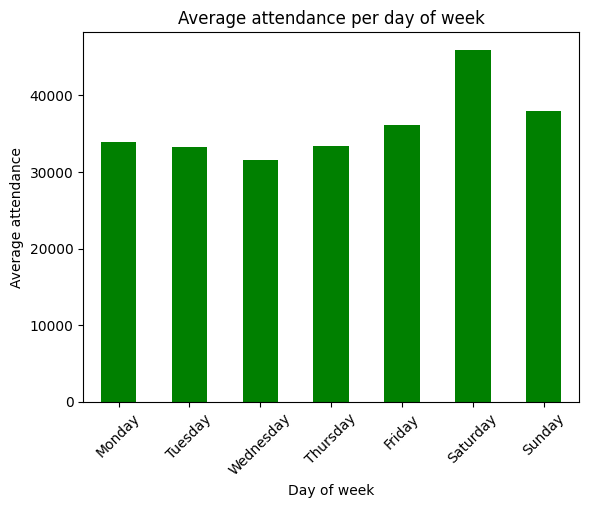

In [38]:
# Group by day of week to then plot the average attendance per day of week
df_attendance.groupby("day_of_week")["attendance"].mean().plot(kind="bar", color="green")
plt.title("Average attendance per day of week")
plt.ylabel("Average attendance")
plt.xlabel("Day of week")
plt.xticks(ticks=np.arange(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=45)
plt.show()

#### Yearly cyclicity

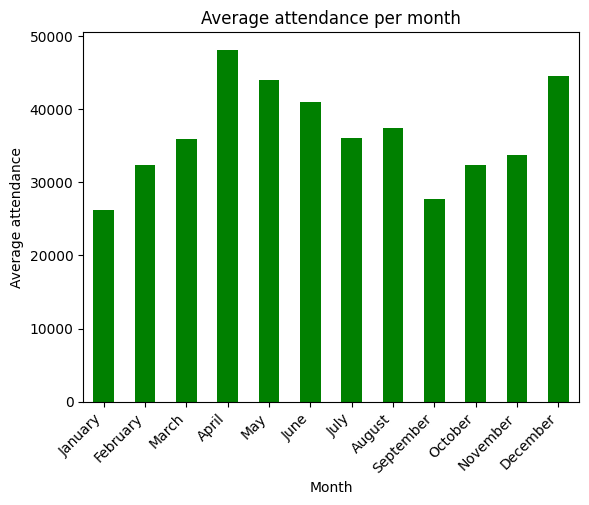

In [39]:
# Let's create a month column and plot the average attendance per month
df_attendance["month"] = pd.to_datetime(df_attendance["USAGE_DATE"]).dt.month
df_attendance.groupby("month")["attendance"].mean().plot(kind="bar", color="green")
plt.title("Average attendance per month")
plt.ylabel("Average attendance")
plt.xlabel("Month")
plt.xticks(ticks=np.arange(12), labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45, ha="right")
plt.show()

### Waiting times

#### Weekly cyclicity

In [40]:
df = pd.read_csv(data_path + "portaventura_world_data.csv")

/var/folders/k7/yjlj1gk15bj1gjrxppqlsy9r0000gn/T/ipykernel_6001/4181415843.py:1: DtypeWarning: Columns (14,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path + "portaventura_world_data.csv")


In [41]:
df.head()

DATE             DEB_TIME  DEB_TIME_HOUR                 FIN_TIME  \
0  2018-01-01  2018-01-01 09:00:00              9  2018-01-01 09:15:00.000   
1  2018-01-01  2018-01-01 09:15:00              9  2018-01-01 09:30:00.000   
2  2018-01-01  2018-01-01 09:30:00              9  2018-01-01 09:45:00.000   
3  2018-01-01  2018-01-01 09:45:00              9  2018-01-01 10:00:00.000   
4  2018-01-01  2018-01-01 10:00:00             10  2018-01-01 10:15:00.000   

  ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  NB_UNITS  GUEST_CARRIED  CAPACITY  \
0              Bumper Cars              5      18.0       108.0000   254.749   
1              Bumper Cars              5      18.0        88.9999   254.749   
2              Bumper Cars              5      18.0        93.0001   254.749   
3              Bumper Cars              5      18.0        55.0000   254.749   
4              Bumper Cars              5      18.0        98.0001   254.749   

   ADJUST_CAPACITY  ...  NB_MAX_UNIT  REF_CLOSING_DESCRIPTION  \
0           254.75  ...         18.0                      NaN   
1           254.75  ...         18.0                      NaN   
2           254.75  ...         18.0                      NaN   
3           254.75  ...         18.0                      NaN   
4           254.75  ...         18.0                      NaN   

   PARK_ATTENDANCE  NIGHT_SHOW PARADE_1  PARADE_2  temp humidity wind_speed  \
0              NaN         NaN      NaN       NaN  6.76     83.0       7.48   
1              NaN         NaN      NaN       NaN   NaN      NaN        NaN   
2              NaN         NaN      NaN       NaN   NaN      NaN        NaN   
3              NaN         NaN      NaN       NaN   NaN      NaN        NaN   
4              NaN         NaN      NaN       NaN  6.77     87.0       7.33   

   is_holiday  
0        True  
1        True  
2        True  
3        True  
4        True  

[5 rows x 23 columns]

In [42]:
# Drop rows with a closed attraction
print(f"Before dropping closed attractions, there are {df.shape[0]} rows")
df.drop(df[~df["REF_CLOSING_DESCRIPTION"].isna()].index, inplace=True)
print(f"After dropping closed attractions, there are {df.shape[0]} rows")

Before dropping closed attractions, there are 2369821 rows
After dropping closed attractions, there are 2215559 rows


In [43]:
# Let's only consider attractions when they are open
print(f"Before dropping attractions when they are closed, there are {df.shape[0]} rows")
df.drop(df[df["OPEN_TIME"] == 0].index, inplace=True)
print(f"After dropping attractions when they are closed, there are {df.shape[0]} rows")

Before dropping attractions when they are closed, there are 2215559 rows
After dropping attractions when they are closed, there are 1289212 rows


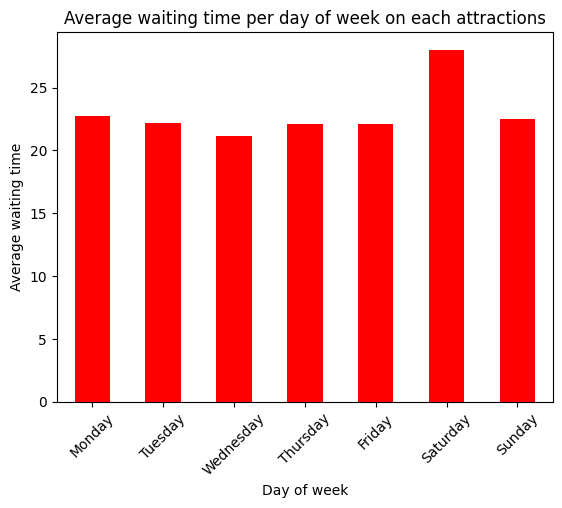

In [44]:
# Now let's group by day of week and plot the average wait time per day of week
df["day_of_week"] = pd.to_datetime(df["DATE"]).dt.dayofweek
df.groupby("day_of_week")["WAIT_TIME_MAX"].mean().plot(kind="bar", color="red")
plt.title("Average waiting time per day of week on each attractions")
plt.ylabel("Average waiting time")
plt.xlabel("Day of week")
plt.xticks(ticks=np.arange(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=45)
plt.show()

#### Yearly cyclicity

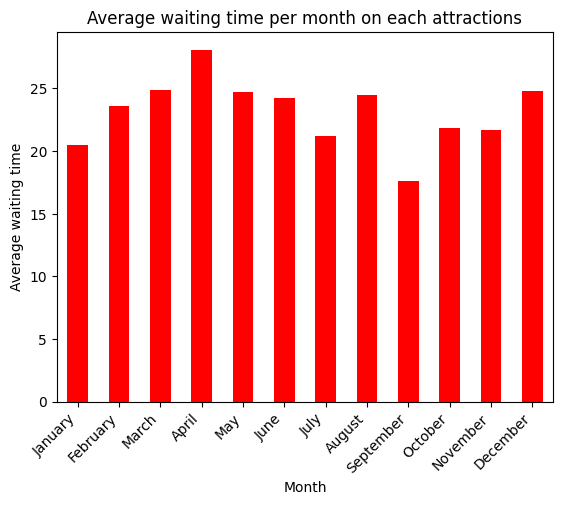

In [45]:
# Let us create a month column and plot the average waiting time per month
df["month"] = pd.to_datetime(df["DATE"]).dt.month
df.groupby("month")["WAIT_TIME_MAX"].mean().plot(kind="bar", color="red")
plt.title("Average waiting time per month on each attractions")
plt.ylabel("Average waiting time")
plt.xlabel("Month")
plt.xticks(ticks=np.arange(12), labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45, ha="right")
plt.show()

## Under-used attraction capacity

In [46]:
data = pd.read_csv(data_path + "portaventura_world_data.csv")

/var/folders/k7/yjlj1gk15bj1gjrxppqlsy9r0000gn/T/ipykernel_6001/3706484138.py:1: DtypeWarning: Columns (14,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path + "portaventura_world_data.csv")


In [48]:
# We analyze attractions when they are open
filtered_data = data[data['OPEN_TIME'] > 0]
filtered_data.head()

DATE             DEB_TIME  DEB_TIME_HOUR                 FIN_TIME  \
0  2018-01-01  2018-01-01 09:00:00              9  2018-01-01 09:15:00.000   
1  2018-01-01  2018-01-01 09:15:00              9  2018-01-01 09:30:00.000   
2  2018-01-01  2018-01-01 09:30:00              9  2018-01-01 09:45:00.000   
3  2018-01-01  2018-01-01 09:45:00              9  2018-01-01 10:00:00.000   
4  2018-01-01  2018-01-01 10:00:00             10  2018-01-01 10:15:00.000   

  ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  NB_UNITS  GUEST_CARRIED  CAPACITY  \
0              Bumper Cars              5      18.0       108.0000   254.749   
1              Bumper Cars              5      18.0        88.9999   254.749   
2              Bumper Cars              5      18.0        93.0001   254.749   
3              Bumper Cars              5      18.0        55.0000   254.749   
4              Bumper Cars              5      18.0        98.0001   254.749   

   ADJUST_CAPACITY  ...  NB_MAX_UNIT  REF_CLOSING_DESCRIPTION  \
0           254.75  ...         18.0                      NaN   
1           254.75  ...         18.0                      NaN   
2           254.75  ...         18.0                      NaN   
3           254.75  ...         18.0                      NaN   
4           254.75  ...         18.0                      NaN   

   PARK_ATTENDANCE  NIGHT_SHOW PARADE_1  PARADE_2  temp humidity wind_speed  \
0              NaN         NaN      NaN       NaN  6.76     83.0       7.48   
1              NaN         NaN      NaN       NaN   NaN      NaN        NaN   
2              NaN         NaN      NaN       NaN   NaN      NaN        NaN   
3              NaN         NaN      NaN       NaN   NaN      NaN        NaN   
4              NaN         NaN      NaN       NaN  6.77     87.0       7.33   

   is_holiday  
0        True  
1        True  
2        True  
3        True  
4        True  

[5 rows x 23 columns]

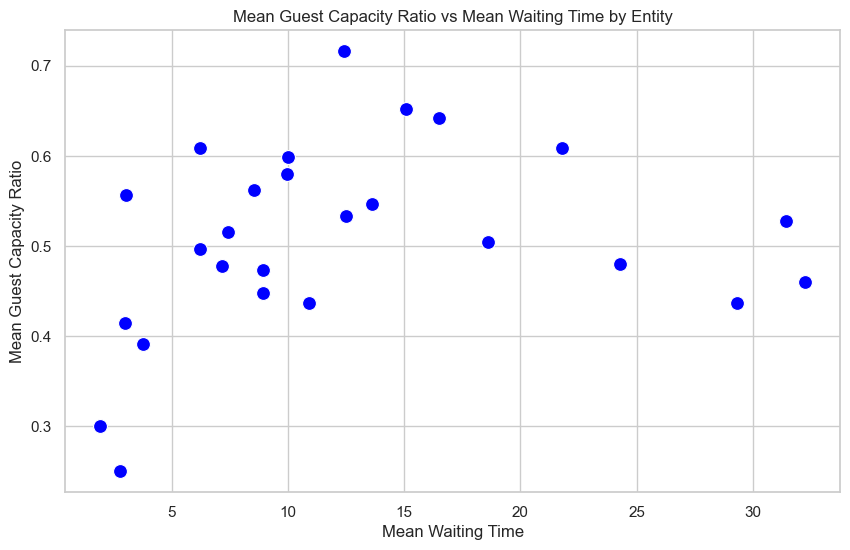

In [49]:
# Calculate the used capacity ratio
data['GUEST_CAPACITY_RATIO'] = data['GUEST_CARRIED'] / data['ADJUST_CAPACITY']

# Group by ENTITY_DESCRIPTION_SHORT and calculate the mean of the ratio and waiting time
mean_values = data.groupby('ENTITY_DESCRIPTION_SHORT').agg(
    mean_ratio=('GUEST_CAPACITY_RATIO', 'mean'),
    mean_waiting_time=('WAIT_TIME_MAX', 'mean')
).reset_index()

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_waiting_time', y='mean_ratio', data=mean_values, s=100, color='blue')

# Set labels and title
plt.xlabel('Mean Waiting Time')
plt.ylabel('Mean Guest Capacity Ratio')
plt.title('Mean Guest Capacity Ratio vs Mean Waiting Time by Entity')

# Show the plot
plt.show()


- low guest capacity + low waiting time : unattended attractions
- high guest capacity + low waiting time : ideal scenario
- low guest capacity + high waiting time : worst case scenario
- high guest capacity + high waiting time : popular attraction

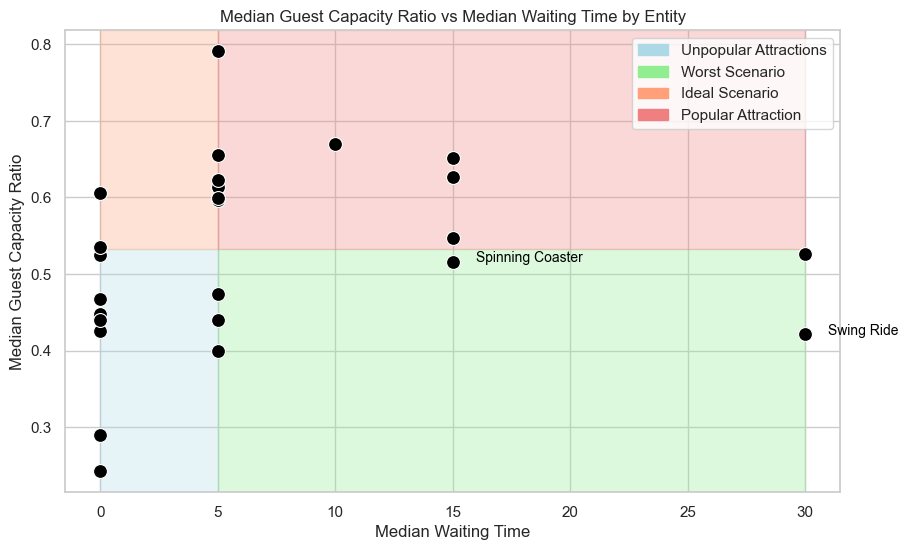

In [52]:
data['GUEST_CAPACITY_RATIO'] = data['GUEST_CARRIED'] / data['ADJUST_CAPACITY']

# Group by ENTITY_DESCRIPTION_SHORT and calculate the median values
mean_values = data.groupby('ENTITY_DESCRIPTION_SHORT').agg(
    mean_ratio=('GUEST_CAPACITY_RATIO', 'median'),
    mean_waiting_time=('WAIT_TIME_MAX', 'median')
).reset_index()

# Find the median values for the split
x_median = mean_values['mean_waiting_time'].median()
y_median = mean_values['mean_ratio'].median()

# Identify bottom-right quadrant (high wait & low ratio)
bottom_right = mean_values[(mean_values['mean_waiting_time'] > x_median) & 
                           (mean_values['mean_ratio'] < y_median)]

# Select the three farthest points (highest waiting time) in the bottom-right quadrant
farthest_points = bottom_right.nlargest(3, 'mean_waiting_time')

# Set up plot
plt.figure(figsize=(10, 6))

# Define colors for the quadrants
colors = {
    "Low Wait & Low Ratio": "lightblue",
    "High Wait & Low Ratio": "lightgreen",
    "Low Wait & High Ratio": "lightsalmon",
    "High Wait & High Ratio": "lightcoral"
}

# Add colored background rectangles
plt.axvspan(0, x_median, ymin=0, ymax=y_median, color=colors["Low Wait & Low Ratio"], alpha=0.3)
plt.axvspan(x_median, max(mean_values['mean_waiting_time']), ymin=0, ymax=y_median, color=colors["High Wait & Low Ratio"], alpha=0.3)
plt.axvspan(0, x_median, ymin=y_median, ymax=1, color=colors["Low Wait & High Ratio"], alpha=0.3)
plt.axvspan(x_median, max(mean_values['mean_waiting_time']), ymin=y_median, ymax=1, color=colors["High Wait & High Ratio"], alpha=0.3)

# Plot scatter points
sns.scatterplot(
    x='mean_waiting_time', 
    y='mean_ratio', 
    data=mean_values, 
    color='black', 
    s=100
)

# Annotate the 3 farthest entities in the bottom-right quadrant
for _, row in farthest_points.iterrows():
    plt.text(row['mean_waiting_time']+1, row['mean_ratio'], row['ENTITY_DESCRIPTION_SHORT'], 
             fontsize=10, ha='left', color='black')

# Create legend handles
legend_patches = [
    mpatches.Patch(color=colors["Low Wait & Low Ratio"], label="Unpopular Attractions"),
    mpatches.Patch(color=colors["High Wait & Low Ratio"], label="Worst Scenario"),
    mpatches.Patch(color=colors["Low Wait & High Ratio"], label="Ideal Scenario"),
    mpatches.Patch(color=colors["High Wait & High Ratio"], label="Popular Attraction"),
]

# Add the legend
plt.legend(handles=legend_patches, loc="upper right")

# Labels and title
plt.xlabel('Median Waiting Time')
plt.ylabel('Median Guest Capacity Ratio')
plt.title('Median Guest Capacity Ratio vs Median Waiting Time by Entity')

# Show plot
plt.show()


### Plot by season

/var/folders/k7/yjlj1gk15bj1gjrxppqlsy9r0000gn/T/ipykernel_6001/4033877693.py:1: DtypeWarning: Columns (14,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path + "portaventura_world_data.csv")


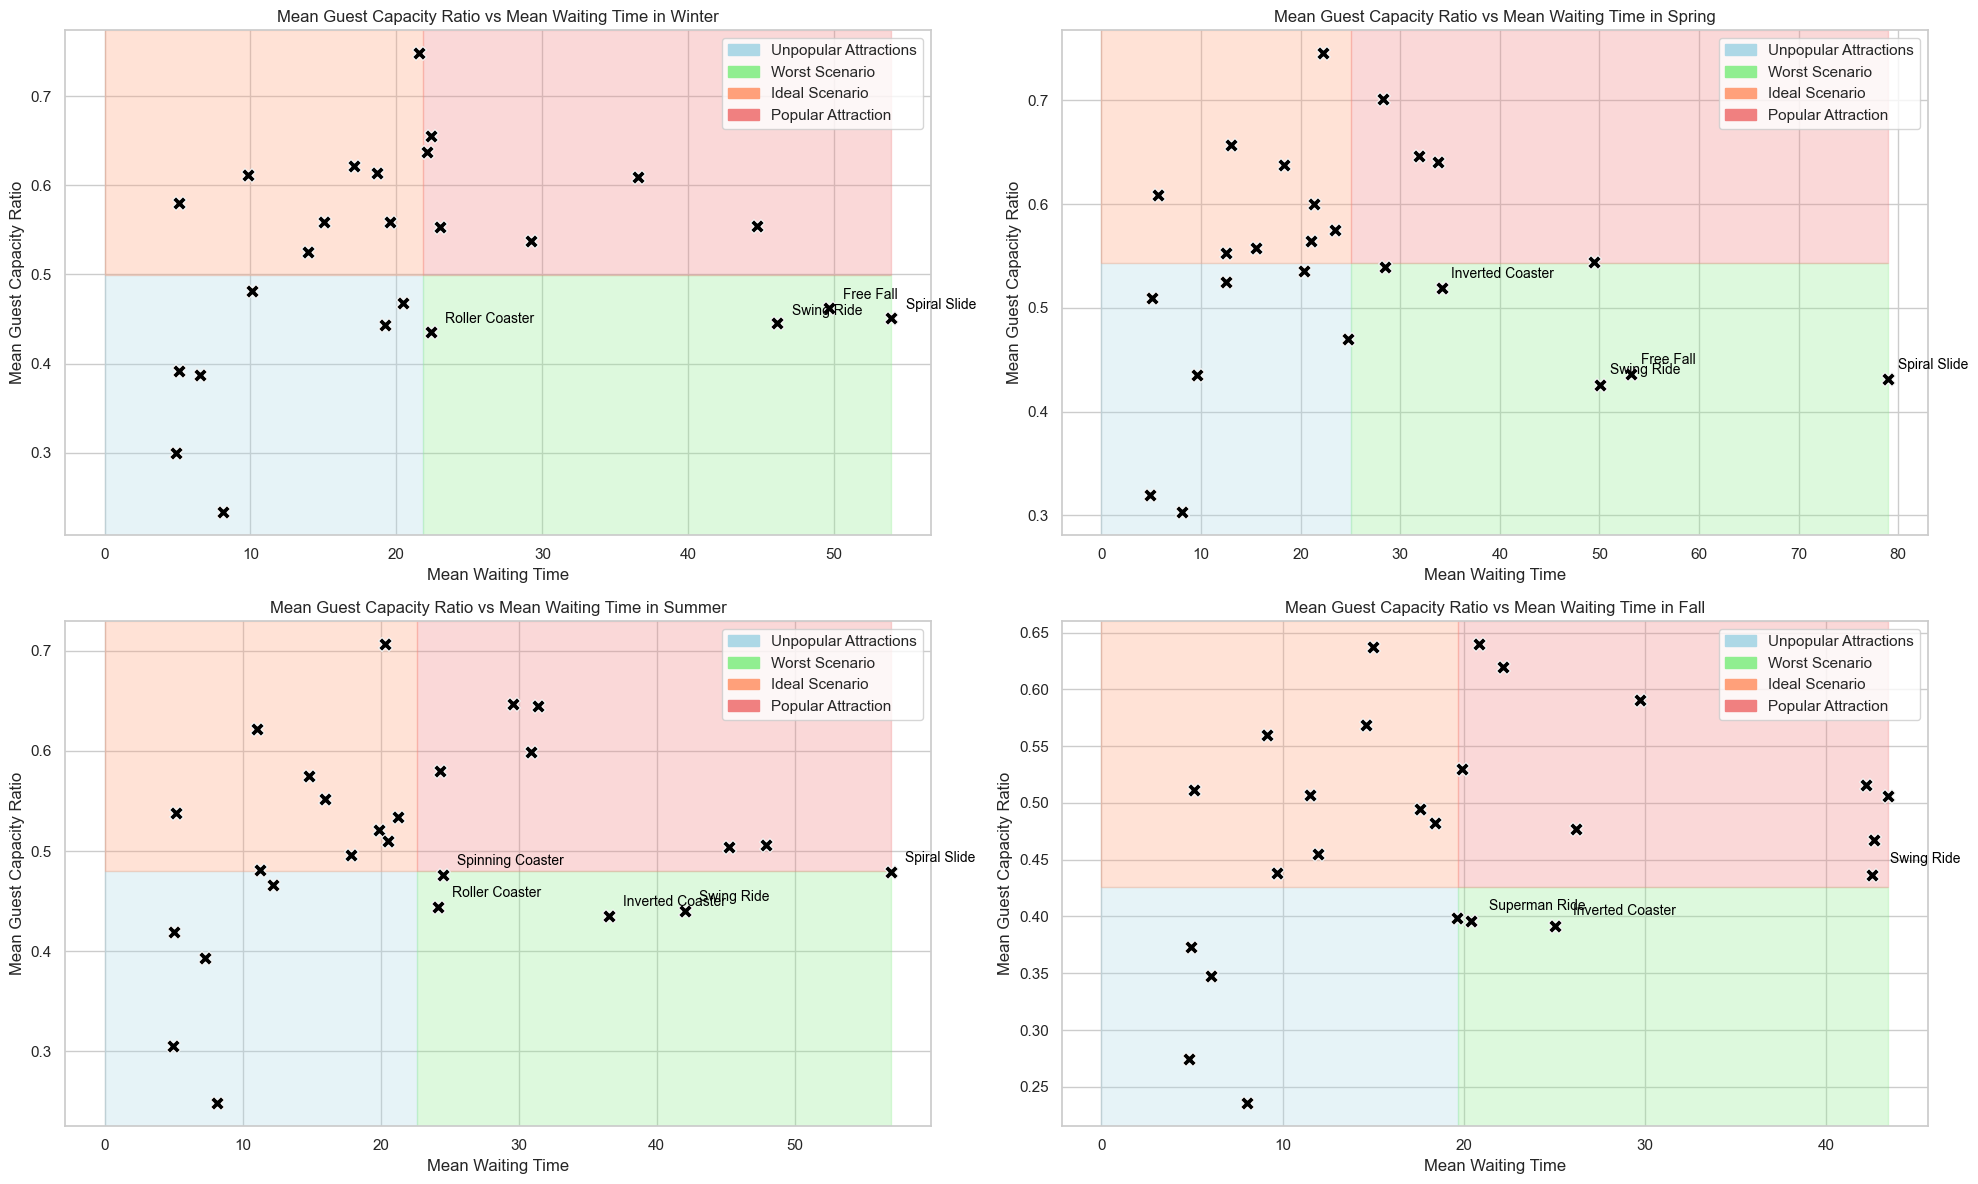

In [56]:
data = pd.read_csv(data_path + "portaventura_world_data.csv")

# Convert 'DATE' column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Define seasons
conditions = [
    data['DATE'].dt.month.isin([12, 1, 2]),
    data['DATE'].dt.month.isin([3, 4, 5]),
    data['DATE'].dt.month.isin([6, 7, 8]),
    data['DATE'].dt.month.isin([9, 10, 11])
]
seasons = ['Winter', 'Spring', 'Summer', 'Fall']

# Assign seasons
data['season'] = np.select(conditions, seasons, default='Unknown')

# Compute Guest Capacity Ratio
data['GUEST_CAPACITY_RATIO'] = data['GUEST_CARRIED'] / data['ADJUST_CAPACITY']

# Define colors for the quadrants
colors = {
    "Low Wait & Low Ratio": "lightblue",
    "High Wait & Low Ratio": "lightgreen",
    "Low Wait & High Ratio": "lightsalmon",
    "High Wait & High Ratio": "lightcoral"
}

# Set up a 2x2 grid for the subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Flatten the 2x2 grid of axes to make it easier to loop through
axs = axs.flatten()

# Function to check if the text overlaps
def get_offset(existing_coords, x, y, offset=0.15):
    """
    Returns an adjusted (x, y) coordinate if there is overlap with existing coordinates.
    The function tries to find an empty spot around the given coordinate.
    """
    for ex, ey in existing_coords:
        if abs(ex - x) < offset and abs(ey - y) < offset:
            # Adjust position by offset
            x += offset
            y += offset
            return get_offset(existing_coords, x, y, offset)
    return x, y

# Loop through each season and plot the data in the respective subplot
for i, season in enumerate(['Winter', 'Spring', 'Summer', 'Fall']):
    # Filter the data by season and OPEN_TIME > 0
    season_data = data[(data['season'] == season) & (data['OPEN_TIME'] > 0)]

    # Group by ENTITY_DESCRIPTION_SHORT and calculate the median values
    mean_values = season_data.groupby('ENTITY_DESCRIPTION_SHORT').agg(
        mean_ratio=('GUEST_CAPACITY_RATIO', 'mean'),
        mean_waiting_time=('WAIT_TIME_MAX', 'mean')
    ).reset_index()

    # Find the median values for the split
    x_median = mean_values['mean_waiting_time'].mean()
    y_median = mean_values['mean_ratio'].mean()

    # Identify bottom-right quadrant (high wait & low ratio)
    bottom_right = mean_values[(mean_values['mean_waiting_time'] > x_median) & 
                               (mean_values['mean_ratio'] < y_median)]

    # Add colored background rectangles
    axs[i].axvspan(0, x_median, ymin=0, ymax=y_median, color=colors["Low Wait & Low Ratio"], alpha=0.3)
    axs[i].axvspan(x_median, max(mean_values['mean_waiting_time']), ymin=0, ymax=y_median, color=colors["High Wait & Low Ratio"], alpha=0.3)
    axs[i].axvspan(0, x_median, ymin=y_median, ymax=1, color=colors["Low Wait & High Ratio"], alpha=0.3)
    axs[i].axvspan(x_median, max(mean_values['mean_waiting_time']), ymin=y_median, ymax=1, color=colors["High Wait & High Ratio"], alpha=0.3)

    # Plot scatter points
    sns.scatterplot(
        x='mean_waiting_time', 
        y='mean_ratio', 
        data=mean_values, 
        color='black', 
        s=100,
        marker="X",
        ax=axs[i]  # Plot in the specific subplot
    )

    # Filter entities in the "High Wait & Low Ratio" quadrant (green rectangle)
    green_rectangle = mean_values[(mean_values['mean_waiting_time'] > x_median) & 
                                  (mean_values['mean_ratio'] < y_median-0.01)]

    # Store already plotted annotation coordinates
    existing_coords = []

    # Annotate only the entity names that fall within the green rectangle
    for _, row in green_rectangle.iterrows():
        # Get adjusted position to avoid overlap
        x_pos = row['mean_waiting_time'] + 1
        y_pos = row['mean_ratio'] + 0.01

        adjusted_x, adjusted_y = get_offset(existing_coords, x_pos, y_pos)

        axs[i].text(adjusted_x, adjusted_y, row['ENTITY_DESCRIPTION_SHORT'], fontsize=10, ha='left', color='black')
        existing_coords.append((adjusted_x, adjusted_y))

    # Create legend handles
    legend_patches = [
        mpatches.Patch(color=colors["Low Wait & Low Ratio"], label="Unpopular Attractions"),
        mpatches.Patch(color=colors["High Wait & Low Ratio"], label="Worst Scenario"),
        mpatches.Patch(color=colors["Low Wait & High Ratio"], label="Ideal Scenario"),
        mpatches.Patch(color=colors["High Wait & High Ratio"], label="Popular Attraction"),
    ]

    # Add the legend
    axs[i].legend(handles=legend_patches, loc="upper right")

    # Labels and title
    axs[i].set_xlabel('Mean Waiting Time')
    axs[i].set_ylabel('Mean Guest Capacity Ratio')
    axs[i].set_title(f'Mean Guest Capacity Ratio vs Mean Waiting Time in {season}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


## Parade impact on waiting times

In [57]:
df = pd.read_csv(data_path + "portaventura_world_data.csv")
df.head()

/var/folders/k7/yjlj1gk15bj1gjrxppqlsy9r0000gn/T/ipykernel_6001/3603543841.py:1: DtypeWarning: Columns (14,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path + "portaventura_world_data.csv")


DATE             DEB_TIME  DEB_TIME_HOUR                 FIN_TIME  \
0  2018-01-01  2018-01-01 09:00:00              9  2018-01-01 09:15:00.000   
1  2018-01-01  2018-01-01 09:15:00              9  2018-01-01 09:30:00.000   
2  2018-01-01  2018-01-01 09:30:00              9  2018-01-01 09:45:00.000   
3  2018-01-01  2018-01-01 09:45:00              9  2018-01-01 10:00:00.000   
4  2018-01-01  2018-01-01 10:00:00             10  2018-01-01 10:15:00.000   

  ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  NB_UNITS  GUEST_CARRIED  CAPACITY  \
0              Bumper Cars              5      18.0       108.0000   254.749   
1              Bumper Cars              5      18.0        88.9999   254.749   
2              Bumper Cars              5      18.0        93.0001   254.749   
3              Bumper Cars              5      18.0        55.0000   254.749   
4              Bumper Cars              5      18.0        98.0001   254.749   

   ADJUST_CAPACITY  ...  NB_MAX_UNIT  REF_CLOSING_DESCRIPTION  \
0           254.75  ...         18.0                      NaN   
1           254.75  ...         18.0                      NaN   
2           254.75  ...         18.0                      NaN   
3           254.75  ...         18.0                      NaN   
4           254.75  ...         18.0                      NaN   

   PARK_ATTENDANCE  NIGHT_SHOW PARADE_1  PARADE_2  temp humidity wind_speed  \
0              NaN         NaN      NaN       NaN  6.76     83.0       7.48   
1              NaN         NaN      NaN       NaN   NaN      NaN        NaN   
2              NaN         NaN      NaN       NaN   NaN      NaN        NaN   
3              NaN         NaN      NaN       NaN   NaN      NaN        NaN   
4              NaN         NaN      NaN       NaN  6.77     87.0       7.33   

   is_holiday  
0        True  
1        True  
2        True  
3        True  
4        True  

[5 rows x 23 columns]

In [58]:
# Convertir les colonnes de temps en objets datetime
df['DEB_TIME'] = pd.to_datetime(df['DEB_TIME'], format='%Y-%m-%d %H:%M:%S')
df['PARADE_1'] = pd.to_datetime(df['PARADE_1'], format='%H:%M:%S')
df['PARADE_2'] = pd.to_datetime(df['PARADE_2'], format='%H:%M:%S')
df['NIGHT_SHOW'] = pd.to_datetime(df['NIGHT_SHOW'], format='%H:%M:%S')

def is_parade_in_progress(deb_time_hour, parade_time):
    if pd.isnull(parade_time):
        return False
    return deb_time_hour == parade_time.hour

# Ajouter des colonnes pour indiquer si une parade est en cours
df['PARADE_1_IN_PROGRESS'] = df.apply(lambda row: is_parade_in_progress(row['DEB_TIME_HOUR'], row['PARADE_1']), axis=1)
df['PARADE_2_IN_PROGRESS'] = df.apply(lambda row: is_parade_in_progress(row['DEB_TIME_HOUR'], row['PARADE_2']), axis=1)
df['NIGHT_SHOW_IN_PROGRESS'] = df.apply(lambda row: is_parade_in_progress(row['DEB_TIME_HOUR'], row['NIGHT_SHOW']), axis=1)

# Ajouter une colonne pour indiquer si une parade quelconque est en cours
df['ANY_PARADE_IN_PROGRESS'] = df['PARADE_1_IN_PROGRESS'] | df['PARADE_2_IN_PROGRESS'] | df['NIGHT_SHOW_IN_PROGRESS']

# Comparer les temps d'attente moyens pendant les créneaux horaires avec et sans parade
wait_time_with_parade = df[df['ANY_PARADE_IN_PROGRESS']]['WAIT_TIME_MAX'].mean()
wait_time_without_parade = df[~df['ANY_PARADE_IN_PROGRESS']]['WAIT_TIME_MAX'].mean()

print(f"Temps d'attente moyen avec parade en cours : {wait_time_with_parade}")
print(f"Temps d'attente moyen sans parade en cours : {wait_time_without_parade}")

Temps d'attente moyen avec parade en cours : 14.748943102043983
Temps d'attente moyen sans parade en cours : 12.531061097609628


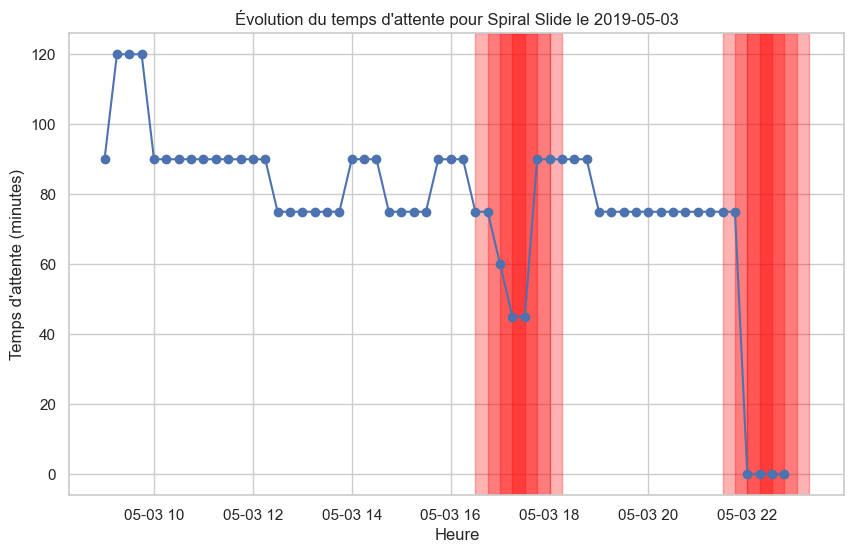

In [64]:
# Filtrer les données pour une journée où il y a des parades
parade_days = df[df['ANY_PARADE_IN_PROGRESS']]['DATE'].unique()
selected_day = random.choice(parade_days)
df_day = df[df['DATE'] == selected_day]

# Sélectionner une attraction au hasard
attractions = df_day['ENTITY_DESCRIPTION_SHORT'].unique()
selected_attraction = random.choice(attractions)
df_attraction = df_day[df_day['ENTITY_DESCRIPTION_SHORT'] == selected_attraction]

# Créer un graphique de l'évolution du temps d'attente sur la journée
plt.figure(figsize=(10, 6))
plt.plot(df_attraction['DEB_TIME'], df_attraction['WAIT_TIME_MAX'], marker='o', label='Temps d\'attente')

# Mettre en évidence les moments où la parade a lieu avec une plage de couleur
parade_times = df_attraction[df_attraction['ANY_PARADE_IN_PROGRESS']]['DEB_TIME']
for parade_time in parade_times:
    plt.axvspan(parade_time - timedelta(minutes=30), parade_time + timedelta(minutes=30), color='red', alpha=0.3, label='Parade')

plt.xlabel('Heure')
plt.ylabel('Temps d\'attente (minutes)')
plt.title(f'Évolution du temps d\'attente pour {selected_attraction} le {selected_day}')
plt.grid(True)
plt.show()

/var/folders/k7/yjlj1gk15bj1gjrxppqlsy9r0000gn/T/ipykernel_6001/3864298805.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_parade['DEB_TIME_HOUR'] = df_no_parade['DEB_TIME'].dt.hour
/var/folders/k7/yjlj1gk15bj1gjrxppqlsy9r0000gn/T/ipykernel_6001/3864298805.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_parade['DEB_TIME_HOUR'] = df_with_parade['DEB_TIME'].dt.hour


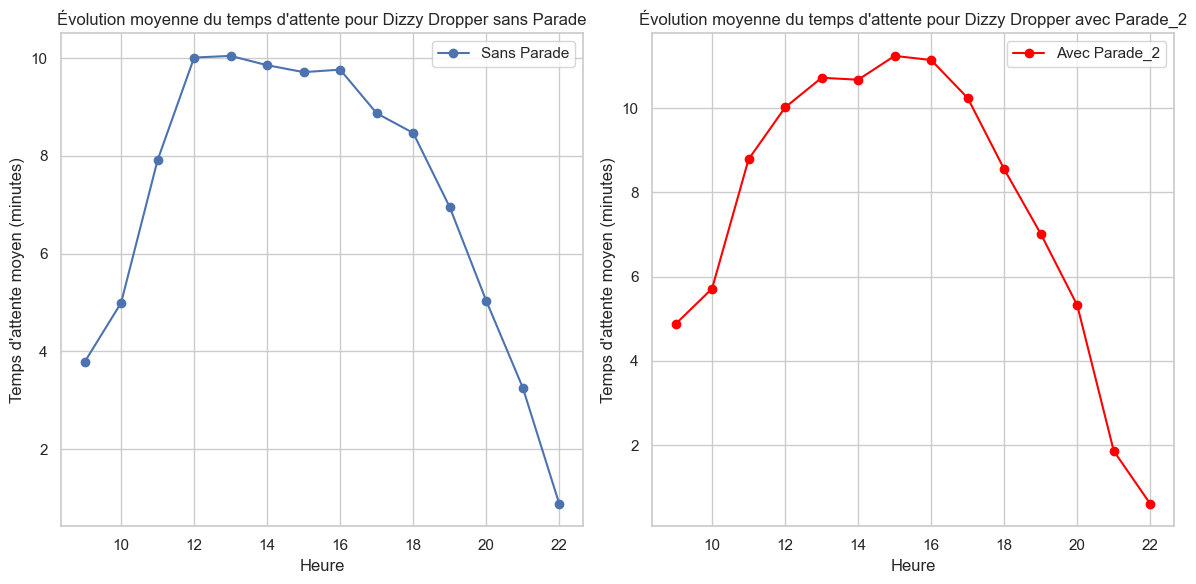

In [61]:
# Sélectionner une attraction au hasard
attractions = df['ENTITY_DESCRIPTION_SHORT'].unique()
selected_attraction = random.choice(attractions)
df_attraction = df[df['ENTITY_DESCRIPTION_SHORT'] == selected_attraction]

# Calculer l'évolution moyenne du temps d'attente sur une journée lorsqu'il n'y a pas de parade
df_no_parade = df_attraction[df_attraction['PARADE_2'].isnull()]
df_no_parade['DEB_TIME_HOUR'] = df_no_parade['DEB_TIME'].dt.hour
mean_wait_time_no_parade = df_no_parade.groupby('DEB_TIME_HOUR')['WAIT_TIME_MAX'].mean()

# Calculer l'évolution moyenne du temps d'attente sur une journée lorsqu'il y a une PARADE_2
df_with_parade = df_attraction[df_attraction['PARADE_2'].notnull()]
df_with_parade['DEB_TIME_HOUR'] = df_with_parade['DEB_TIME'].dt.hour
mean_wait_time_with_parade = df_with_parade.groupby('DEB_TIME_HOUR')['WAIT_TIME_MAX'].mean()

# Tracer les graphiques pour comparer les deux situations
plt.figure(figsize=(12, 6))

# Graphique pour l'évolution moyenne du temps d'attente sans parade
plt.subplot(1, 2, 1)
plt.plot(mean_wait_time_no_parade.index, mean_wait_time_no_parade.values, marker='o', label='Sans Parade')
plt.xlabel('Heure')
plt.ylabel('Temps d\'attente moyen (minutes)')
plt.title(f'Évolution moyenne du temps d\'attente pour {selected_attraction} sans Parade')
plt.legend()
plt.grid(True)

# Graphique pour l'évolution moyenne du temps d'attente avec PARADE_2
plt.subplot(1, 2, 2)
plt.plot(mean_wait_time_with_parade.index, mean_wait_time_with_parade.values, marker='o', label='Avec Parade_2', color='red')
plt.xlabel('Heure')
plt.ylabel('Temps d\'attente moyen (minutes)')
plt.title(f'Évolution moyenne du temps d\'attente pour {selected_attraction} avec Parade_2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **The model**

In [84]:
df = pd.read_csv(data_path + "portaventura_world_data.csv")
df.head()

/var/folders/k7/yjlj1gk15bj1gjrxppqlsy9r0000gn/T/ipykernel_6001/3603543841.py:1: DtypeWarning: Columns (14,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path + "portaventura_world_data.csv")


DATE             DEB_TIME  DEB_TIME_HOUR                 FIN_TIME  \
0  2018-01-01  2018-01-01 09:00:00              9  2018-01-01 09:15:00.000   
1  2018-01-01  2018-01-01 09:15:00              9  2018-01-01 09:30:00.000   
2  2018-01-01  2018-01-01 09:30:00              9  2018-01-01 09:45:00.000   
3  2018-01-01  2018-01-01 09:45:00              9  2018-01-01 10:00:00.000   
4  2018-01-01  2018-01-01 10:00:00             10  2018-01-01 10:15:00.000   

  ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  NB_UNITS  GUEST_CARRIED  CAPACITY  \
0              Bumper Cars              5      18.0       108.0000   254.749   
1              Bumper Cars              5      18.0        88.9999   254.749   
2              Bumper Cars              5      18.0        93.0001   254.749   
3              Bumper Cars              5      18.0        55.0000   254.749   
4              Bumper Cars              5      18.0        98.0001   254.749   

   ADJUST_CAPACITY  OPEN_TIME  UP_TIME  DOWNTIME  NB_MAX_UNIT  \
0           254.75         15       15         0         18.0   
1           254.75         15       15         0         18.0   
2           254.75         15       15         0         18.0   
3           254.75         15       15         0         18.0   
4           254.75         15       15         0         18.0   

  REF_CLOSING_DESCRIPTION  PARK_ATTENDANCE NIGHT_SHOW PARADE_1 PARADE_2  temp  \
0                     NaN              NaN        NaN      NaN      NaN  6.76   
1                     NaN              NaN        NaN      NaN      NaN   NaN   
2                     NaN              NaN        NaN      NaN      NaN   NaN   
3                     NaN              NaN        NaN      NaN      NaN   NaN   
4                     NaN              NaN        NaN      NaN      NaN  6.77   

   humidity  wind_speed  is_holiday  
0      83.0        7.48        True  
1       NaN         NaN        True  
2       NaN         NaN        True  
3       NaN         NaN        True  
4      87.0        7.33        True

In [85]:
df[~df["REF_CLOSING_DESCRIPTION"].isna()]["REF_CLOSING_DESCRIPTION"].unique()

array(['Fermeture Réhab', 'Fermeture Opérationnelle'], dtype=object)

In [86]:
# 4 ans de données mais manque du coup le dernier mois d'attendance pour le df global
df_attendance["USAGE_DATE"].head(20)

0     2018-06-01
2     2018-06-02
4     2018-06-03
6     2018-06-04
8     2018-06-05
10    2018-06-06
12    2018-06-07
14    2018-06-08
16    2018-06-09
18    2018-06-10
20    2018-06-11
22    2018-06-12
24    2018-06-13
26    2018-06-14
28    2018-06-15
30    2018-06-16
32    2018-06-17
34    2018-06-18
36    2018-06-19
38    2018-06-20
Name: USAGE_DATE, dtype: object

In [87]:
df[df["CAPACITY"] != df["ADJUST_CAPACITY"]]


DATE             DEB_TIME  DEB_TIME_HOUR  \
0        2018-01-01  2018-01-01 09:00:00              9   
1        2018-01-01  2018-01-01 09:15:00              9   
2        2018-01-01  2018-01-01 09:30:00              9   
3        2018-01-01  2018-01-01 09:45:00              9   
4        2018-01-01  2018-01-01 10:00:00             10   
...             ...                  ...            ...   
2369699  2022-08-16  2022-08-16 20:30:00             20   
2369700  2022-08-16  2022-08-16 20:45:00             20   
2369739  2022-08-17  2022-08-17 16:30:00             16   
2369740  2022-08-17  2022-08-17 16:45:00             16   
2369741  2022-08-17  2022-08-17 17:00:00             17   

                        FIN_TIME ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  \
0        2018-01-01 09:15:00.000              Bumper Cars              5   
1        2018-01-01 09:30:00.000              Bumper Cars              5   
2        2018-01-01 09:45:00.000              Bumper Cars              5   
3        2018-01-01 10:00:00.000              Bumper Cars              5   
4        2018-01-01 10:15:00.000              Bumper Cars              5   
...                          ...                      ...            ...   
2369699  2022-08-16 20:45:00.000                  Zipline             45   
2369700  2022-08-16 21:00:00.000                  Zipline             45   
2369739  2022-08-17 16:45:00.000                  Zipline             50   
2369740  2022-08-17 17:00:00.000                  Zipline             50   
2369741  2022-08-17 17:15:00.000                  Zipline             50   

         NB_UNITS  GUEST_CARRIED  CAPACITY  ADJUST_CAPACITY  OPEN_TIME  \
0            18.0       108.0000   254.749           254.75         15   
1            18.0        88.9999   254.749           254.75         15   
2            18.0        93.0001   254.749           254.75         15   
3            18.0        55.0000   254.749           254.75         15   
4            18.0        98.0001   254.749           254.75         15   
...           ...            ...       ...              ...        ...   
2369699      12.0         0.0000   101.250             0.00         15   
2369700      12.0        17.0000   101.250            27.00         15   
2369739      12.0         4.0000   101.250            33.75         15   
2369740      12.0         0.0000   101.250             0.00         15   
2369741      12.0         0.0000   101.250             0.00         15   

         UP_TIME  DOWNTIME  NB_MAX_UNIT REF_CLOSING_DESCRIPTION  \
0             15         0         18.0                     NaN   
1             15         0         18.0                     NaN   
2             15         0         18.0                     NaN   
3             15         0         18.0                     NaN   
4             15         0         18.0                     NaN   
...          ...       ...          ...                     ...   
2369699        0        15         12.0                     NaN   
2369700        4        11         12.0                     NaN   
2369739        5        10         12.0                     NaN   
2369740        0        15         12.0                     NaN   
2369741        0        15         12.0                     NaN   

         PARK_ATTENDANCE NIGHT_SHOW  PARADE_1 PARADE_2   temp  humidity  \
0                    NaN        NaN       NaN      NaN   6.76      83.0   
1                    NaN        NaN       NaN      NaN    NaN       NaN   
2                    NaN        NaN       NaN      NaN    NaN       NaN   
3                    NaN        NaN       NaN      NaN    NaN       NaN   
4                    NaN        NaN       NaN      NaN   6.77      87.0   
...                  ...        ...       ...      ...    ...       ...   
2369699              NaN   23:00:00  17:30:00      NaN    NaN       NaN   
2369700              NaN   23:00:00  17:30:00      NaN    NaN       NaN   
2369739              NaN

In [88]:
pd.set_option('display.max_columns', None)

In [89]:
df[df["WAIT_TIME_MAX"] > 20]

DATE             DEB_TIME  DEB_TIME_HOUR  \
136      2018-01-03  2018-01-03 15:00:00             15   
137      2018-01-03  2018-01-03 15:15:00             15   
138      2018-01-03  2018-01-03 15:30:00             15   
3890     2018-03-11  2018-03-11 15:30:00             15   
3891     2018-03-11  2018-03-11 15:45:00             15   
...             ...                  ...            ...   
2369815  2022-08-18  2022-08-18 21:30:00             21   
2369816  2022-08-18  2022-08-18 21:45:00             21   
2369817  2022-08-18  2022-08-18 22:00:00             22   
2369818  2022-08-18  2022-08-18 22:15:00             22   
2369819  2022-08-18  2022-08-18 22:30:00             22   

                        FIN_TIME ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  \
136      2018-01-03 15:15:00.000              Bumper Cars             25   
137      2018-01-03 15:30:00.000              Bumper Cars             25   
138      2018-01-03 15:45:00.000              Bumper Cars             25   
3890     2018-03-11 15:45:00.000              Bumper Cars             25   
3891     2018-03-11 16:00:00.000              Bumper Cars             25   
...                          ...                      ...            ...   
2369815  2022-08-18 21:45:00.000                  Zipline             30   
2369816  2022-08-18 22:00:00.000                  Zipline             30   
2369817  2022-08-18 22:15:00.000                  Zipline             30   
2369818  2022-08-18 22:30:00.000                  Zipline             30   
2369819  2022-08-18 22:45:00.000                  Zipline             30   

         NB_UNITS  GUEST_CARRIED  CAPACITY  ADJUST_CAPACITY  OPEN_TIME  \
136          18.0          177.0   254.749           254.75         15   
137          18.0          214.0   254.749           254.75         15   
138          18.0          193.0   254.749           254.75         15   
3890         17.0          157.0   254.749           240.50         15   
3891         17.0          200.0   254.749           240.50         15   
...           ...            ...       ...              ...        ...   
2369815      12.0           60.0   101.250           101.25         15   
2369816      12.0           68.0   101.250           101.25         15   
2369817      12.0           59.0   101.250           101.25         15   
2369818      12.0           57.0   101.250           101.25         15   
2369819      12.0           83.0   101.250           101.25         15   

         UP_TIME  DOWNTIME  NB_MAX_UNIT REF_CLOSING_DESCRIPTION  \
136           15         0         18.0                     NaN   
137           15         0         18.0                     NaN   
138           15         0         18.0                     NaN   
3890          15         0         18.0                     NaN   
3891          15         0         18.0                     NaN   
...          ...       ...          ...                     ...   
2369815       15         0         12.0                     NaN   
2369816       15         0         12.0                     NaN   
2369817       15         0         12.0                     NaN   
2369818       15         0         12.0                     NaN   
2369819       15         0         12.0                     NaN   

         PARK_ATTENDANCE NIGHT_SHOW  PARADE_1 PARADE_2   temp  humidity  \
136                  NaN        NaN       NaN      NaN   9.32      72.0   
137                  NaN        NaN       NaN      NaN    NaN       NaN   
138                  NaN        NaN       NaN      NaN    NaN       NaN   
3890                 NaN        NaN       NaN      NaN    NaN       NaN   
3891                 NaN        NaN       NaN      NaN    NaN       NaN   
...                  ...        ...       ...      ...    ...       ...   
2369815              NaN   23:00:00  17:30:00      NaN    NaN       NaN   
2369816              NaN   23:00:00  17:30:00      NaN    NaN       NaN   
2369817              NaN

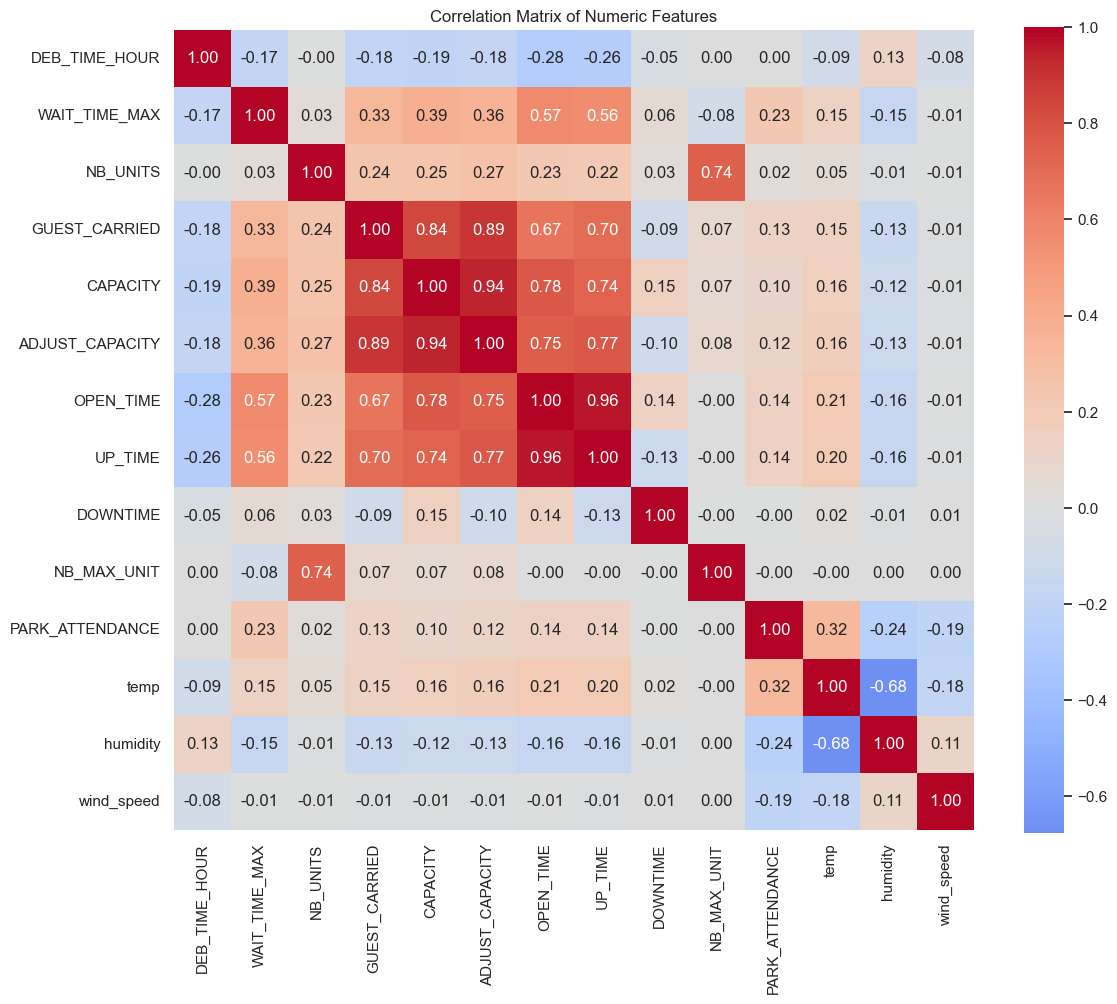

In [90]:
# Select only numeric columns and compute correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Create heatmap (same as above)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True)

plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

In [91]:
df = df.dropna(subset=["PARK_ATTENDANCE"])
df = df.drop(columns=["REF_CLOSING_DESCRIPTION", "temp", "humidity", "wind_speed","NIGHT_SHOW", "PARADE_1", "PARADE_2"])
df.tail()

DATE             DEB_TIME  DEB_TIME_HOUR  \
2368528  2022-07-26  2022-07-26 21:45:00             21   
2368529  2022-07-26  2022-07-26 22:00:00             22   
2368530  2022-07-26  2022-07-26 22:15:00             22   
2368531  2022-07-26  2022-07-26 22:30:00             22   
2368532  2022-07-26  2022-07-26 22:45:00             22   

                        FIN_TIME ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  \
2368528  2022-07-26 22:00:00.000                  Zipline             30   
2368529  2022-07-26 22:15:00.000                  Zipline             25   
2368530  2022-07-26 22:30:00.000                  Zipline             30   
2368531  2022-07-26 22:45:00.000                  Zipline             30   
2368532  2022-07-26 23:00:00.000                  Zipline             10   

         NB_UNITS  GUEST_CARRIED  CAPACITY  ADJUST_CAPACITY  OPEN_TIME  \
2368528      12.0          97.00    101.25           101.25         15   
2368529      12.0          80.00    101.25           101.25         15   
2368530      12.0          75.00    101.25           101.25         15   
2368531      12.0         101.25    101.25           101.25         15   
2368532      12.0          99.00    101.25           101.25         15   

         UP_TIME  DOWNTIME  NB_MAX_UNIT  PARK_ATTENDANCE  is_holiday  
2368528       15         0         12.0          26391.0       False  
2368529       15         0         12.0          26391.0       False  
2368530       15         0         12.0          26391.0       False  
2368531       15         0         12.0          26391.0       False  
2368532       15         0         12.0          26391.0       False

In [ ]:
# 1. Prepare your data
# Prophet requires a specific format with columns 'ds' (date) and 'y' (target variable)
df = pd.DataFrame({
    'ds': pd.to_datetime(df['DATE']),  # Your dates
    'y': df["WAIT_TIME_MAX"]  # Your target variable
})

# 2. Split by specific date
train_df = df[df['ds'] <= '2022-07-19']
test_df = df[df['ds'] > '2022-07-19']

# 3. Train the model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)

model.fit(train_df)

# 4. Evaluate on test set
test_predictions = model.predict(test_df)

21:58:42 - cmdstanpy - INFO - Chain [1] start processing
22:02:07 - cmdstanpy - INFO - Chain [1] done processing


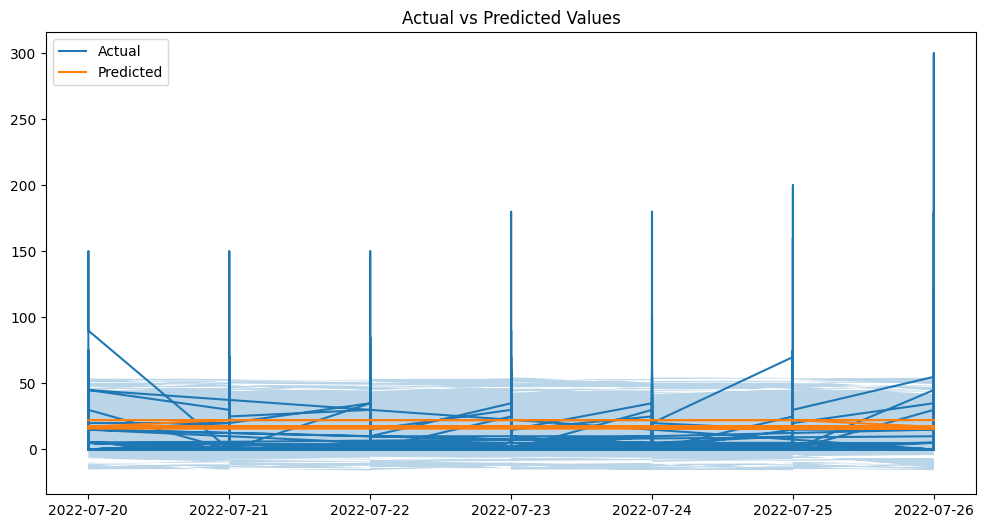

In [ ]:
# Optional: Plot actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual')
plt.plot(test_df['ds'], test_predictions['yhat'], label='Predicted')
plt.fill_between(test_df['ds'],
                 test_predictions['yhat_lower'],
                 test_predictions['yhat_upper'],
                 alpha=0.3)
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
# prophet v2

In [ ]:
# First, let's create predictions per attraction
predictions_by_attraction = {}

for attraction in df['ENTITY_DESCRIPTION_SHORT'].unique():
    # Filter data for this attraction
    attraction_df = df[df['ENTITY_DESCRIPTION_SHORT'] == attraction].copy()
    
    # Prepare Prophet dataframe for this attraction
    prophet_df = pd.DataFrame({
        'ds': pd.to_datetime(attraction_df['DATE']),
        'y': attraction_df['WAIT_TIME_MAX'],
        'attendance': attraction_df['PARK_ATTENDANCE'],
        'is_holiday_encoded': le_holiday.fit_transform(attraction_df['is_holiday']),
        'guest_carried': attraction_df['GUEST_CARRIED'],
        'deb_time_hour': attraction_df['DEB_TIME_HOUR'],
        'open_time': attraction_df['OPEN_TIME'],
        'up_time': attraction_df['UP_TIME'],
        'downtime': attraction_df['DOWNTIME']
    })
    
    # Split into train/test
    train_df = prophet_df[prophet_df['ds'] <= '2022-07-12']
    test_df = prophet_df[prophet_df['ds'] > '2022-07-12']
    
    # Create and fit model
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True, 
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=10.0
    )
    
    # Add regressors
    for col in ['attendance', 'is_holiday_encoded', 'guest_carried', 
                'deb_time_hour', 'open_time', 'up_time', 'downtime']:
        model.add_regressor(col)
    
    model.fit(train_df)
    
    # Make predictions
    test_predictions = model.predict(test_df)
    
    # Store predictions and calculate metrics
    predictions_by_attraction[attraction] = {
        'test_df': test_df,
        'predictions': test_predictions
    }    

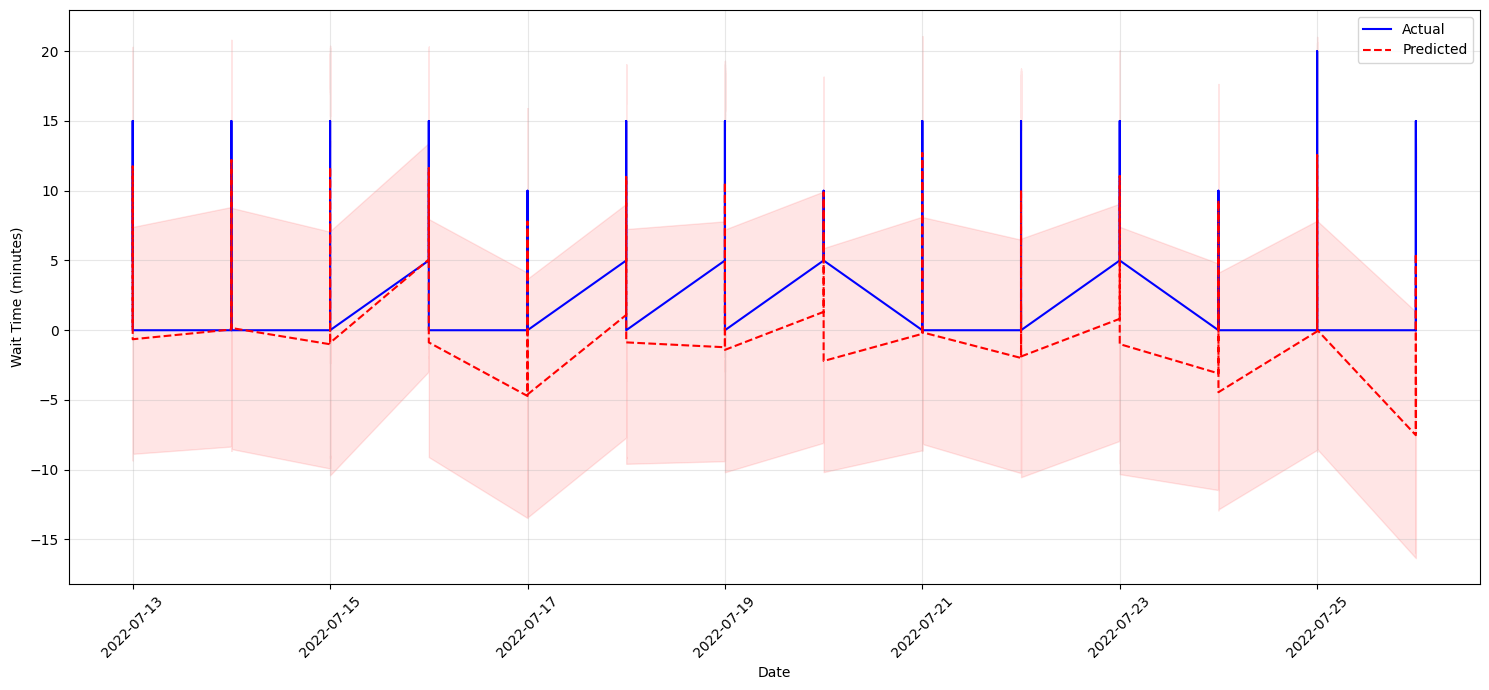

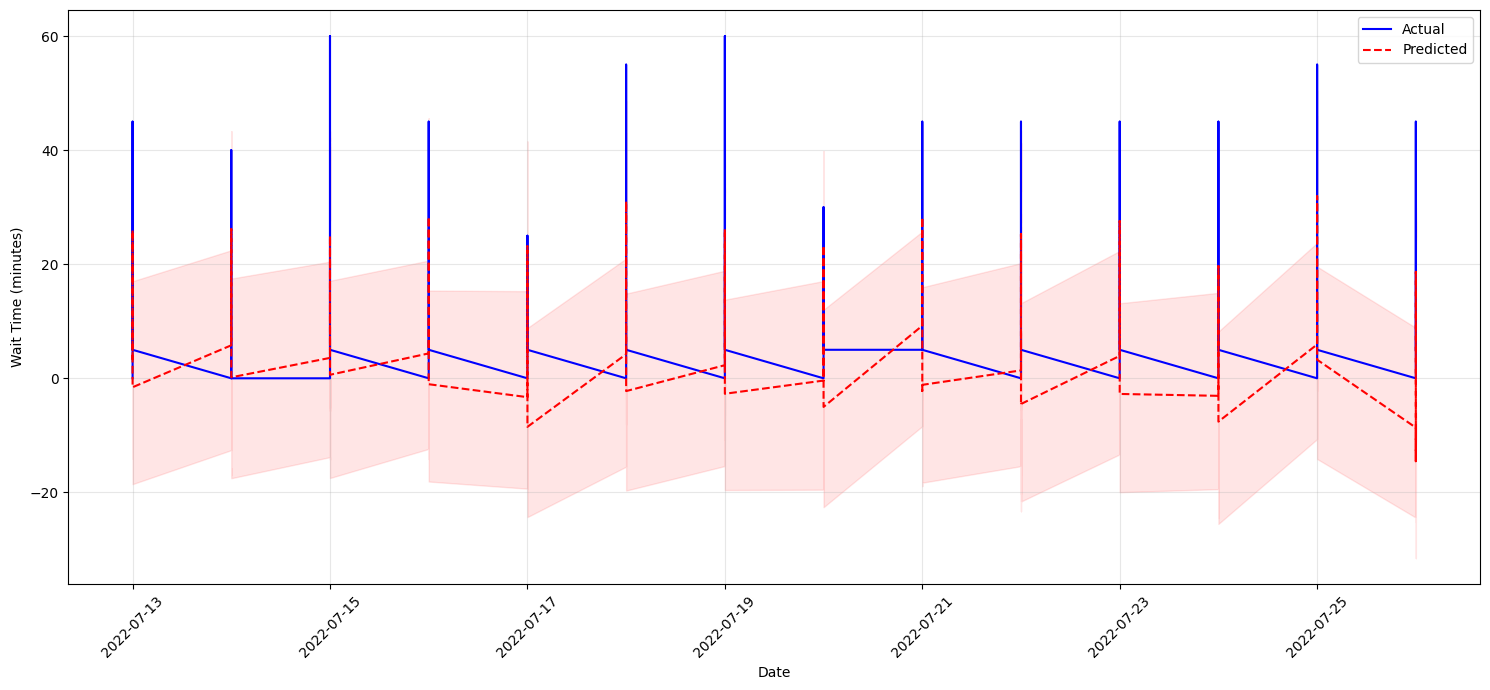

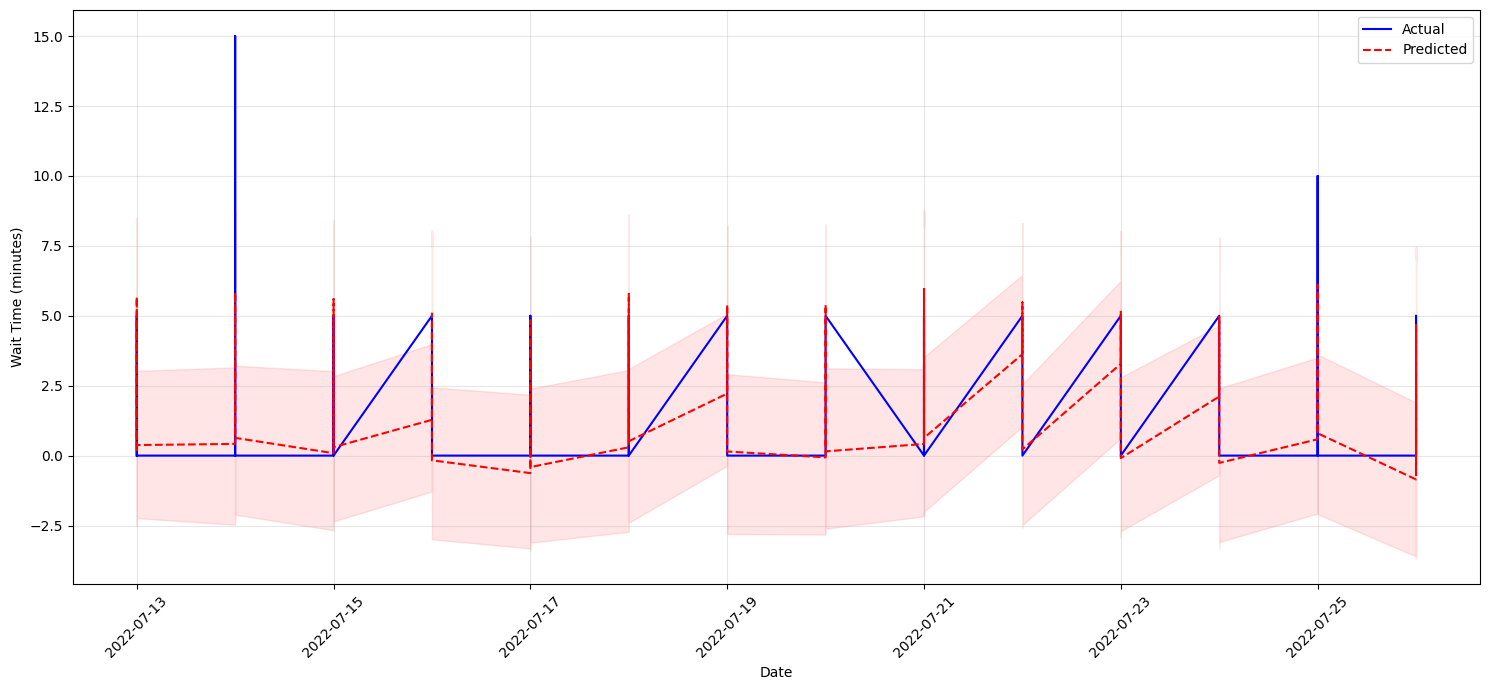

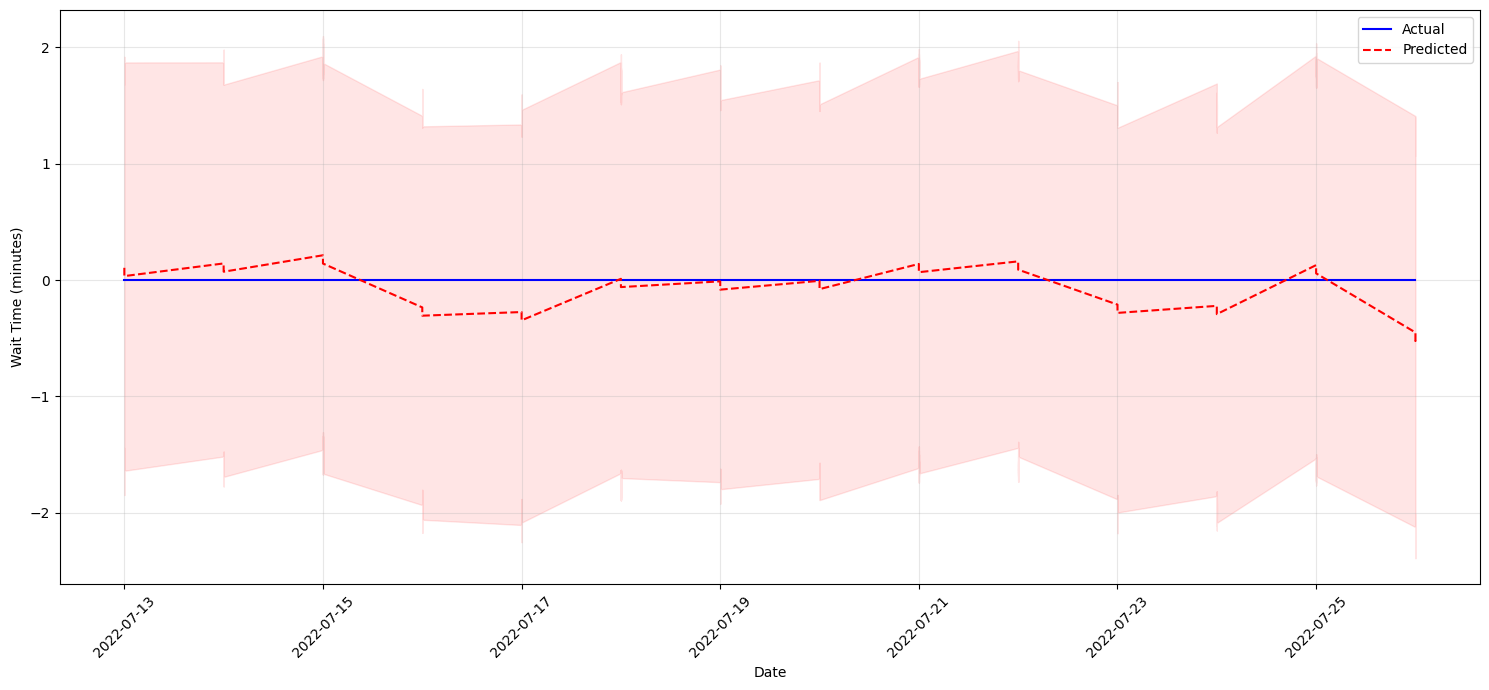

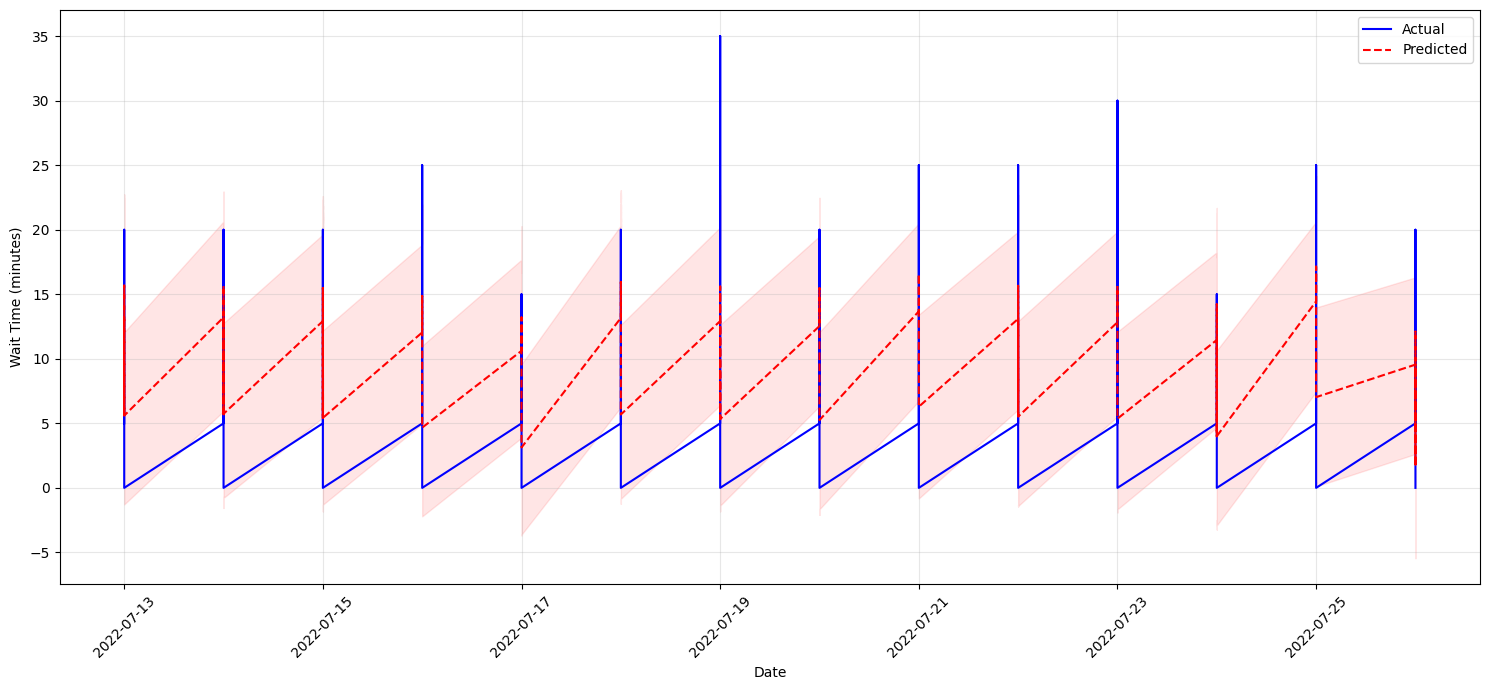

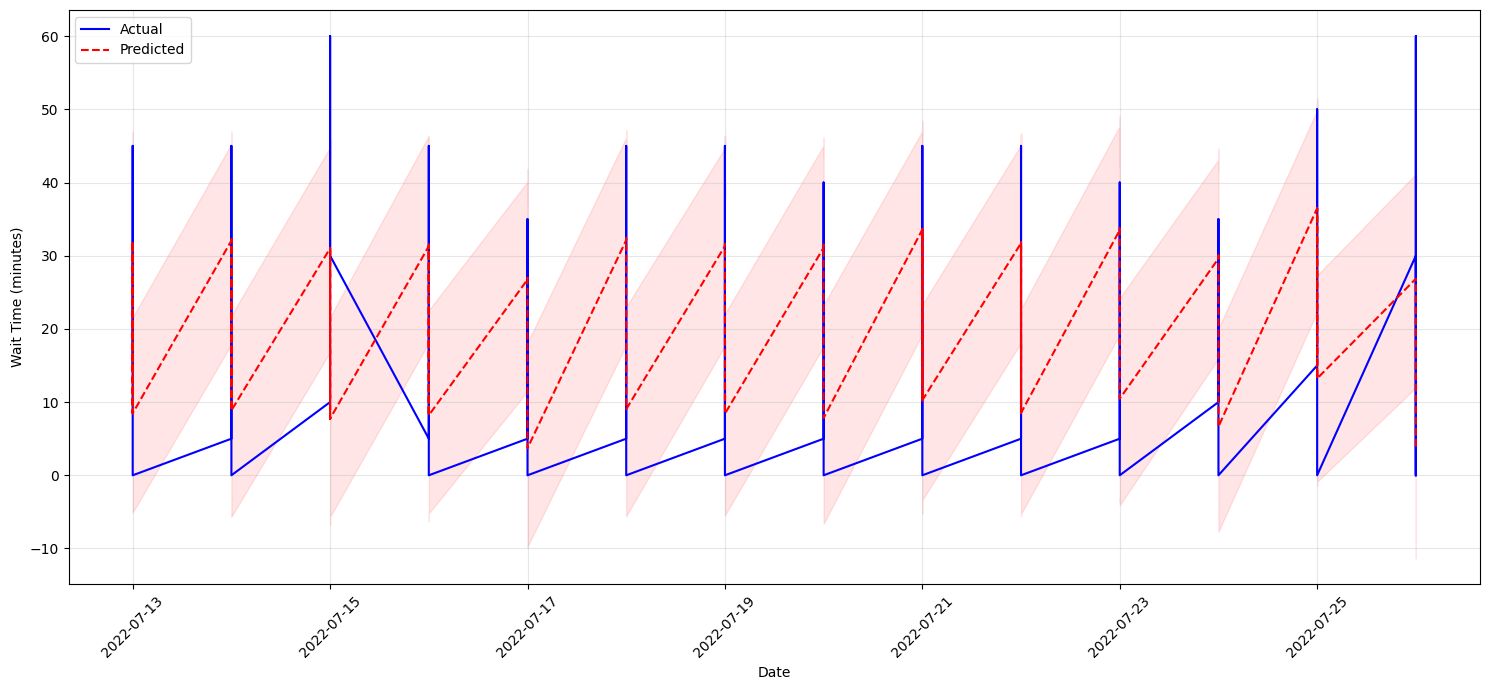

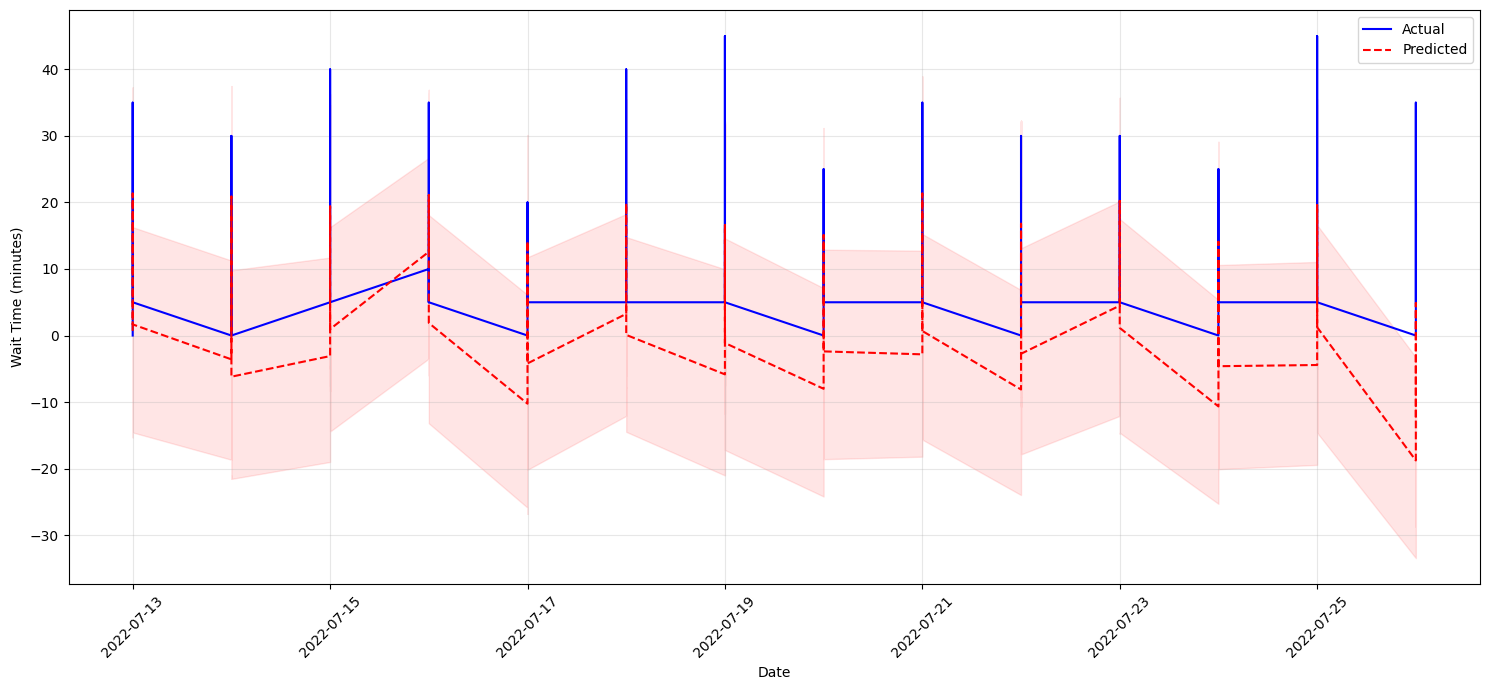

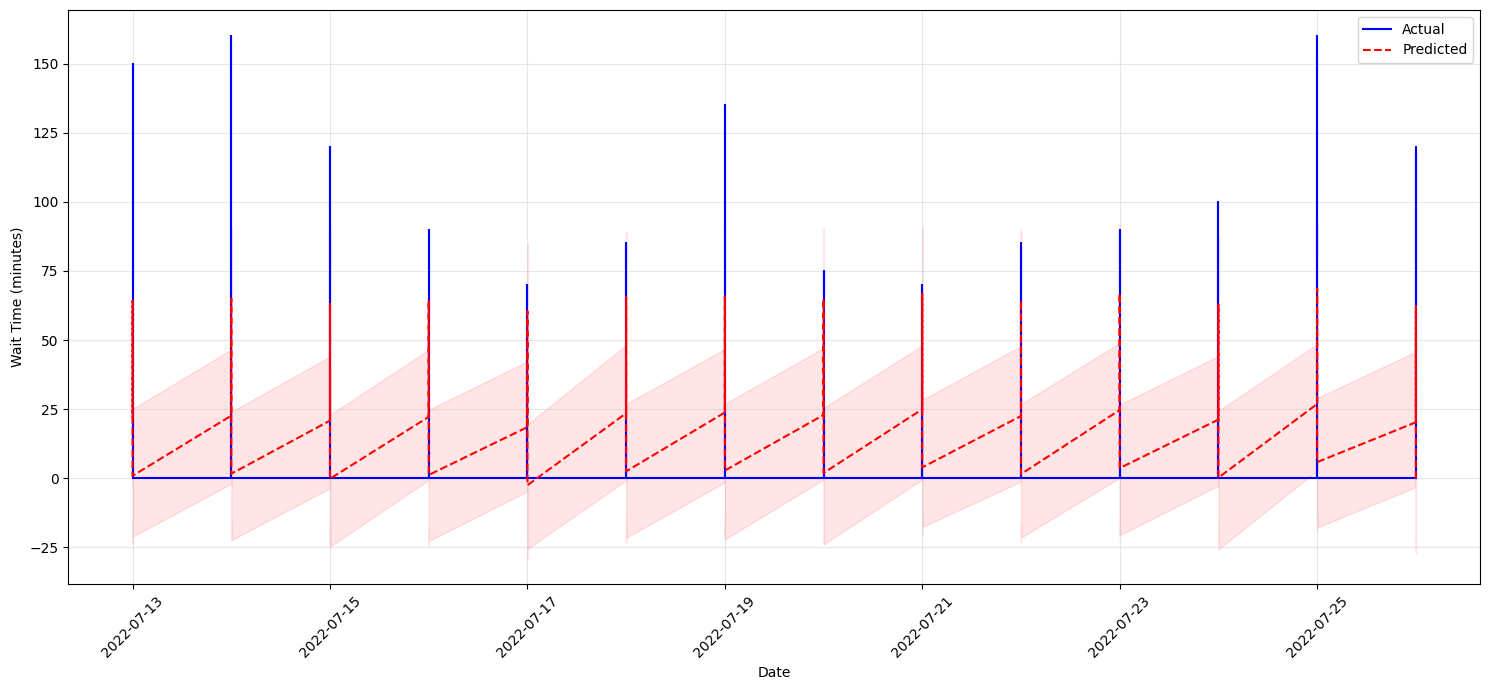

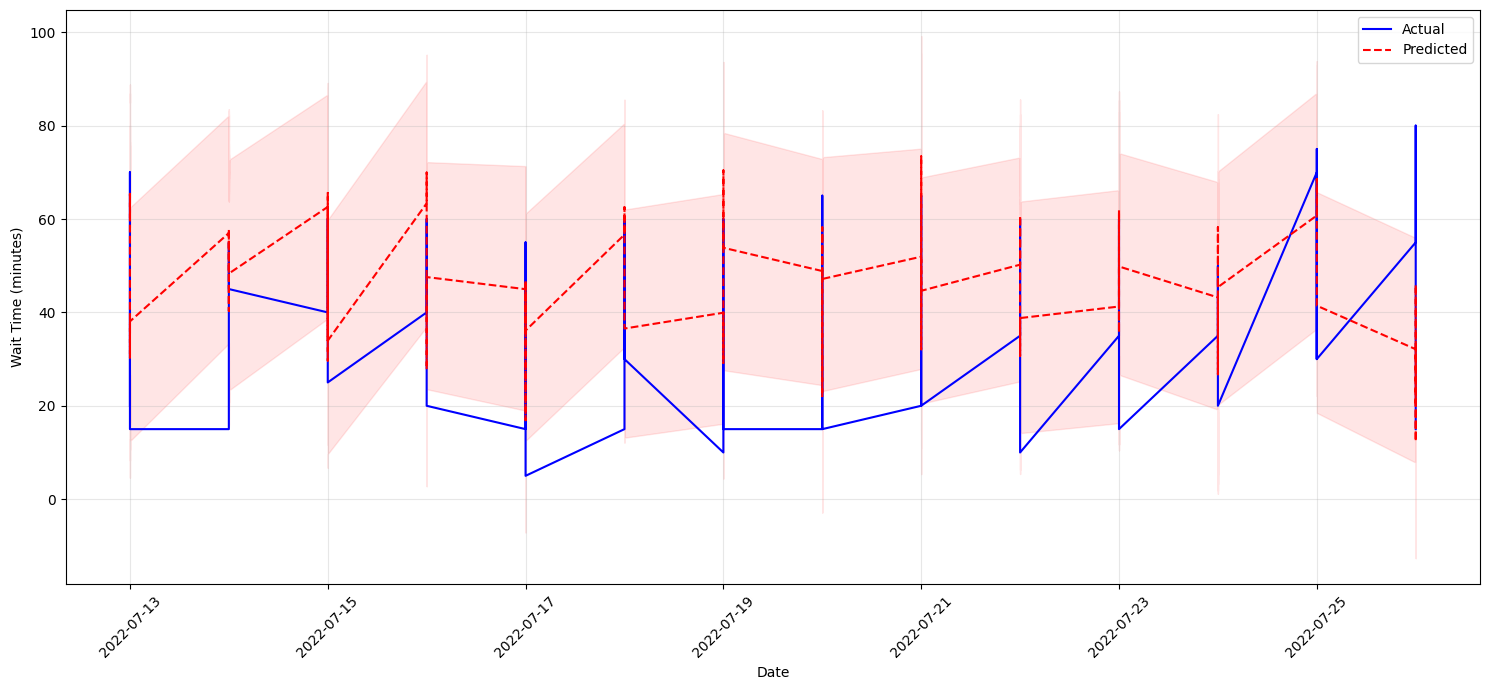

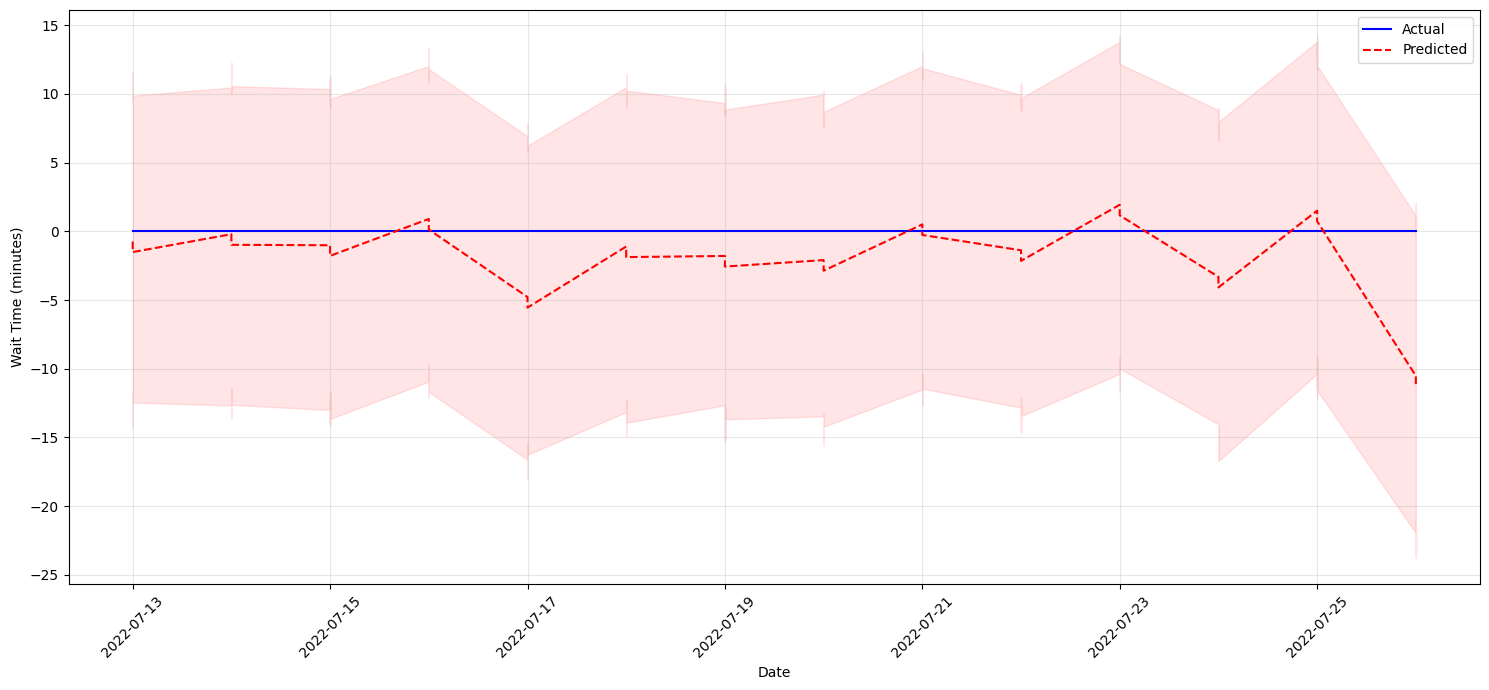

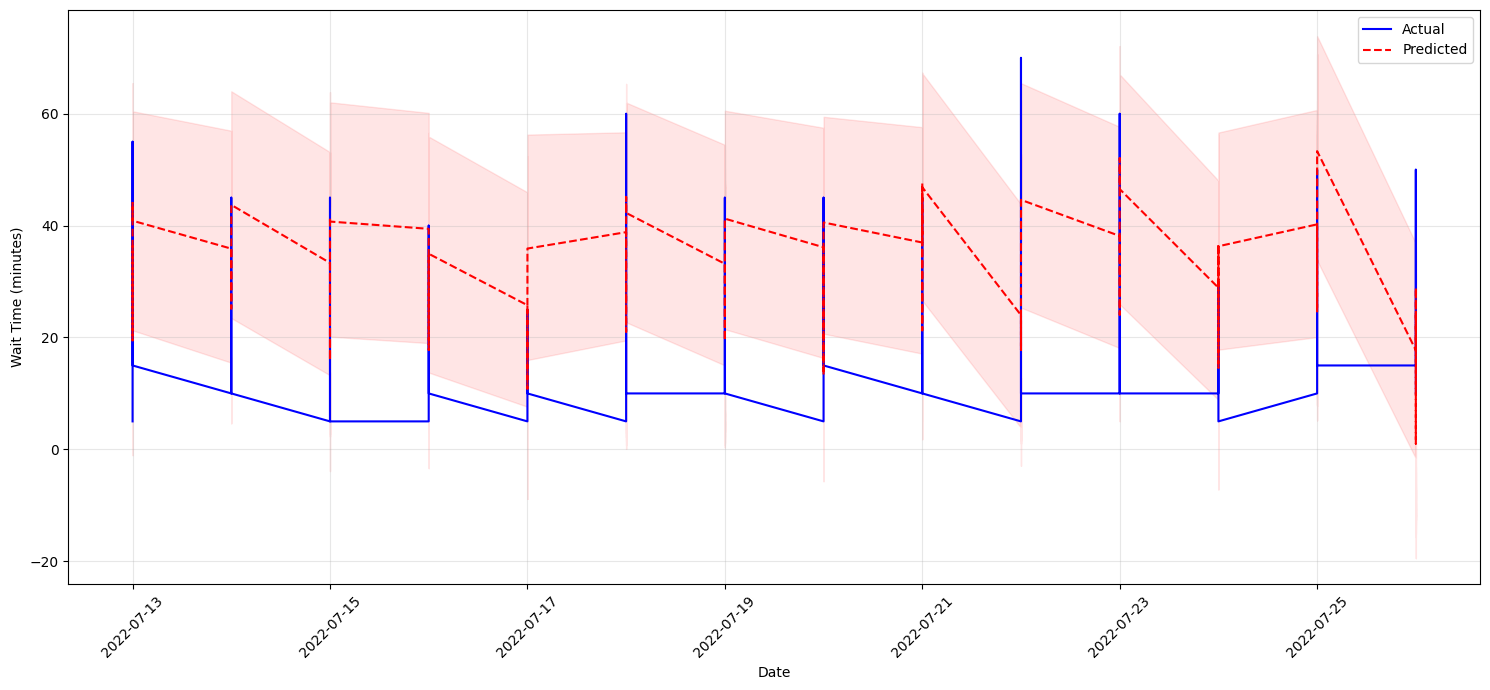

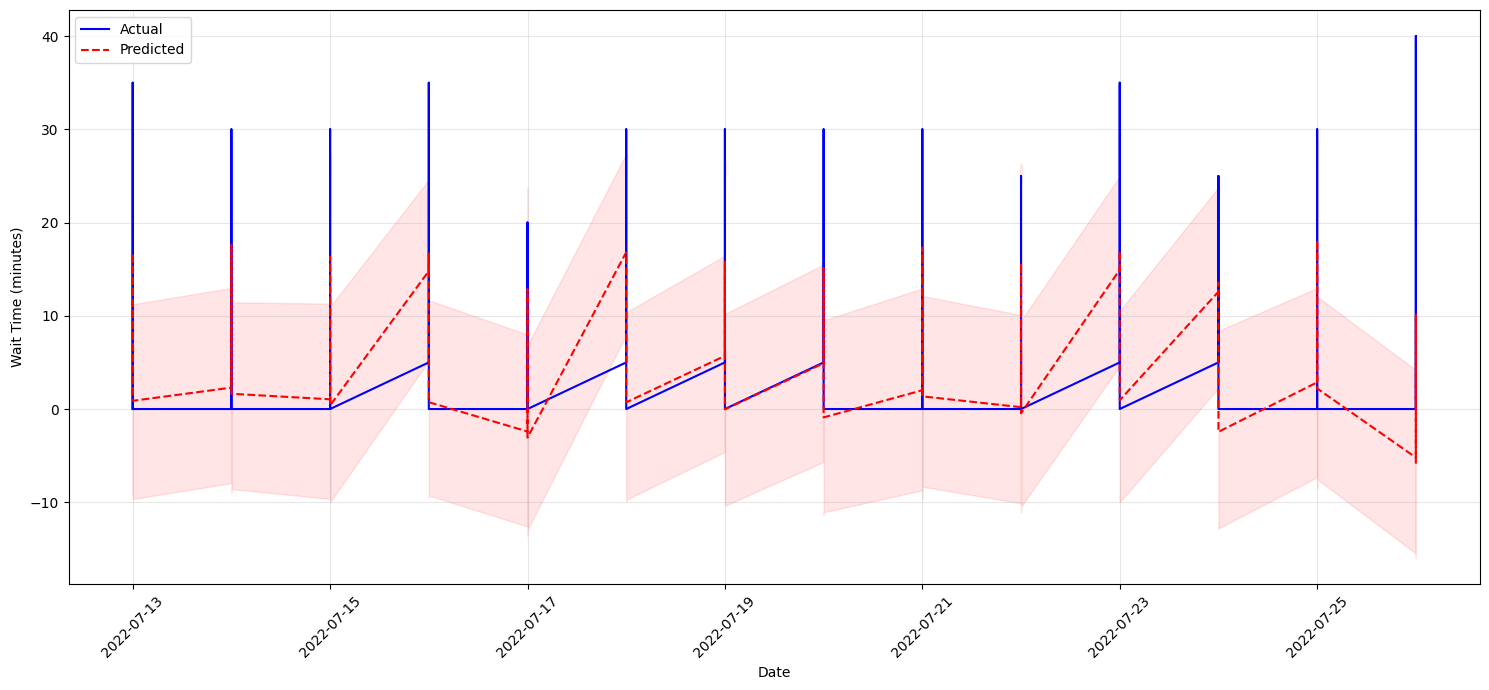

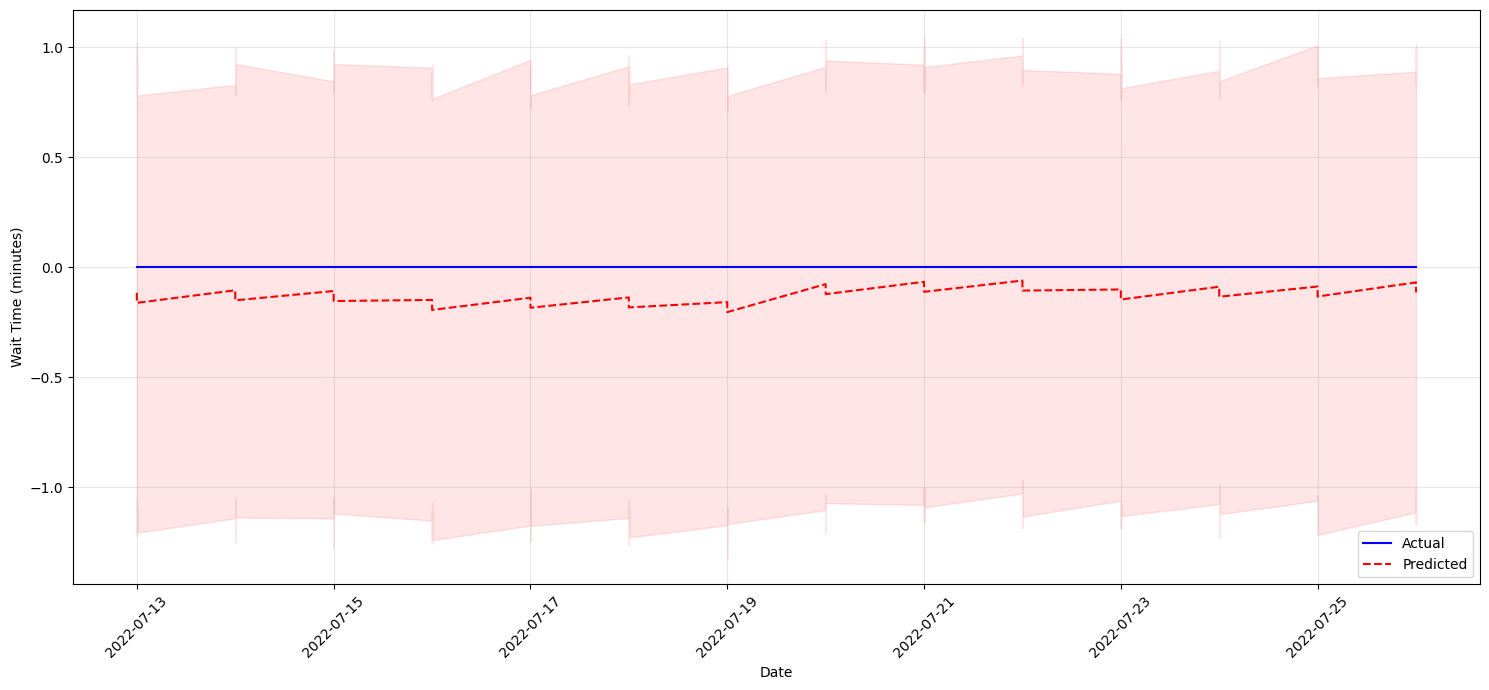

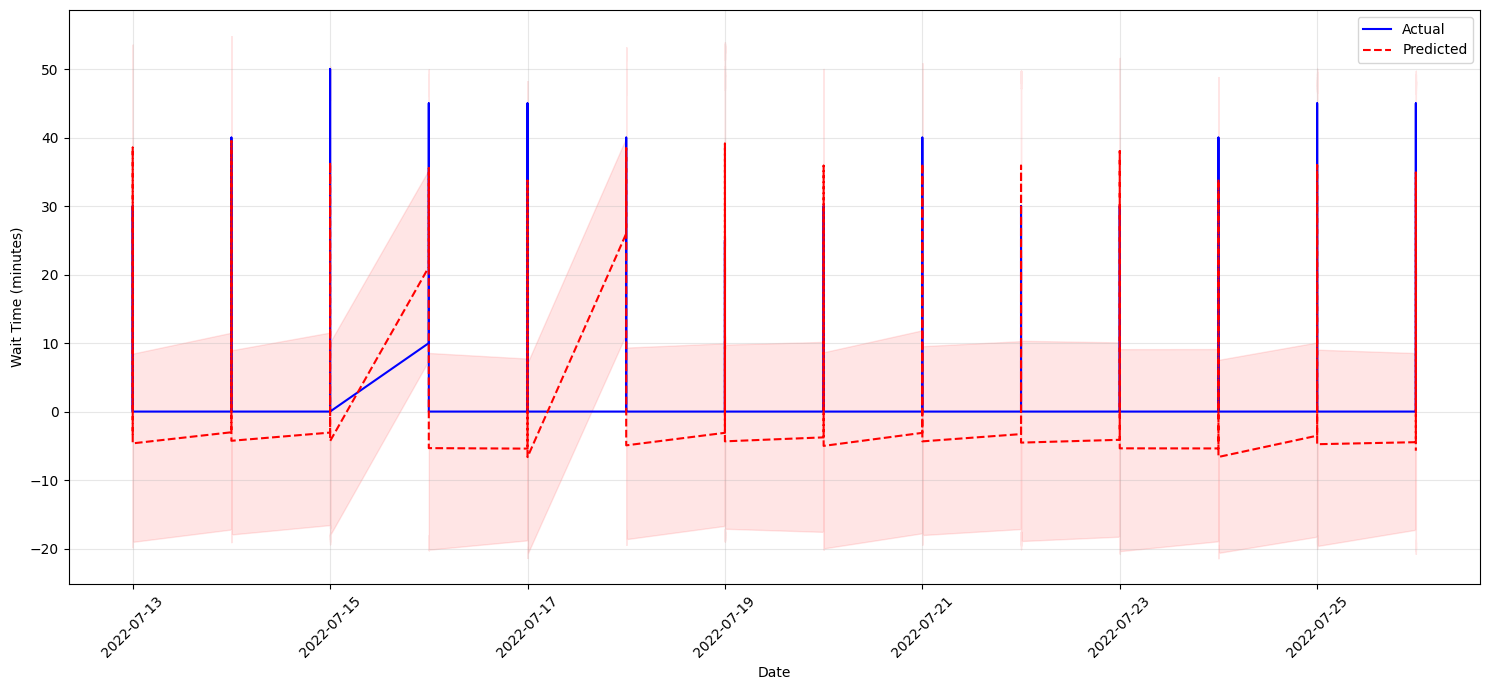

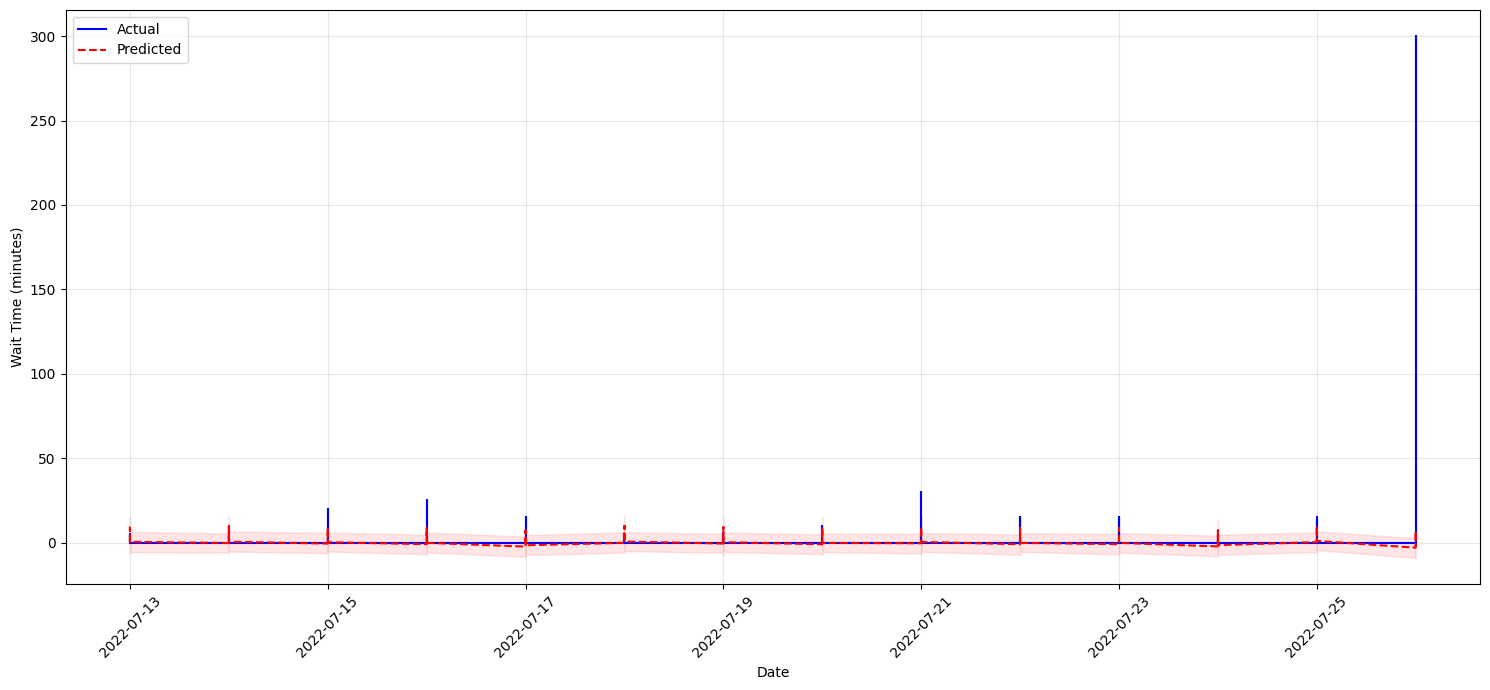

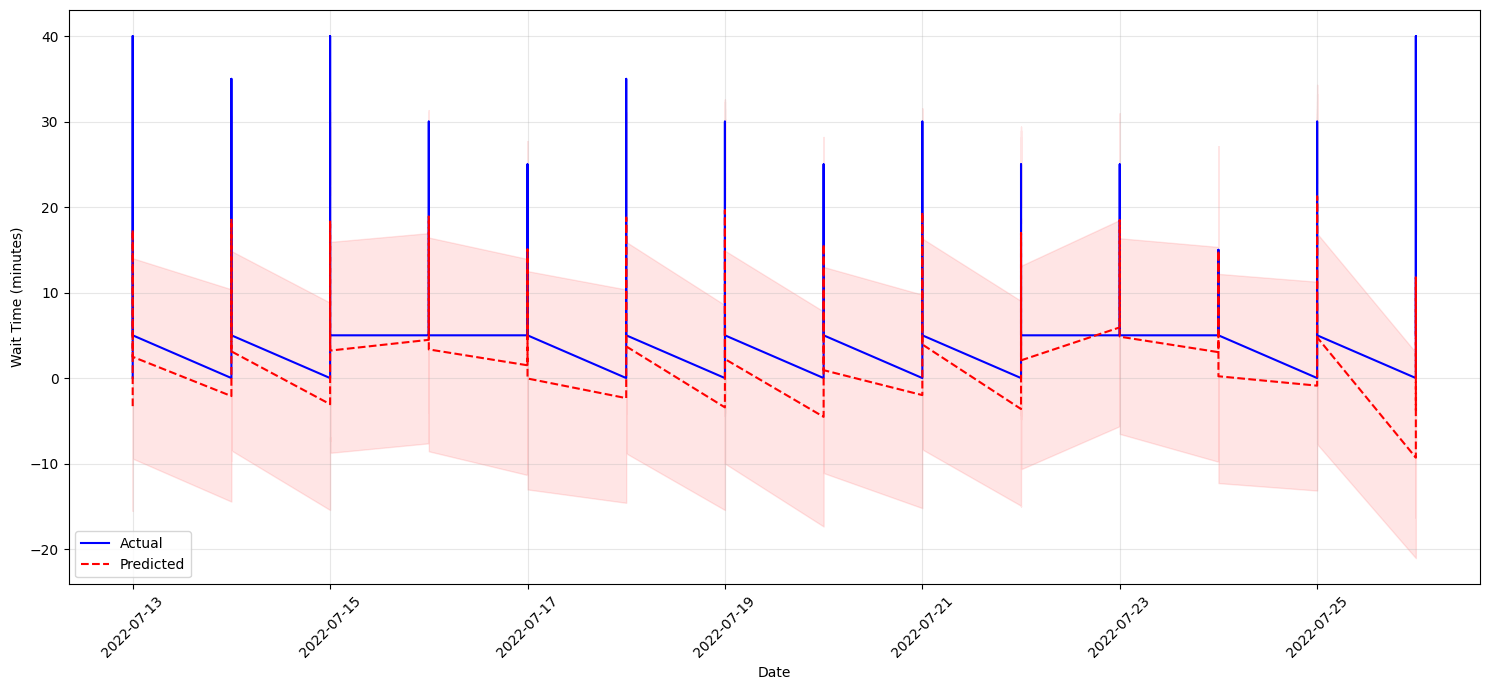

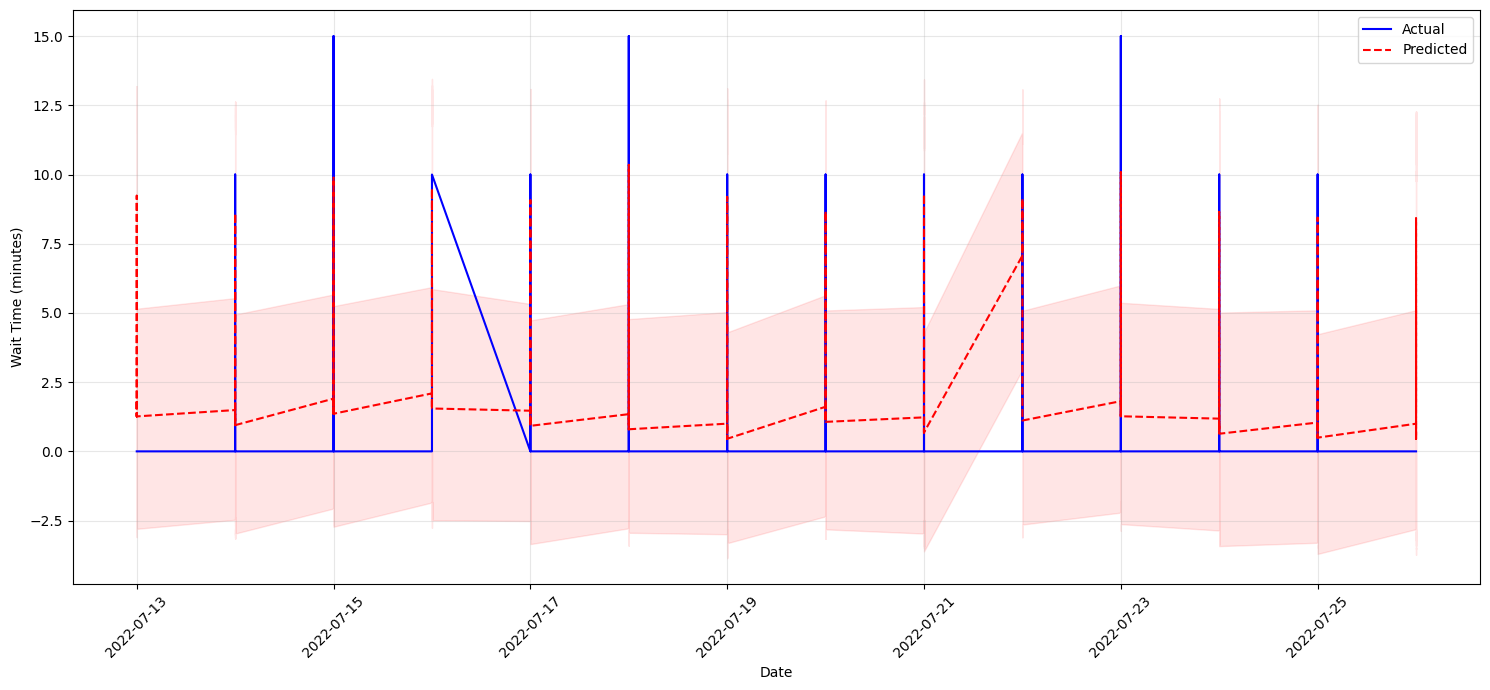

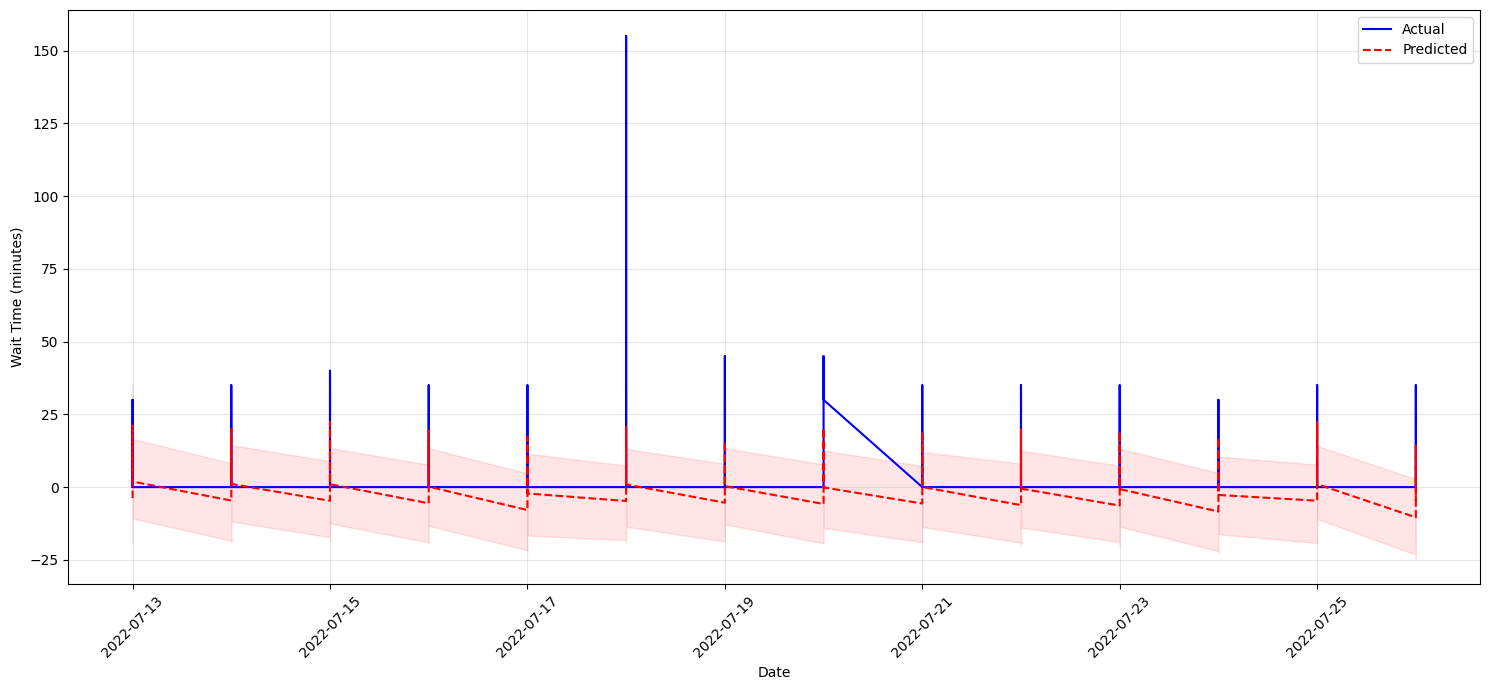

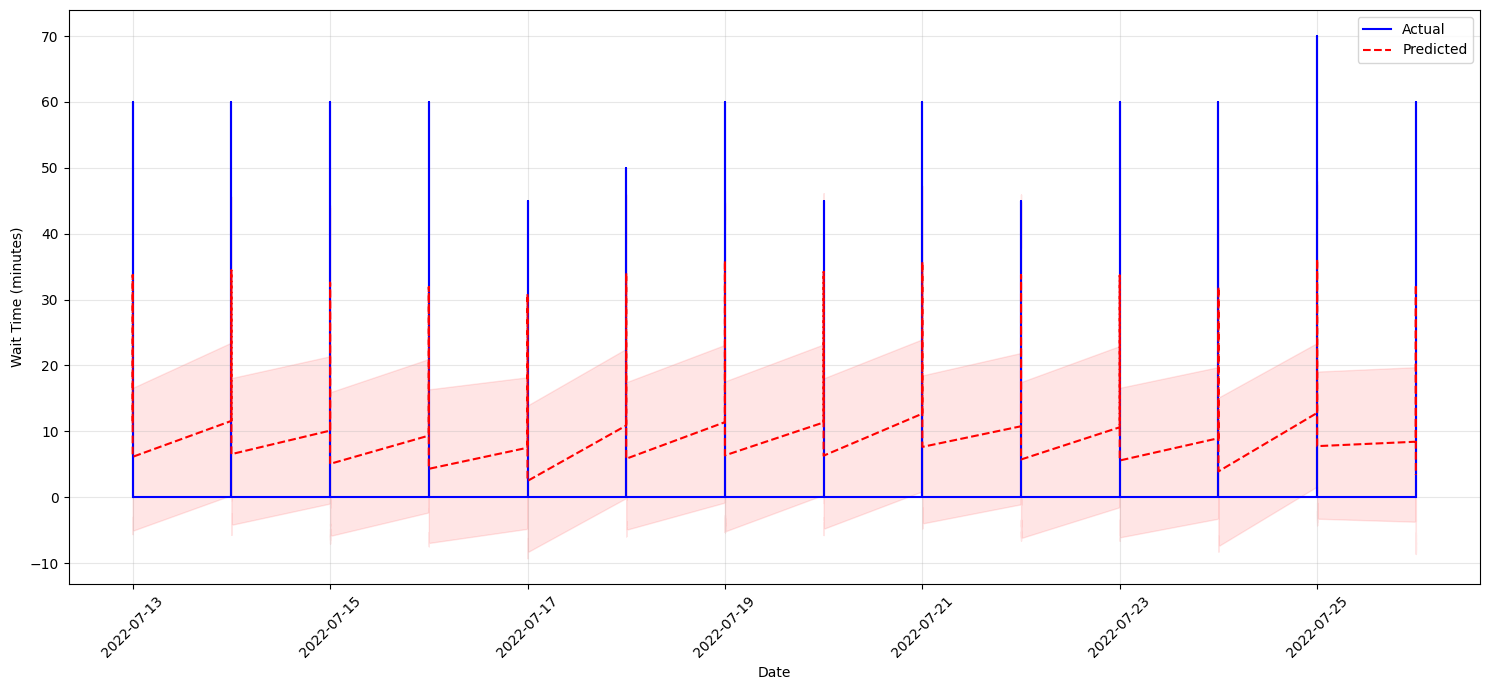

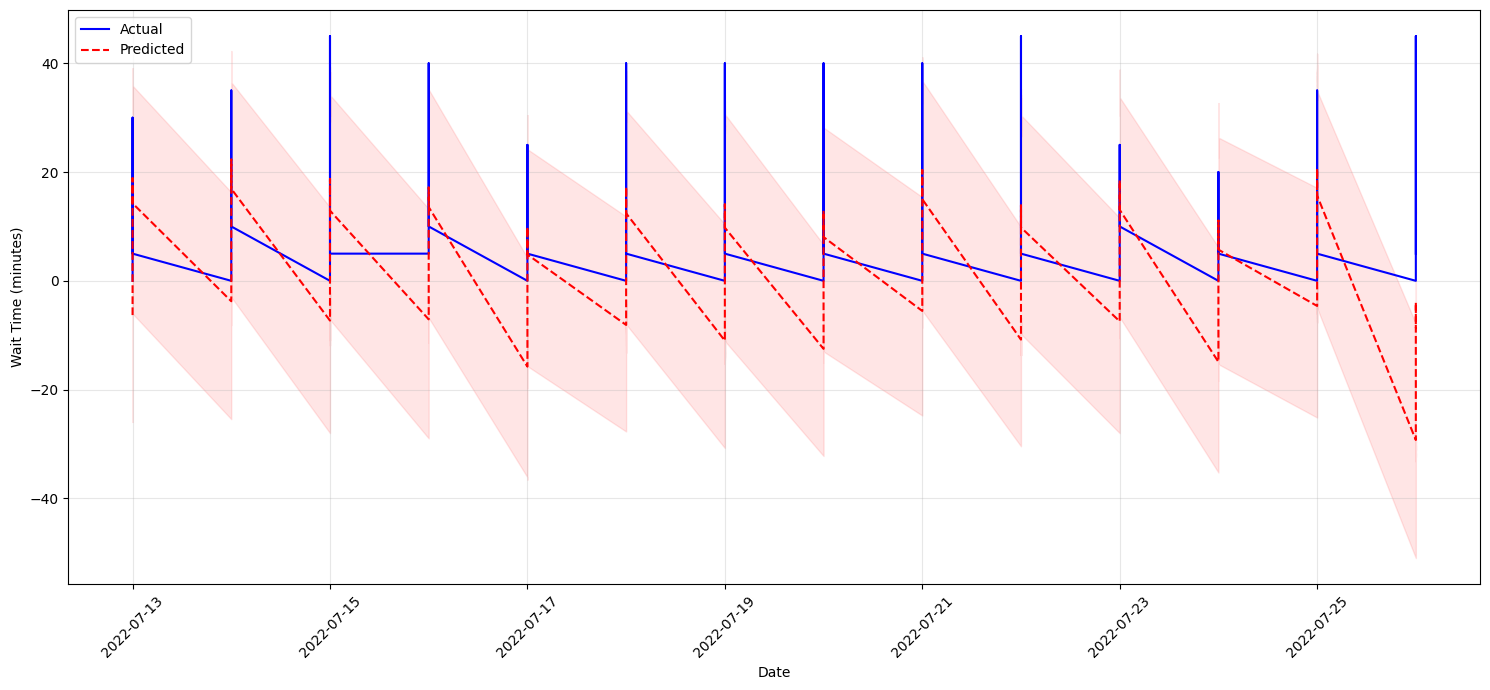

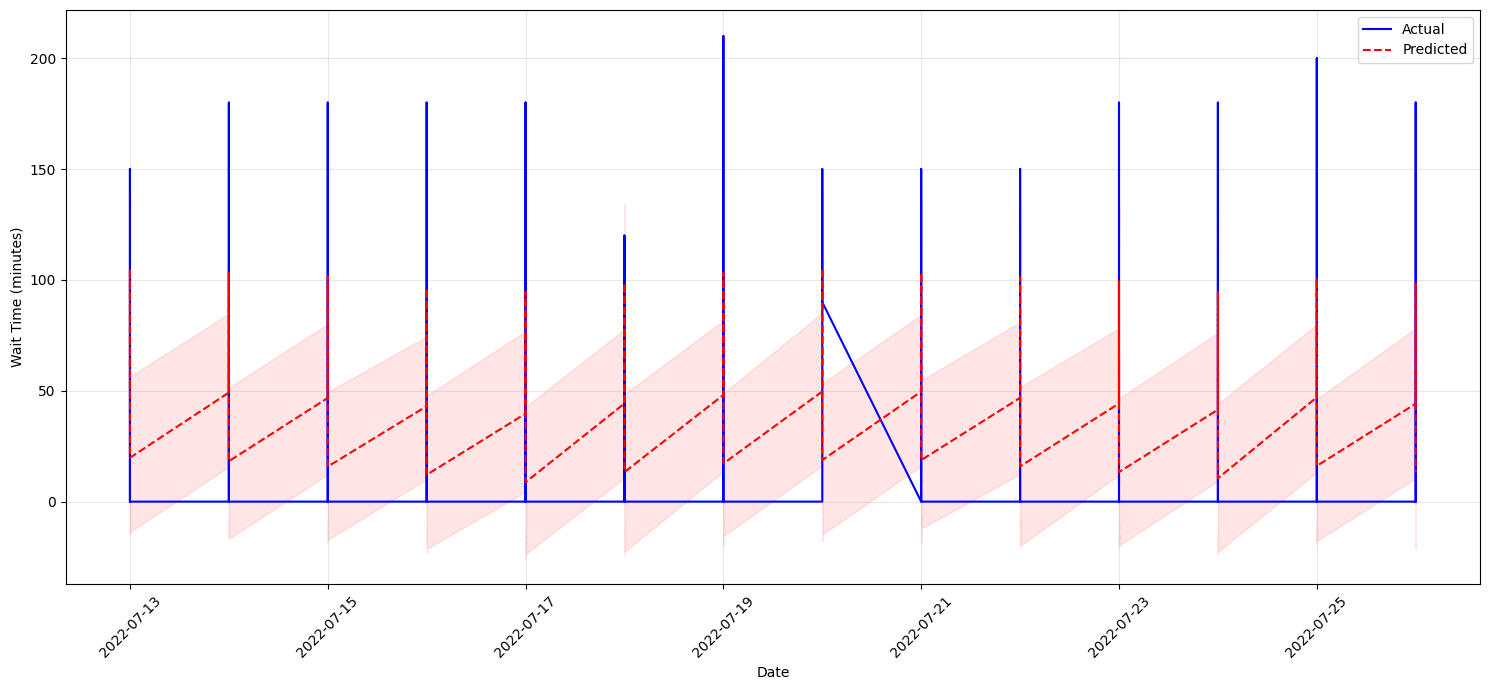

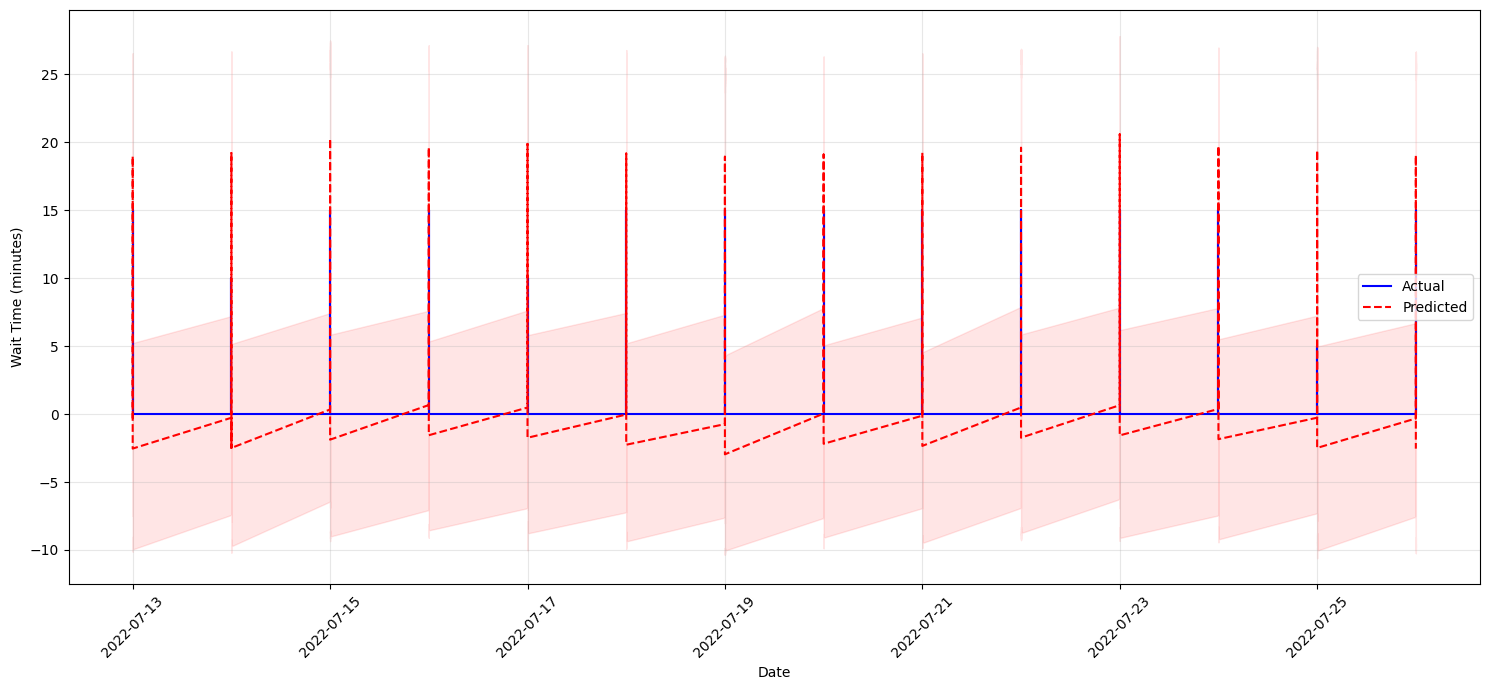

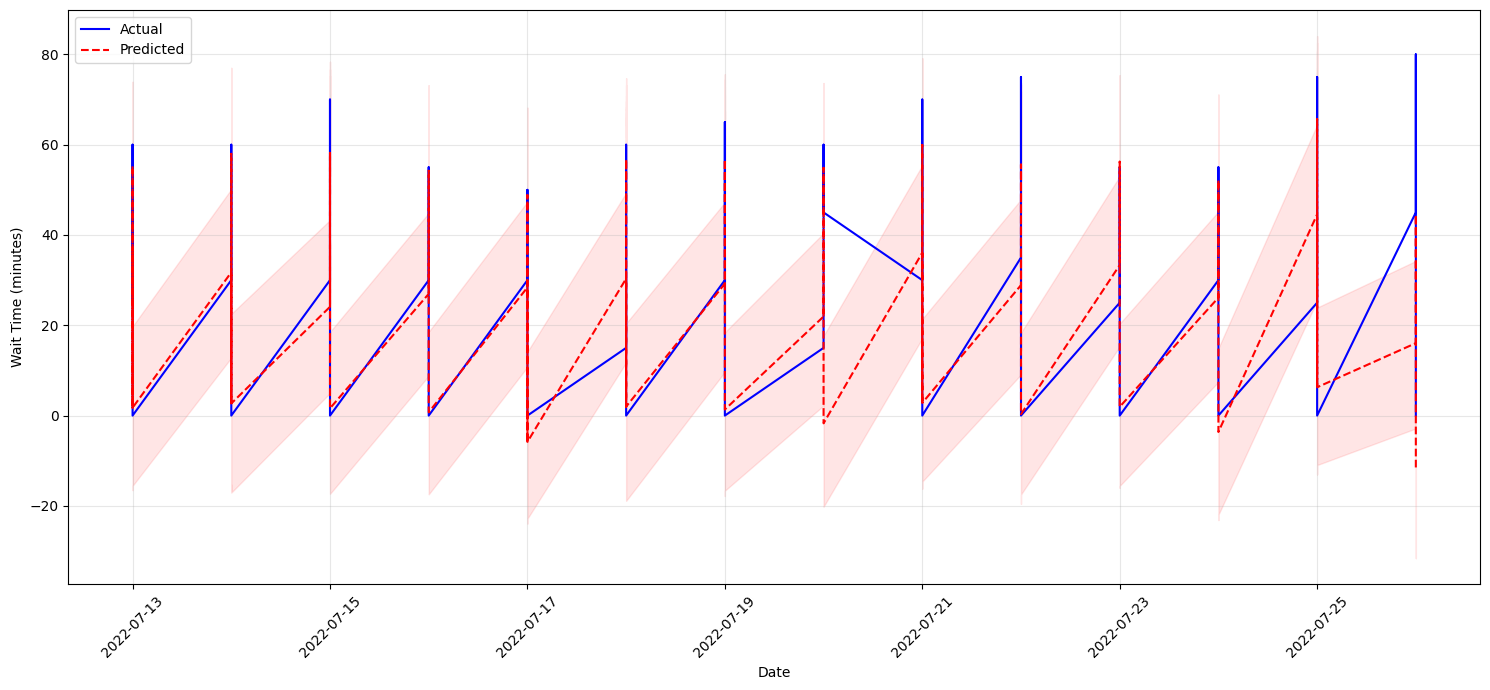

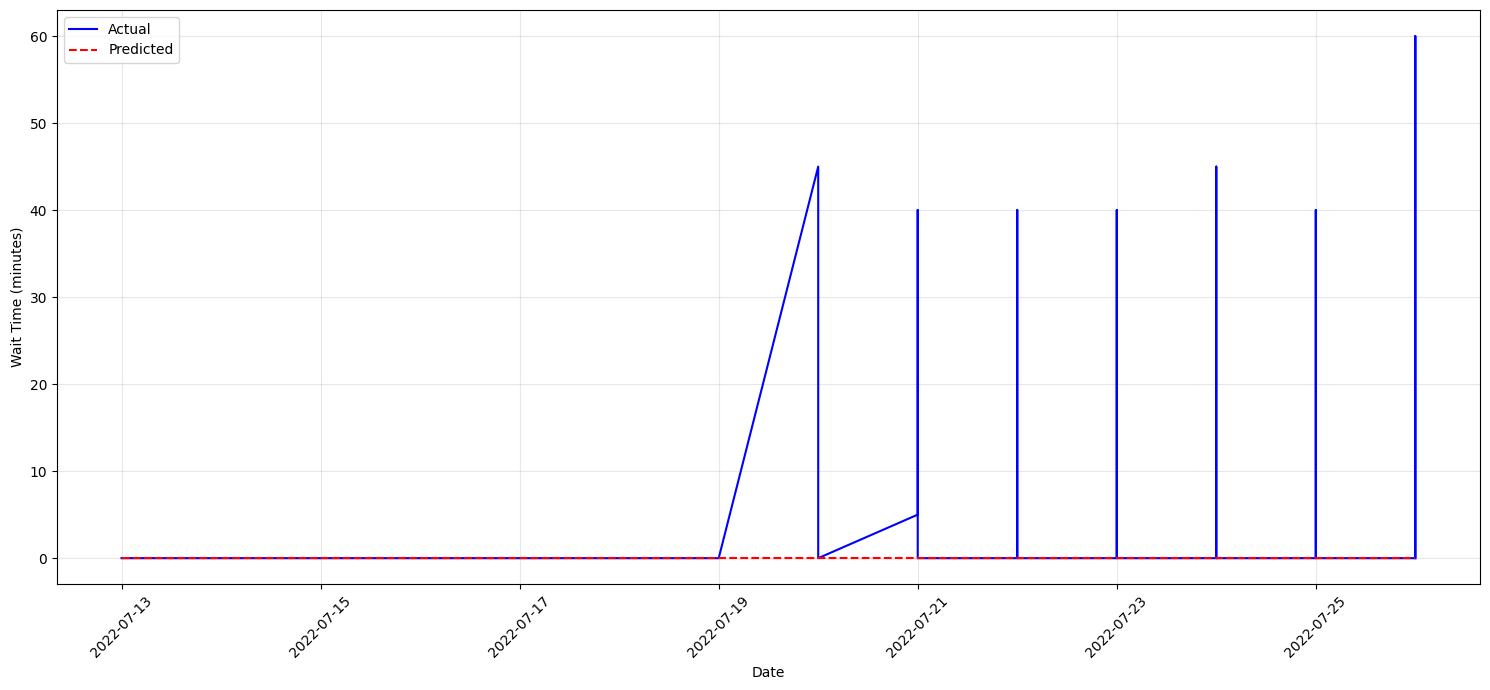

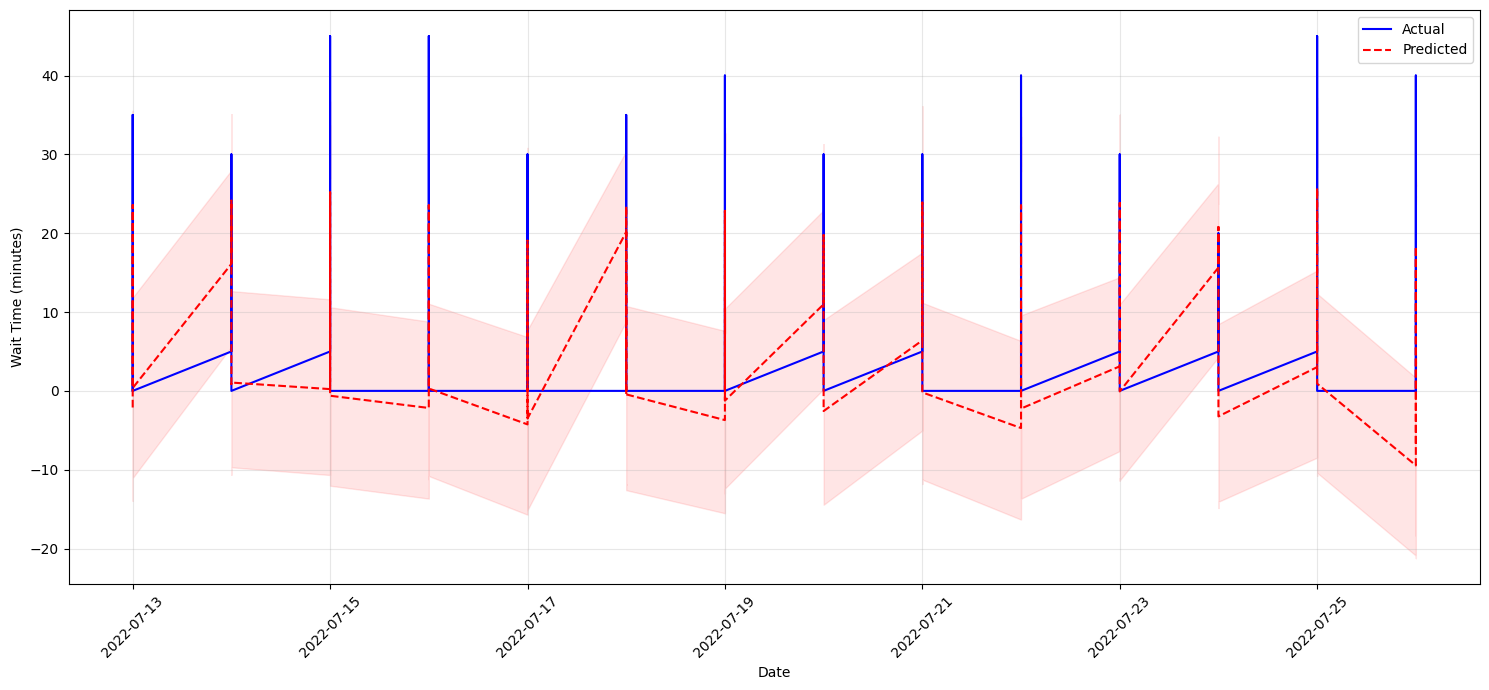

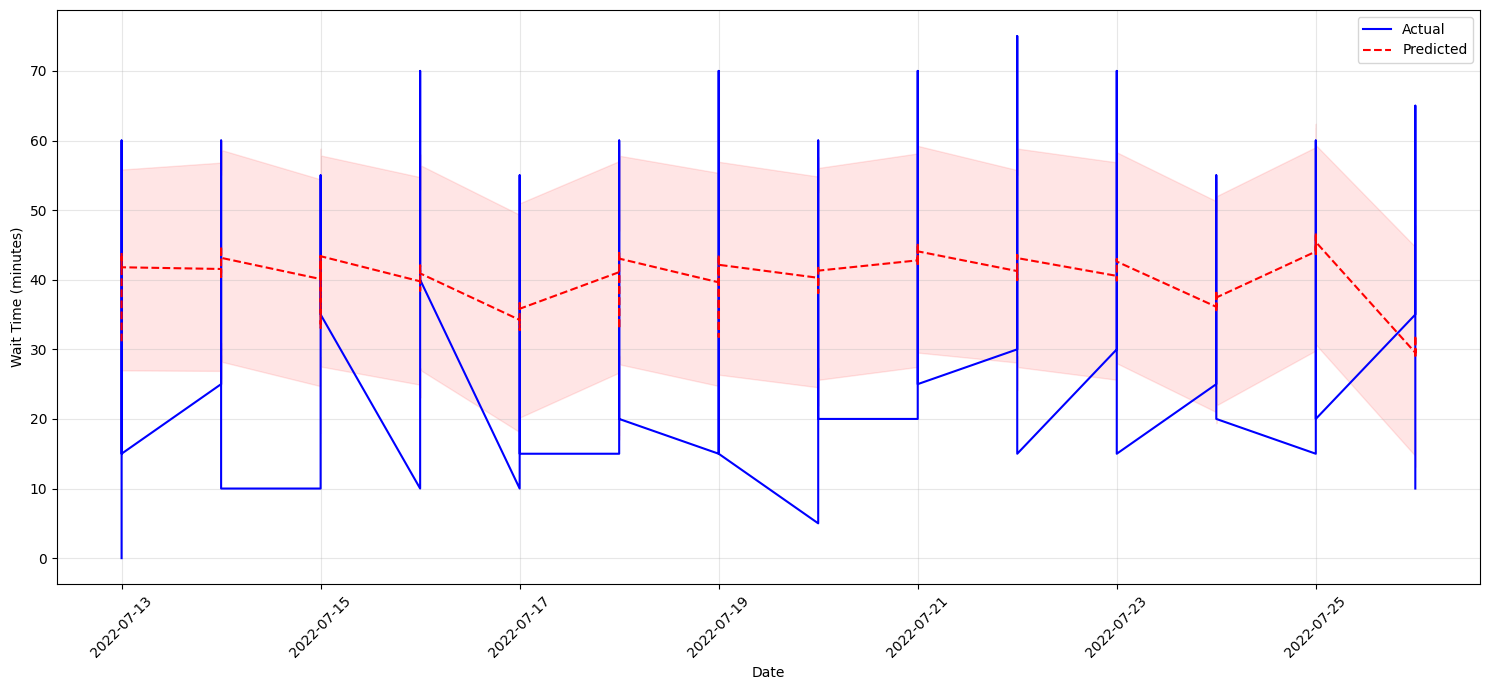

In [ ]:
# Plot for each attraction
for attraction in df['ENTITY_DESCRIPTION_SHORT'].unique():
    test_df = predictions_by_attraction[attraction]['test_df']
    predictions = predictions_by_attraction[attraction]['predictions']
    
    plt.figure(figsize=(15, 7))
    
    # Plot actual values
    plt.plot(test_df['ds'], test_df['y'], 
             label='Actual', color='blue')
    
    # Plot predictions with confidence intervals
    plt.plot(test_df['ds'], predictions['yhat'], 
             label='Predicted', color='red', linestyle='--')
    plt.fill_between(test_df['ds'], 
                     predictions['yhat_lower'], 
                     predictions['yhat_upper'], 
                     color='red', 
                     alpha=0.1)
    
    plt.xlabel('Date')
    plt.ylabel('Wait Time (minutes)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
# Prophet v3

In [ ]:
# XGB

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Feature Engineering
df = df.copy()

# Add time-based features
df['dayofweek'] = pd.to_datetime(df['DATE']).dt.dayofweek
df['month'] = pd.to_datetime(df['DATE']).dt.month
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

# 2. Feature Selection
features = [
    'ENTITY_DESCRIPTION_SHORT', 
    'DEB_TIME_HOUR',
    'dayofweek',
    'month',
    'is_weekend',
    'NB_UNITS',
    'CAPACITY',
    'ADJUST_CAPACITY',
    'OPEN_TIME',
    'UP_TIME',
    'DOWNTIME',
    'NB_MAX_UNIT',
    'REF_CLOSING_DESCRIPTION',
    'PARK_ATTENDANCE',
    'temp',
    'humidity',
    'wind_speed'
]

# 3. Data Preprocessing
le = LabelEncoder()
df['ENTITY_DESCRIPTION_SHORT'] = le.fit_transform(df['ENTITY_DESCRIPTION_SHORT'])
df['REF_CLOSING_DESCRIPTION'] = df['REF_CLOSING_DESCRIPTION'].fillna('None')
df['REF_CLOSING_DESCRIPTION'] = le.fit_transform(df['REF_CLOSING_DESCRIPTION'])

# Split data
split_date = '2022-07-19'
train = df[df['DATE'] < split_date]
test = df[df['DATE'] >= split_date]

# 4. Grid Search parameters to try
param_combinations = [
    {'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100},
    {'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100},
    {'max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 100},
    {'max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 100},
    {'max_depth': 7, 'learning_rate': 0.01, 'n_estimators': 100},
    {'max_depth': 7, 'learning_rate': 0.1, 'n_estimators': 100},
    {'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 200},
    {'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 200},
    {'max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 200},
    {'max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 200},
    {'max_depth': 7, 'learning_rate': 0.01, 'n_estimators': 200},
    {'max_depth': 7, 'learning_rate': 0.1, 'n_estimators': 200}
]

# Store results
results = []

# Try each parameter combination
for params in param_combinations:
    print(f"\nTrying parameters: {params}")
    
    # Train model
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        **params
    )
    
    model.fit(train[features], train['WAIT_TIME_MAX'])
    predictions = model.predict(test[features])
    
    # Calculate metrics
    mae = mean_absolute_error(test['WAIT_TIME_MAX'], predictions)
    rmse = np.sqrt(mean_squared_error(test['WAIT_TIME_MAX'], predictions))
    r2 = r2_score(test['WAIT_TIME_MAX'], predictions)
    
    results.append({
        'params': params,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    })
    
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.3f}")

# Find best model
best_result = min(results, key=lambda x: x['rmse'])
print("\nBest parameters:")
print(best_result['params'])
print(f"Best MAE: {best_result['mae']:.2f}")
print(f"Best RMSE: {best_result['rmse']:.2f}")
print(f"Best R2: {best_result['r2']:.3f}")

# Train final model with best parameters
final_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    **best_result['params']
)

final_model.fit(train[features], train['WAIT_TIME_MAX'])
final_predictions = final_model.predict(test[features])

# Feature importance for best model
importance_df = pd.DataFrame({
    'feature': features,
    'importance': final_model.feature_importances_
})
print("\nTop 10 Most Important Features:")
print(importance_df.sort_values('importance', ascending=False).head(10))


Trying parameters: {'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100}
MAE: 12.58
RMSE: 21.97
R2: 0.249

Trying parameters: {'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100}
MAE: 9.63
RMSE: 18.81
R2: 0.450

Trying parameters: {'max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 100}
MAE: 11.88
RMSE: 21.55
R2: 0.277

Trying parameters: {'max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 100}
MAE: 9.48
RMSE: 19.69
R2: 0.396

Trying parameters: {'max_depth': 7, 'learning_rate': 0.01, 'n_estimators': 100}
MAE: 11.77
RMSE: 21.77
R2: 0.262

Trying parameters: {'max_depth': 7, 'learning_rate': 0.1, 'n_estimators': 100}
MAE: 9.63
RMSE: 20.46
R2: 0.348

Trying parameters: {'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 200}
MAE: 11.26
RMSE: 20.55
R2: 0.343

Trying parameters: {'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}
MAE: 9.53
RMSE: 18.71
R2: 0.455

Trying parameters: {'max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 200}
MAE: 10.28
RMSE

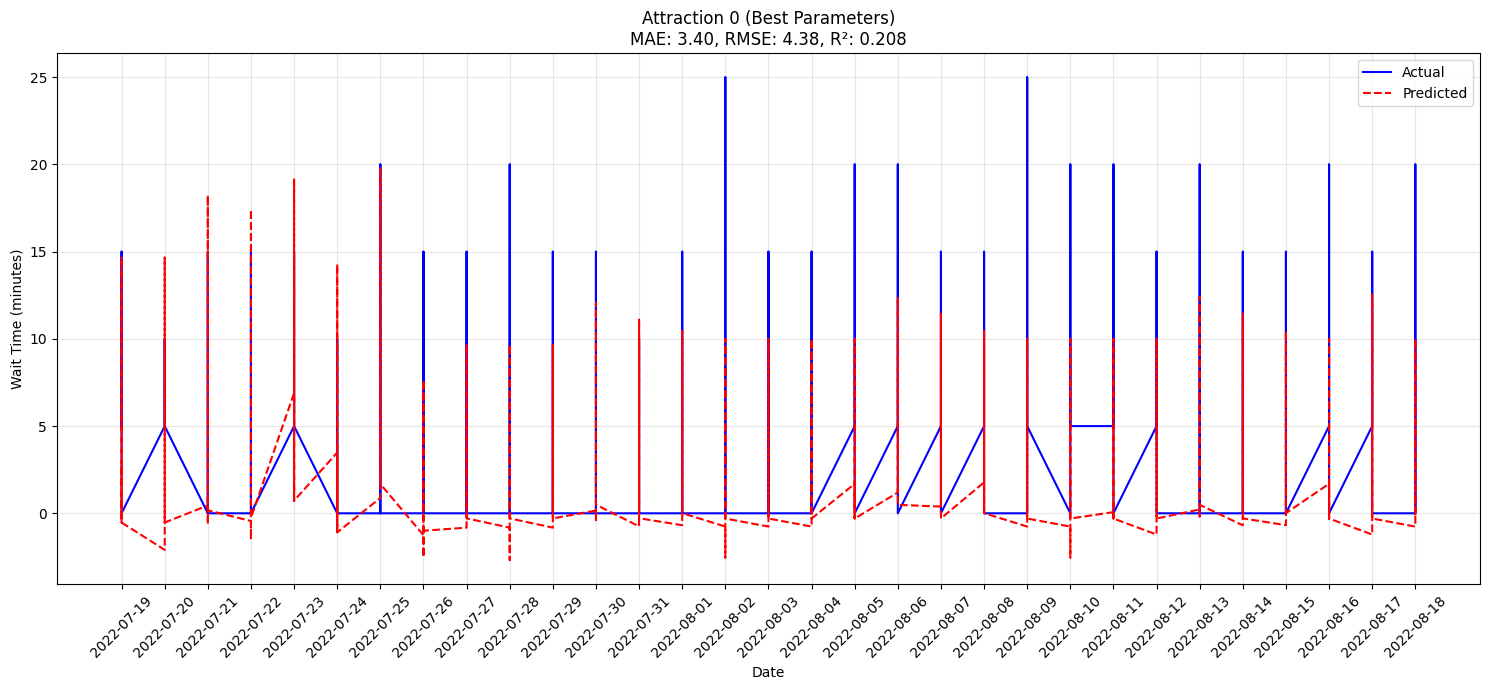

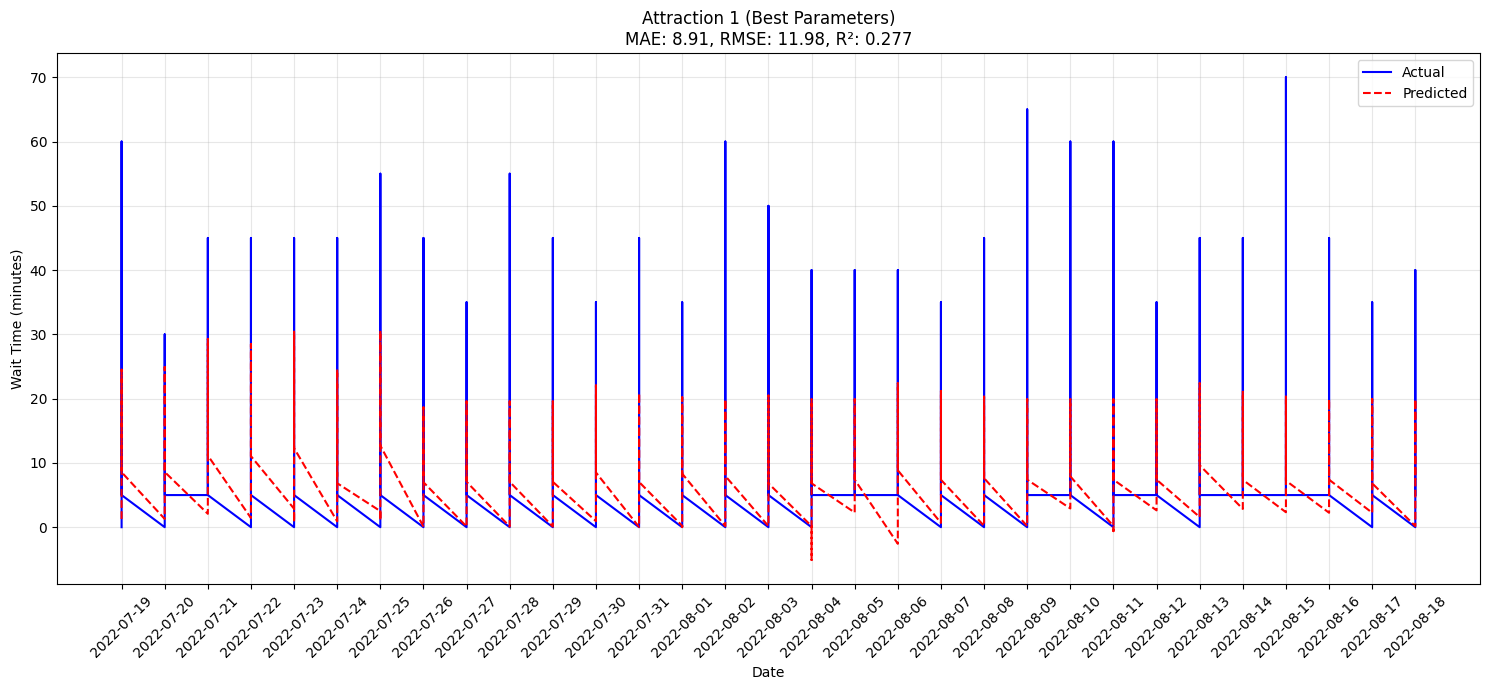

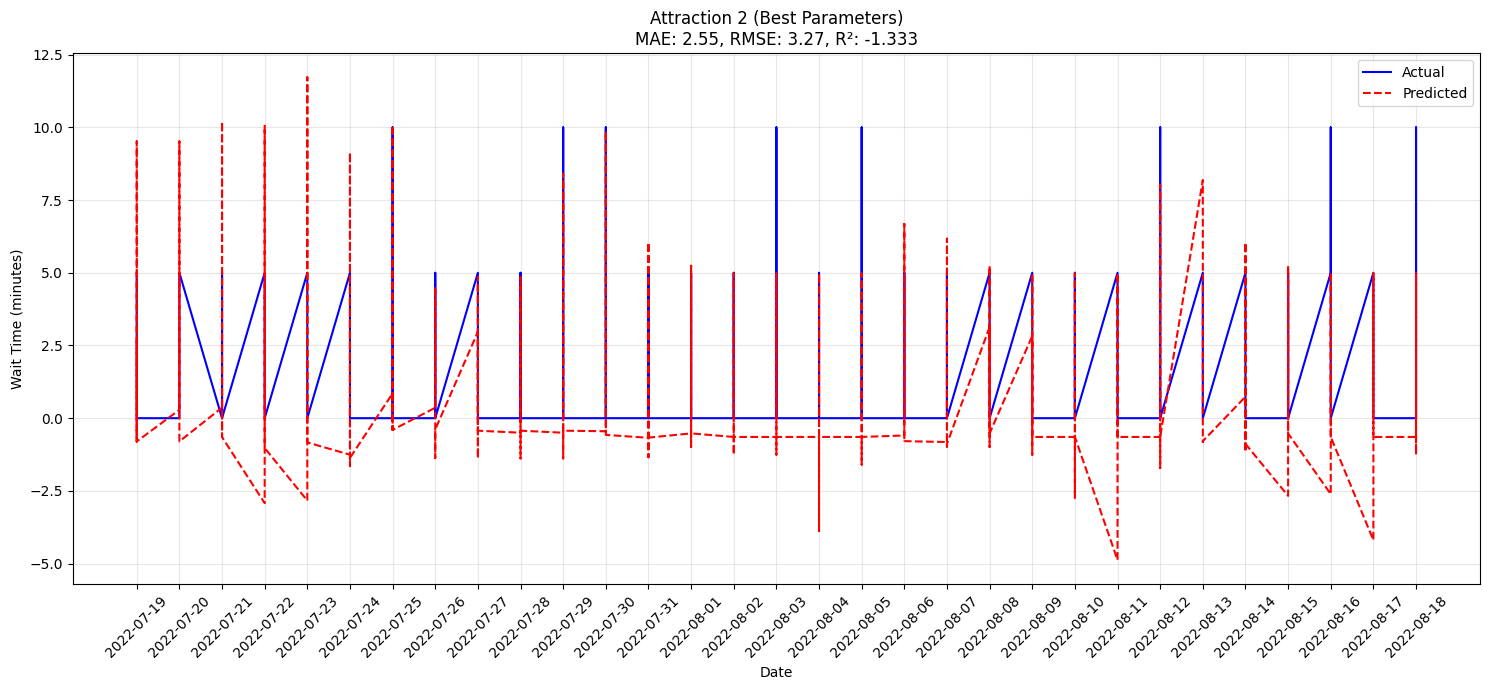

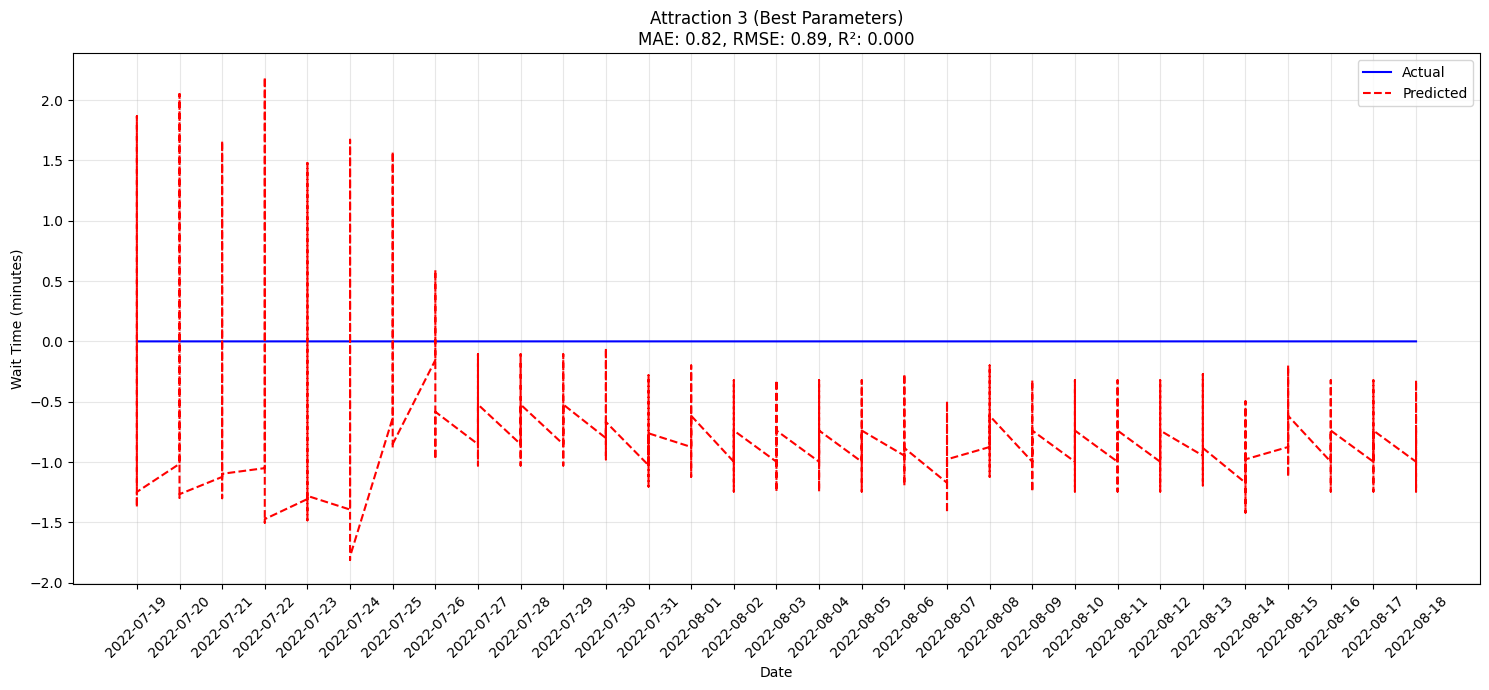

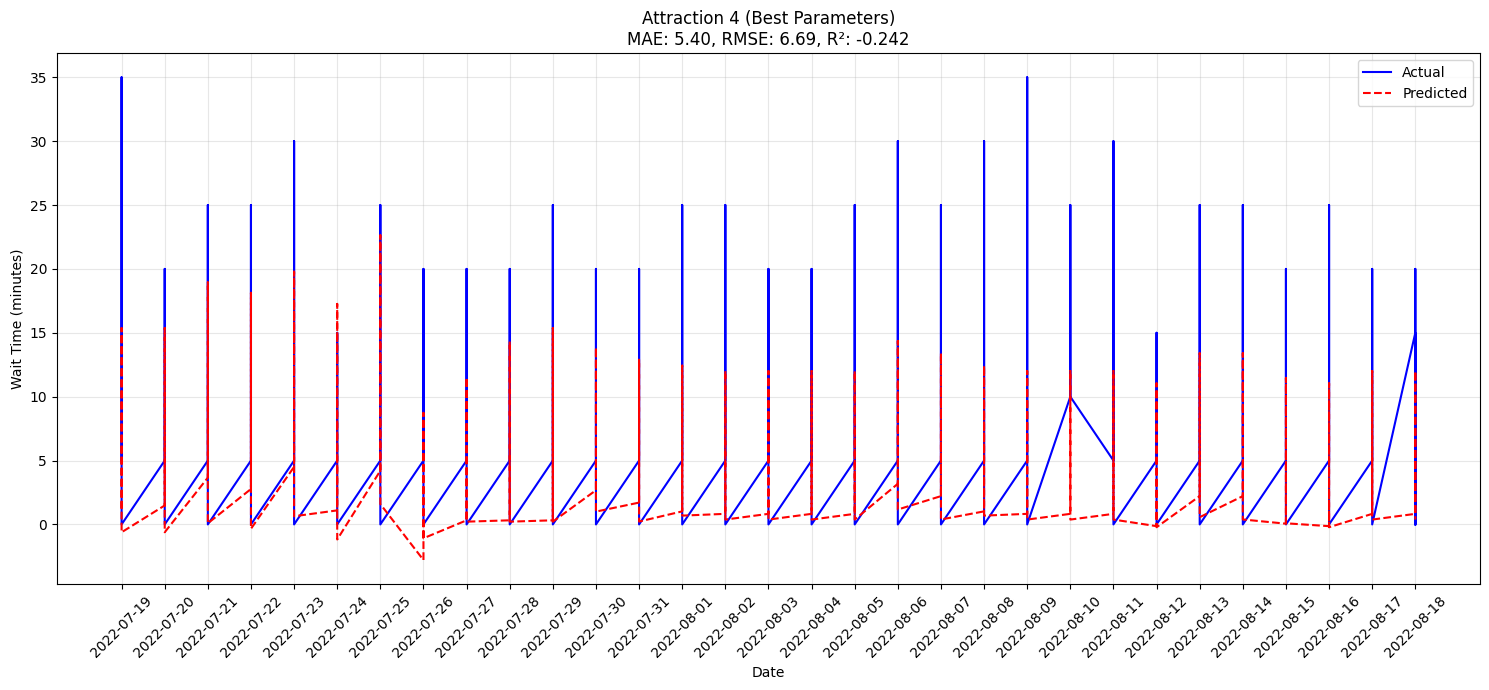

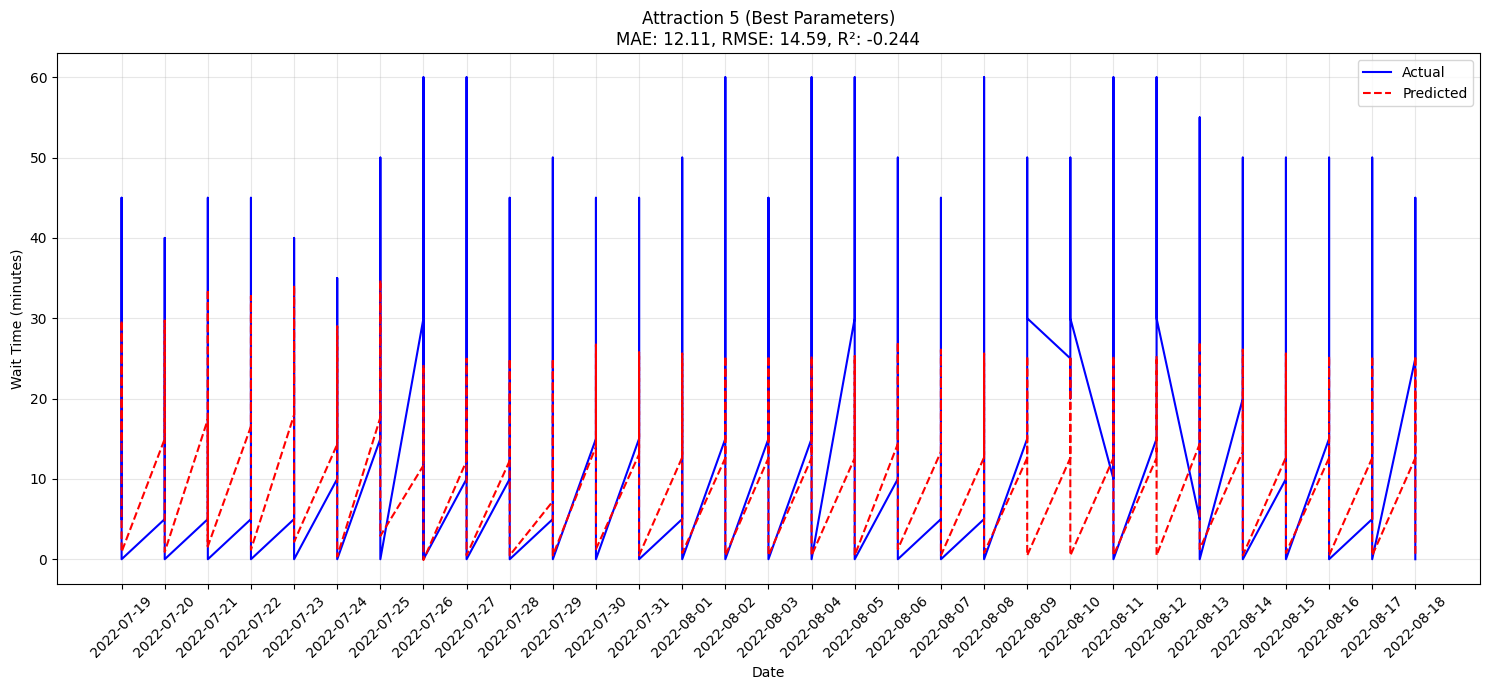

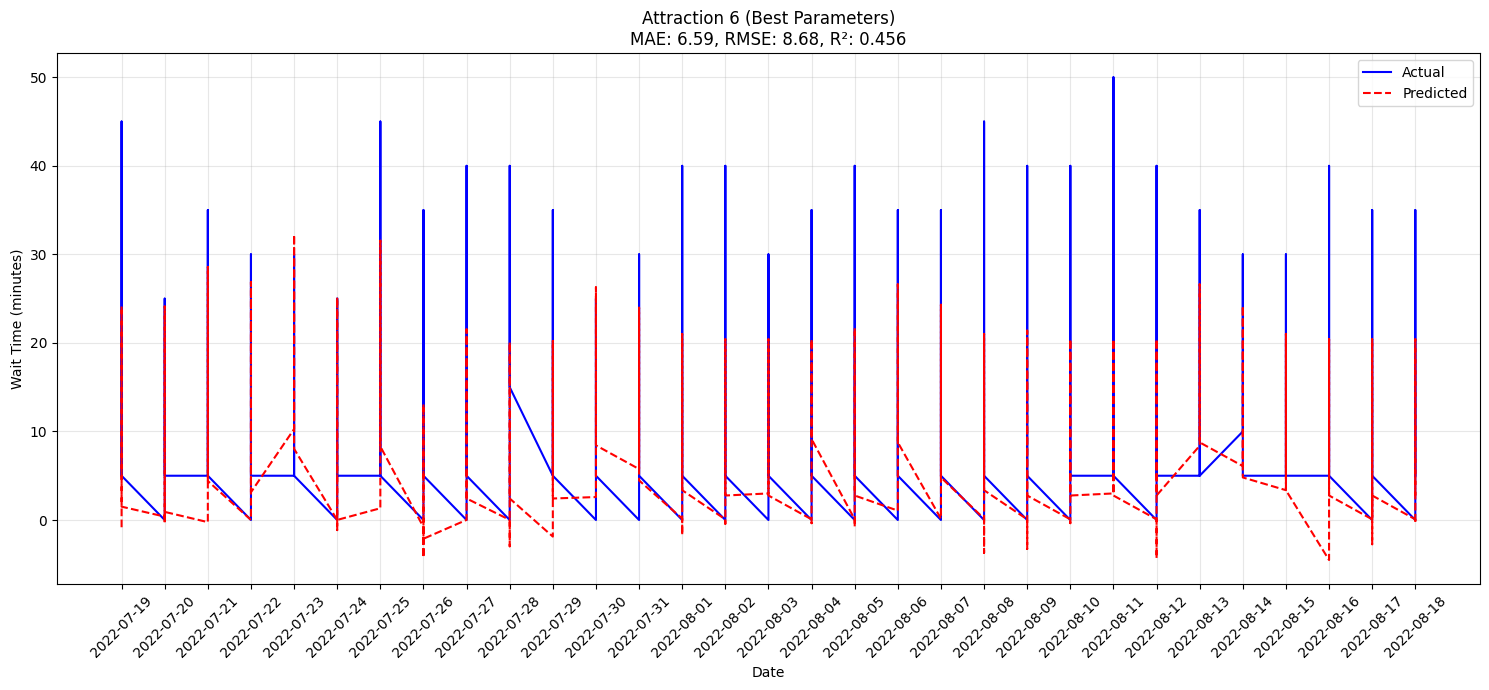

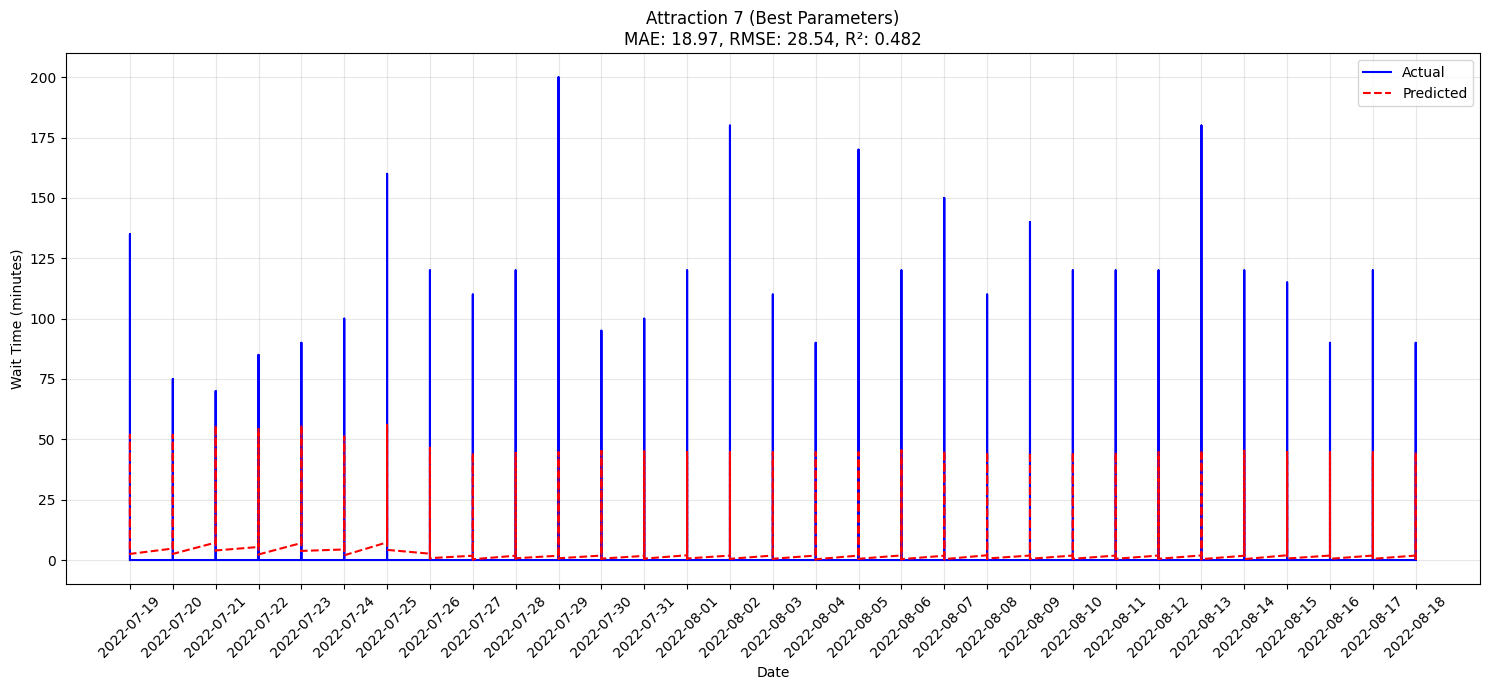

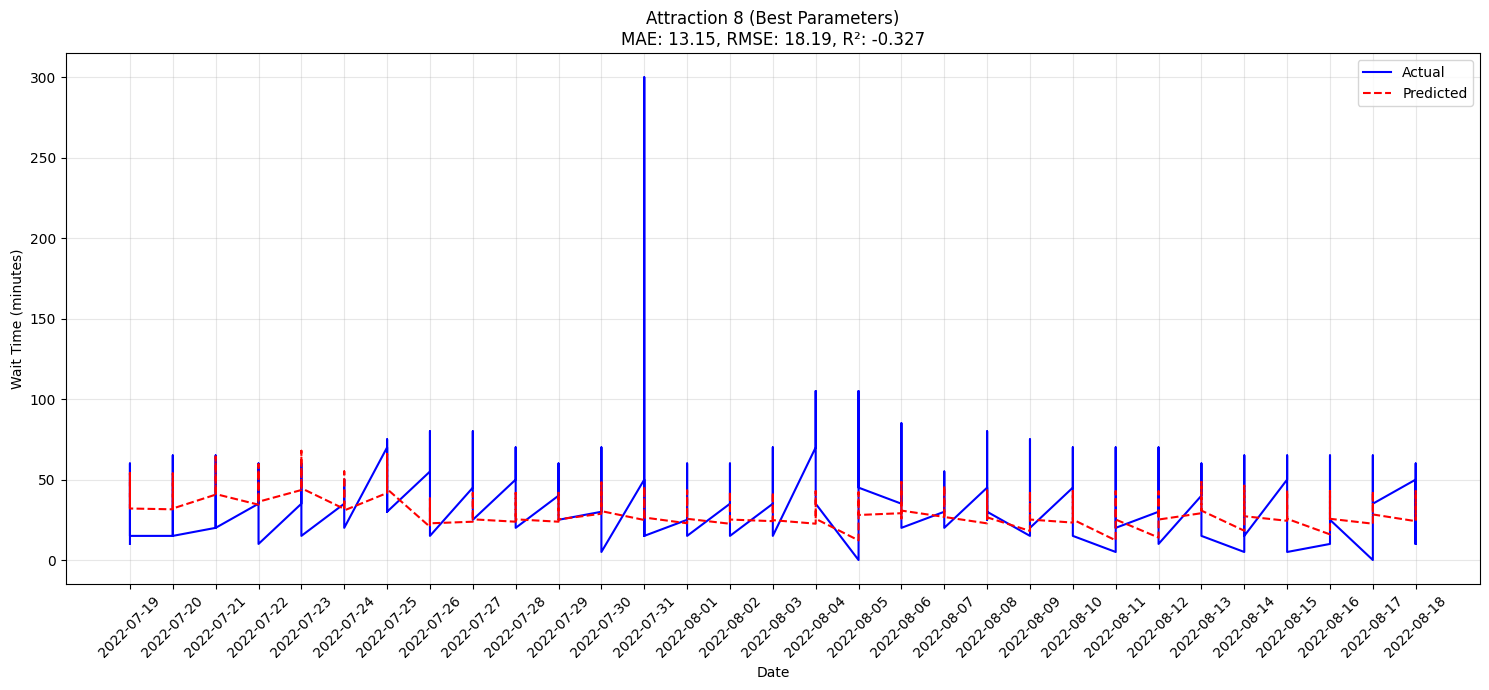

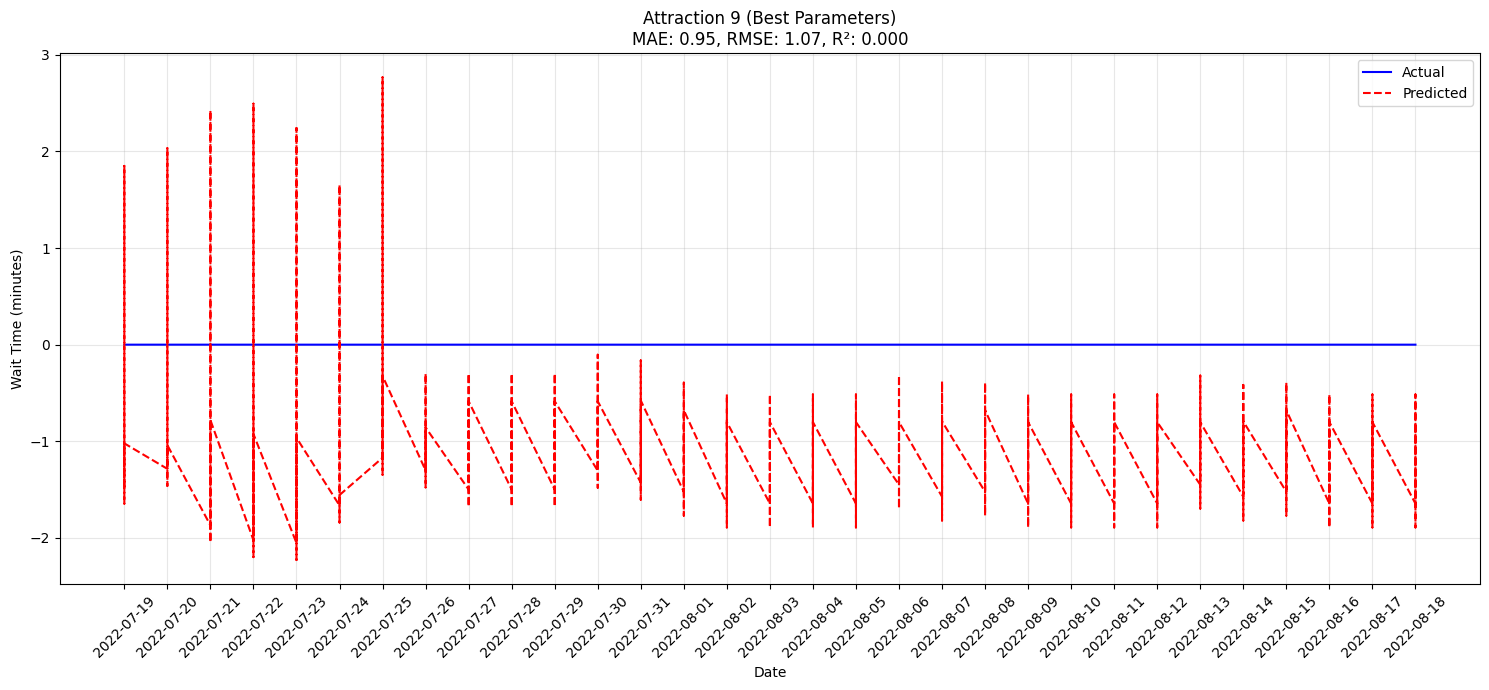

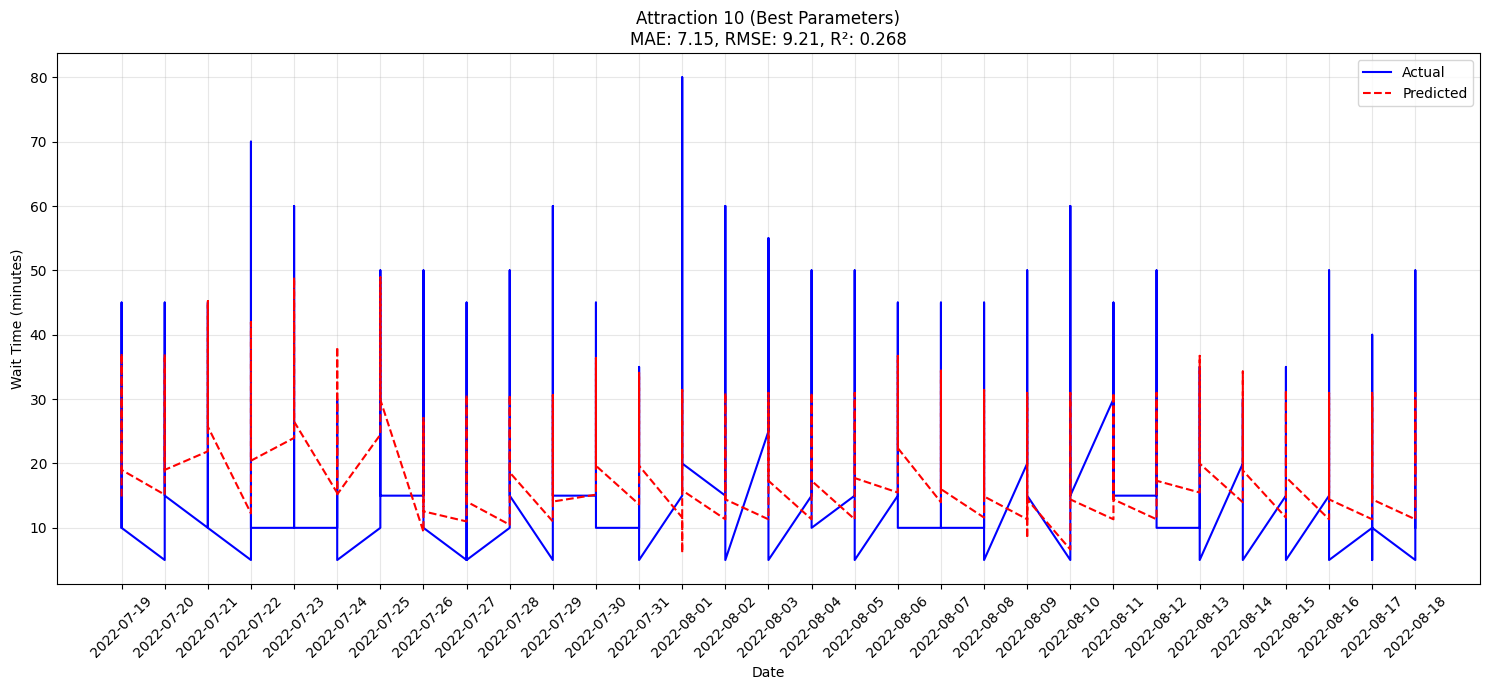

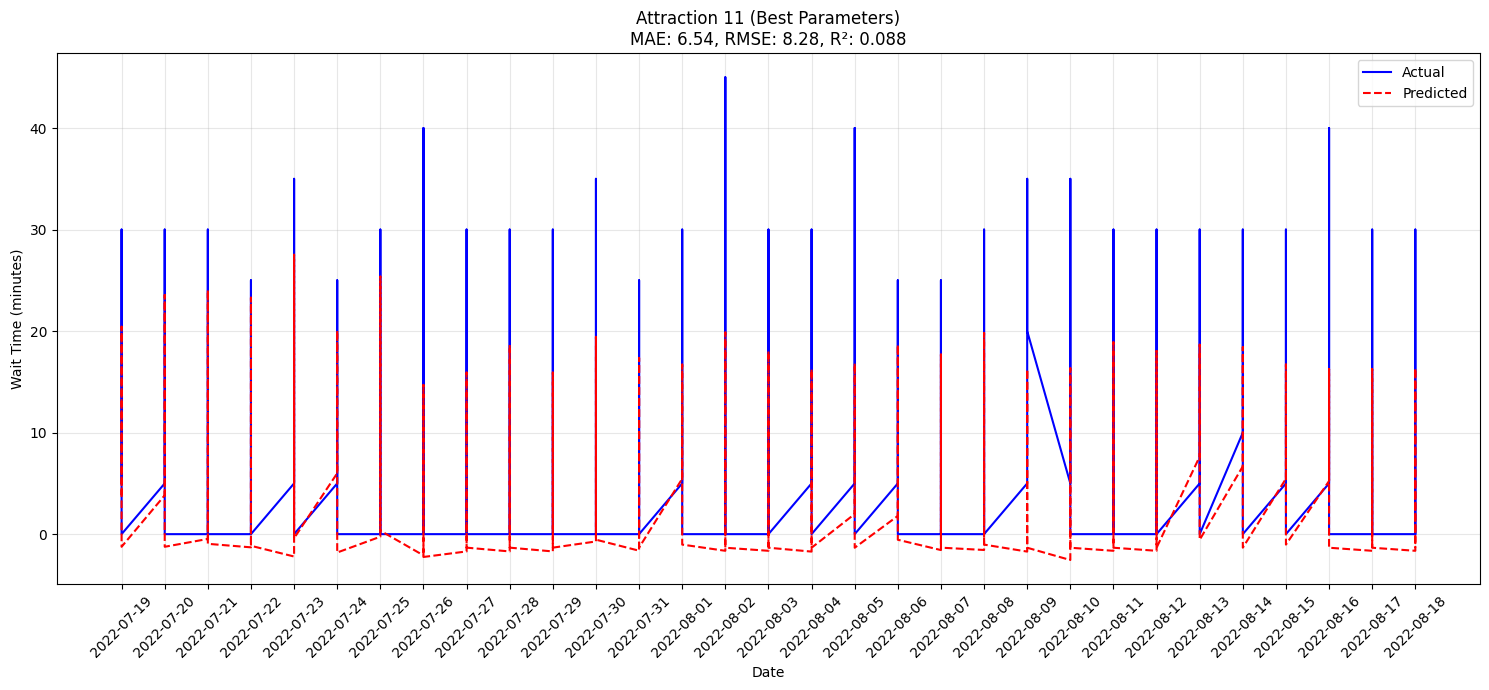

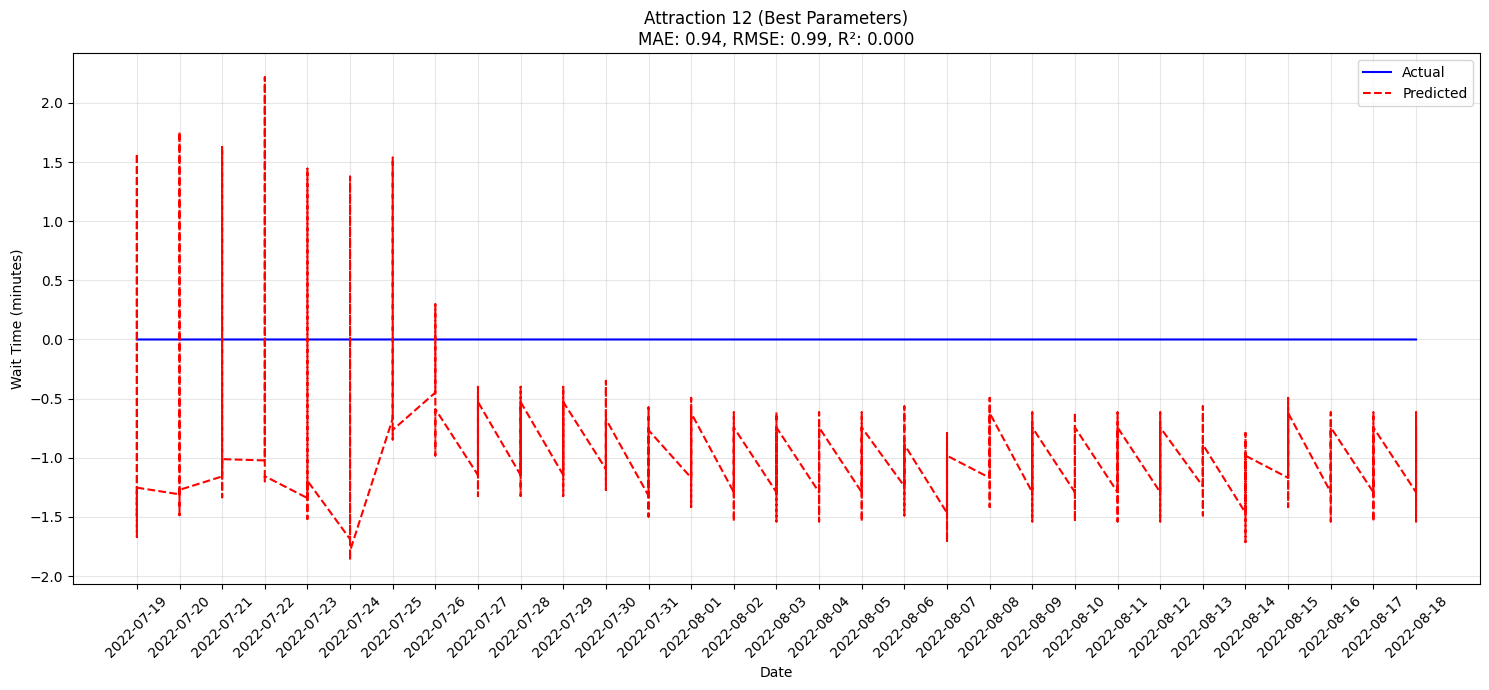

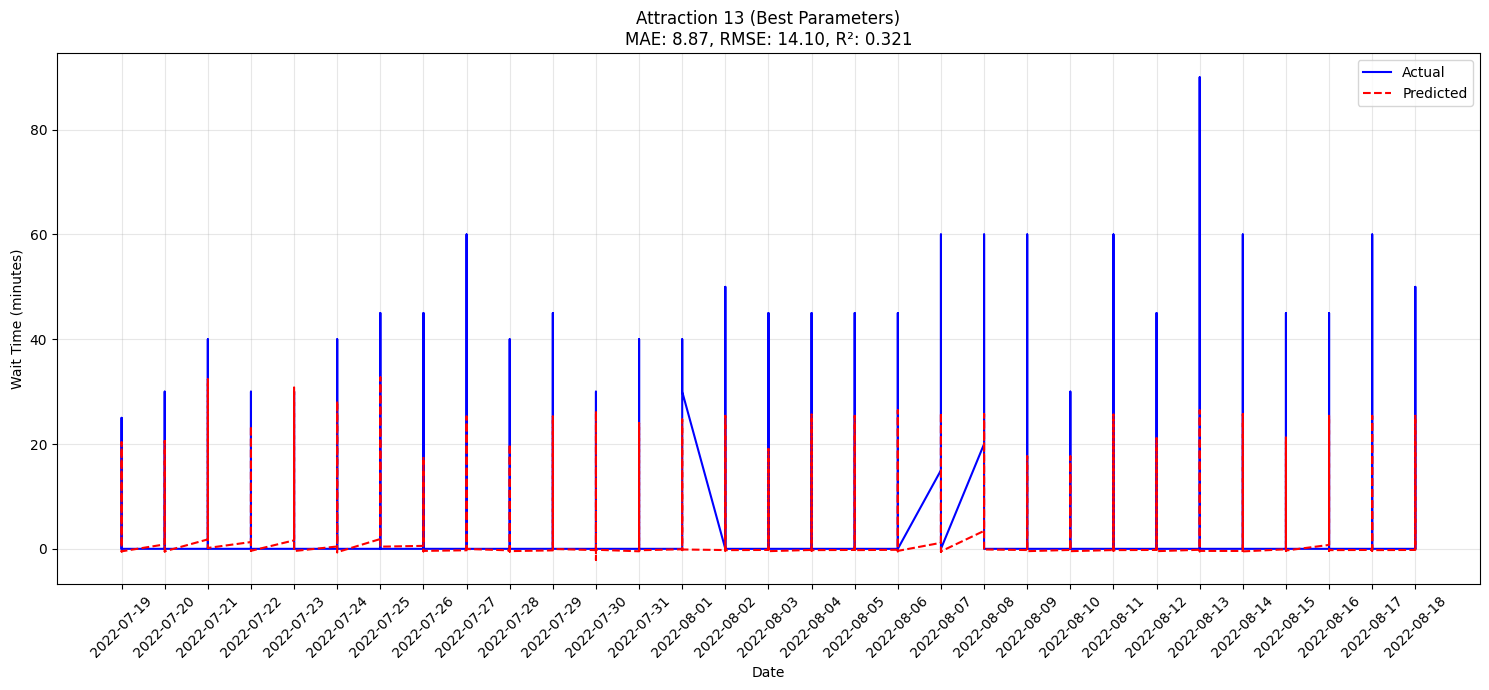

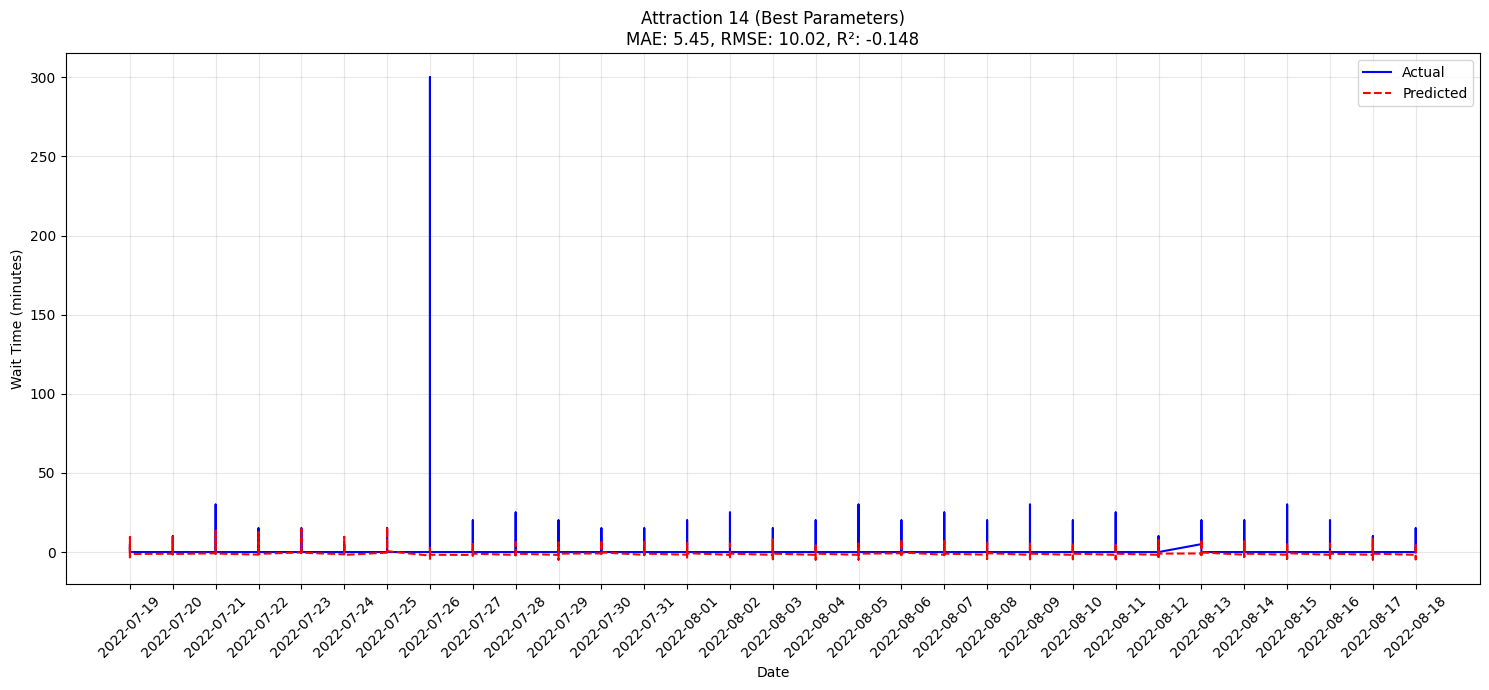

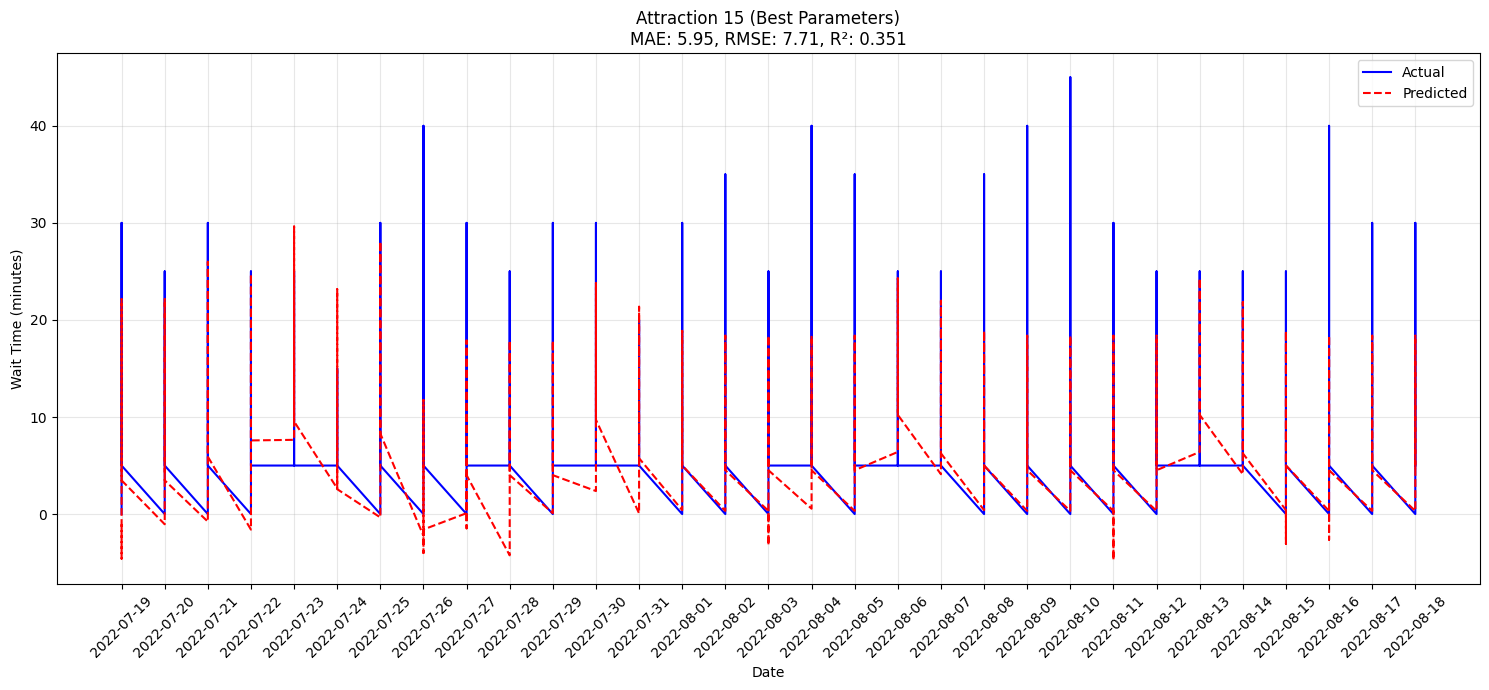

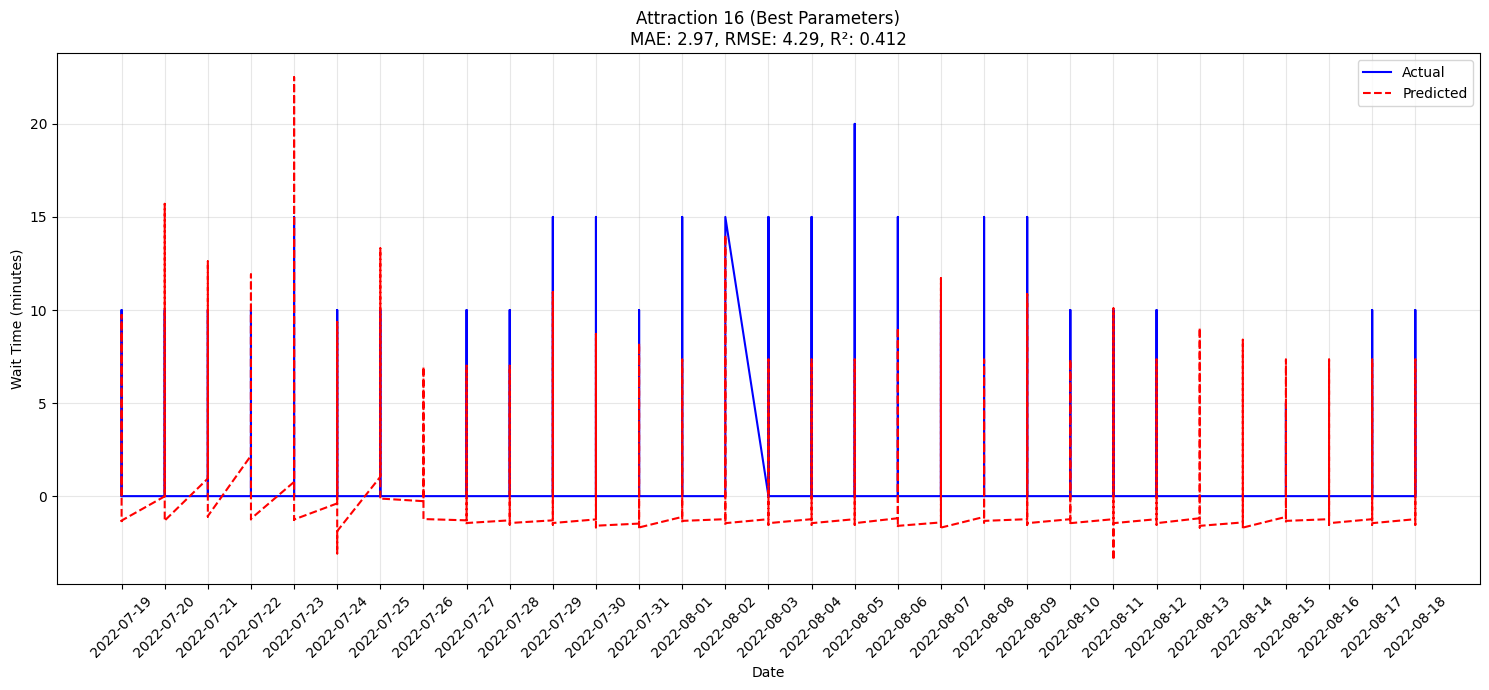

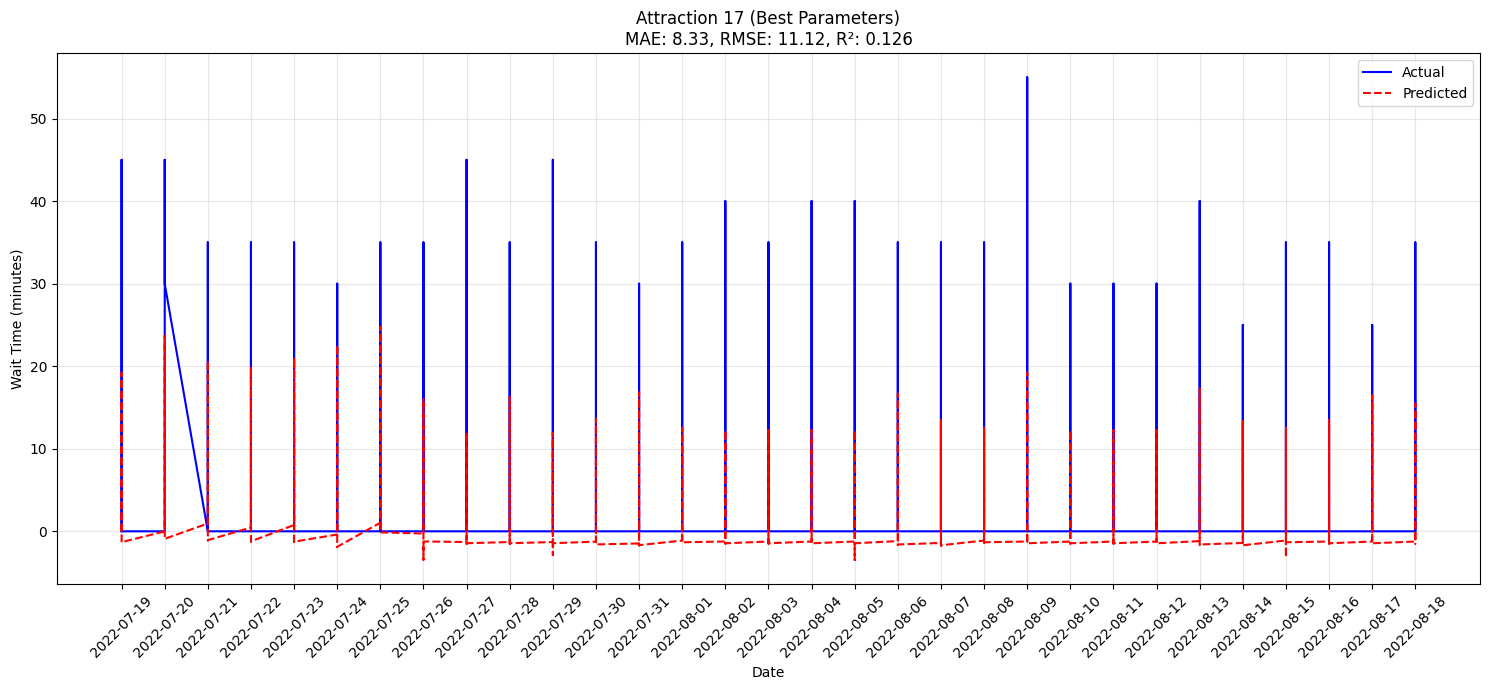

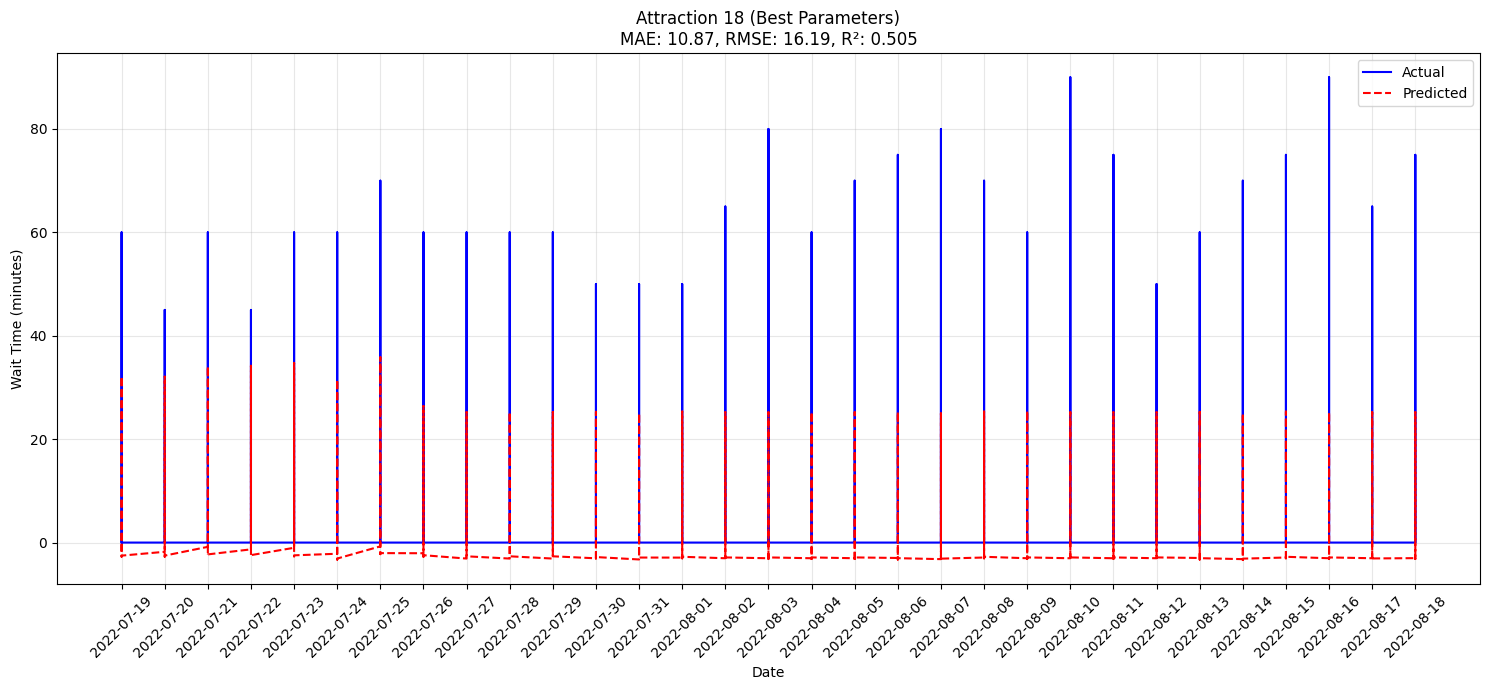

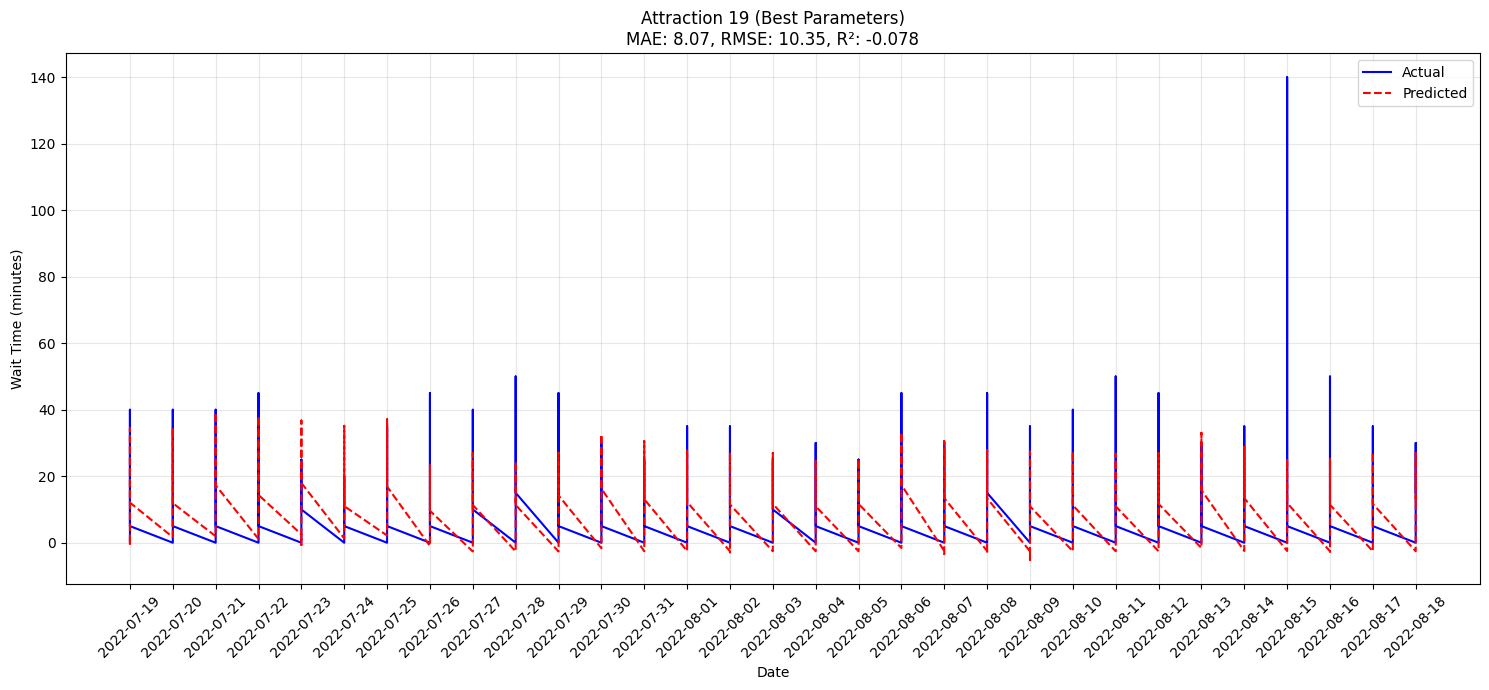

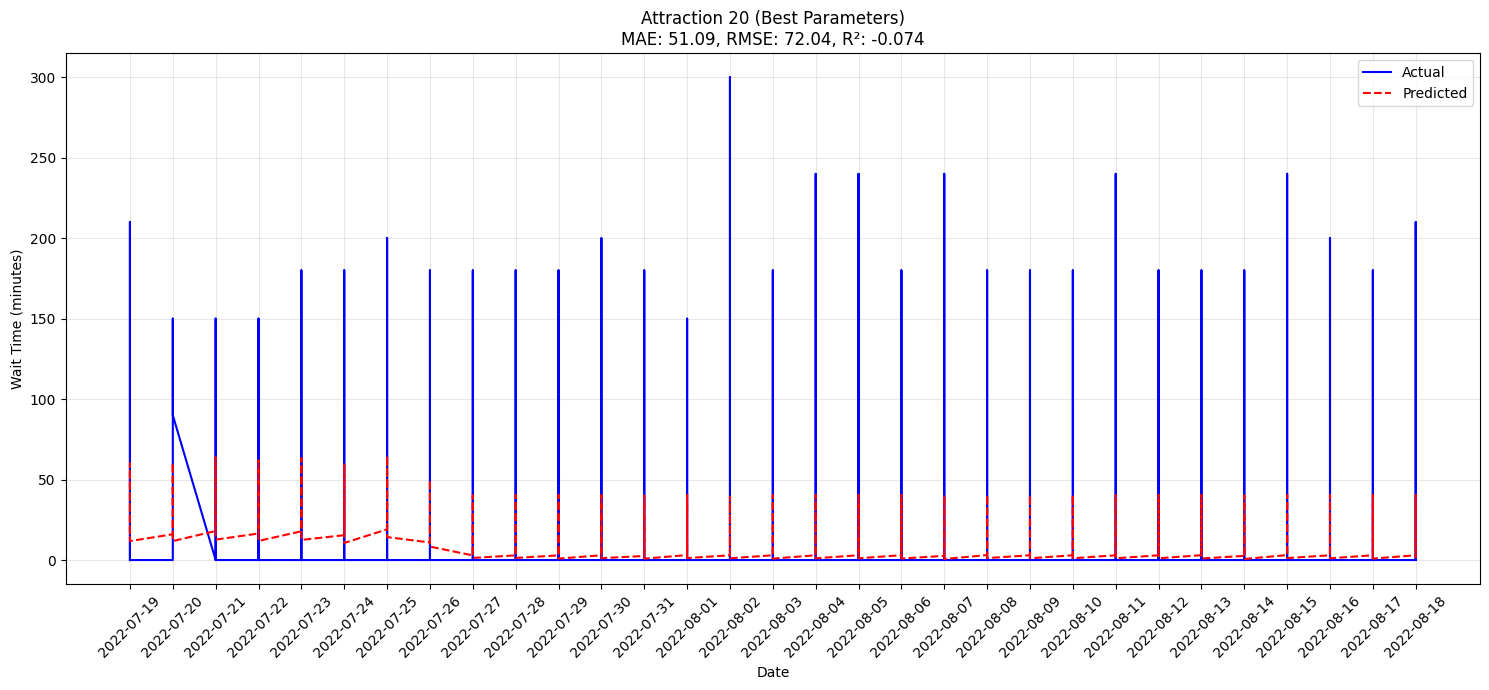

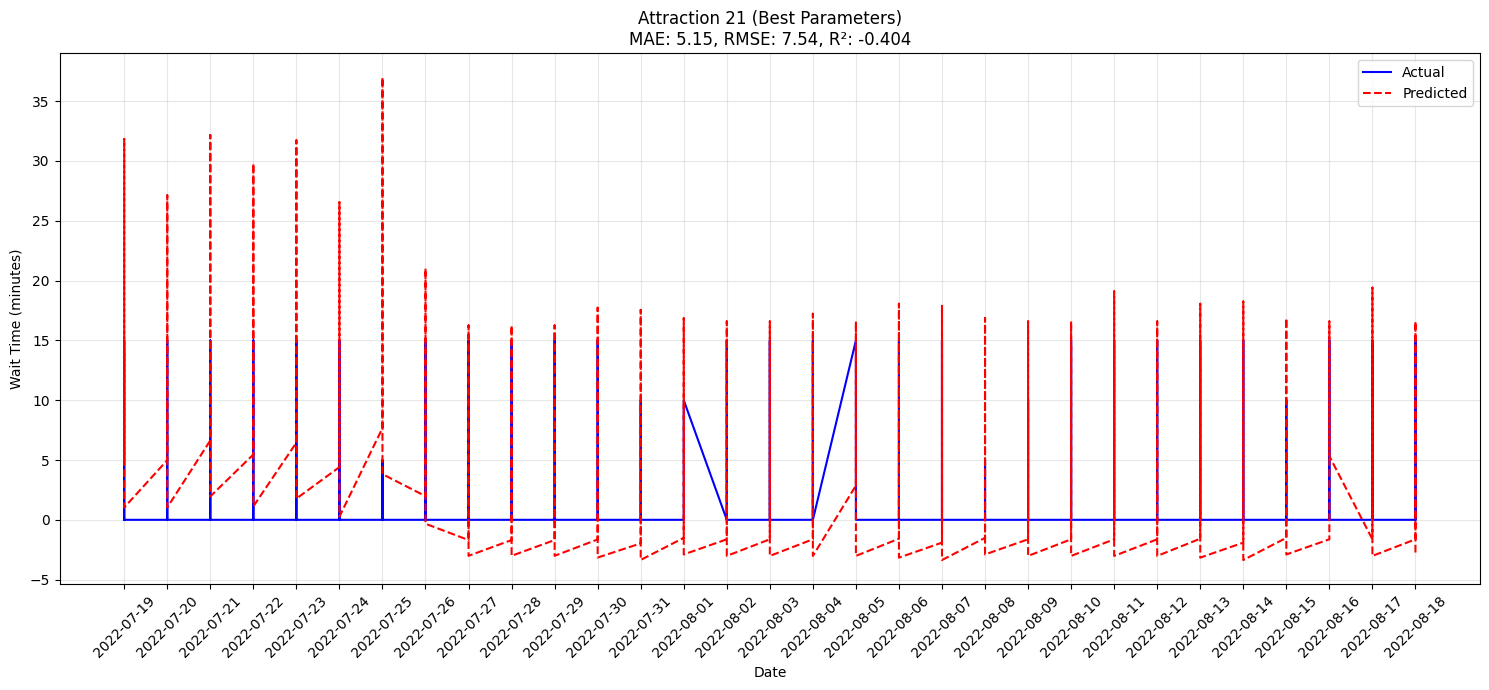

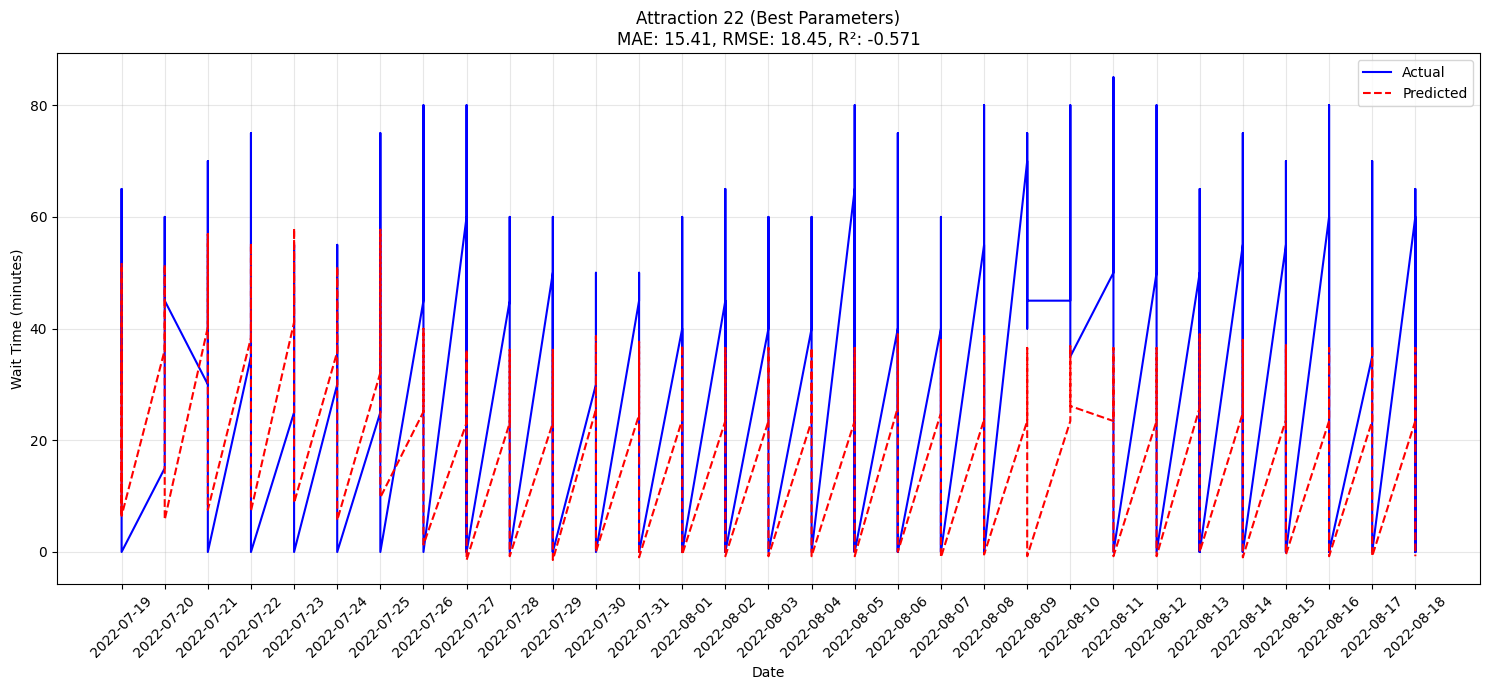

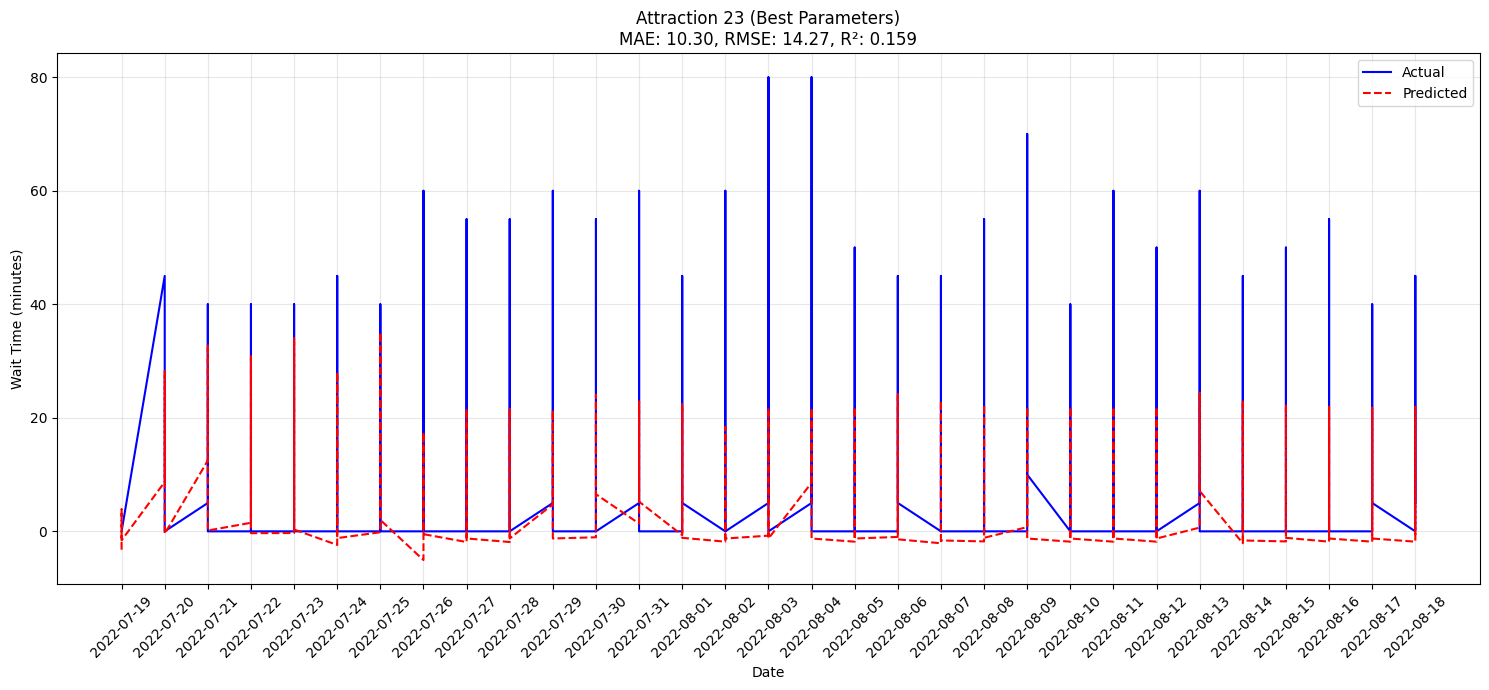

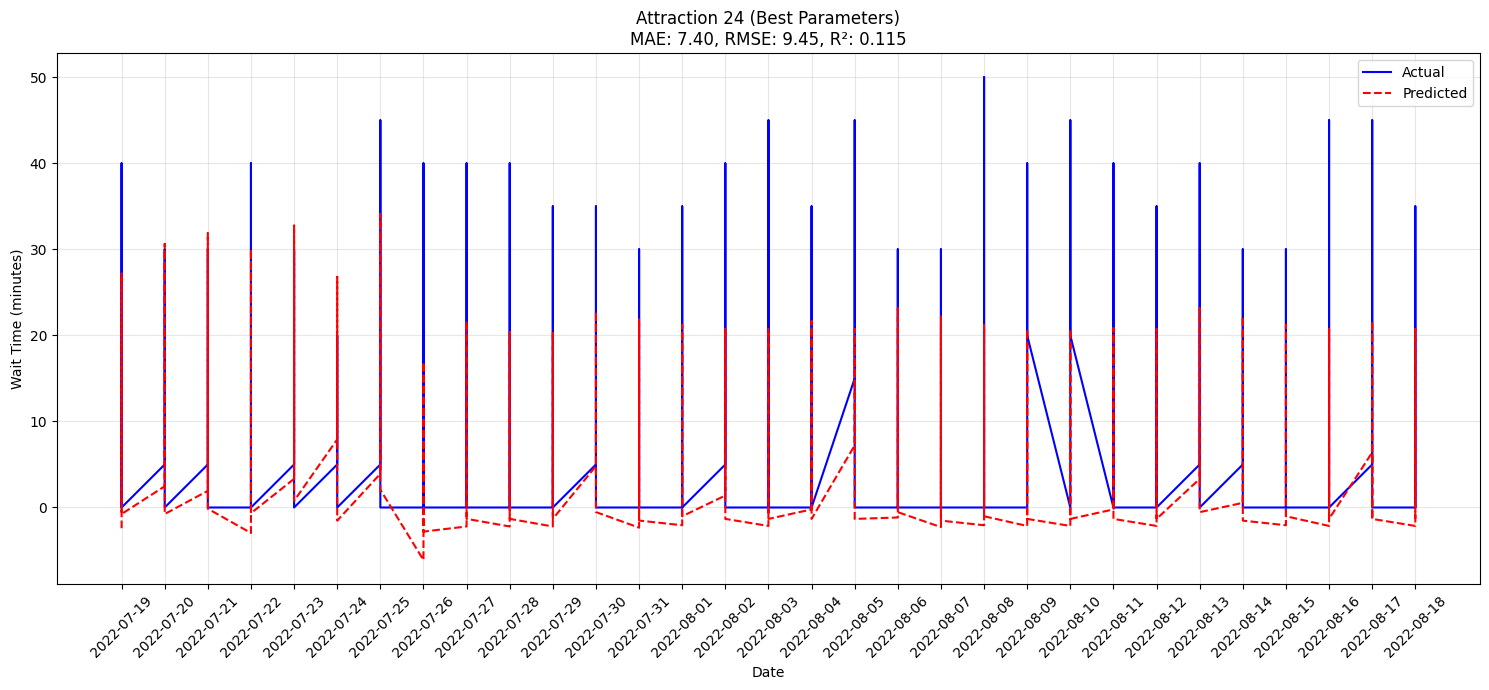

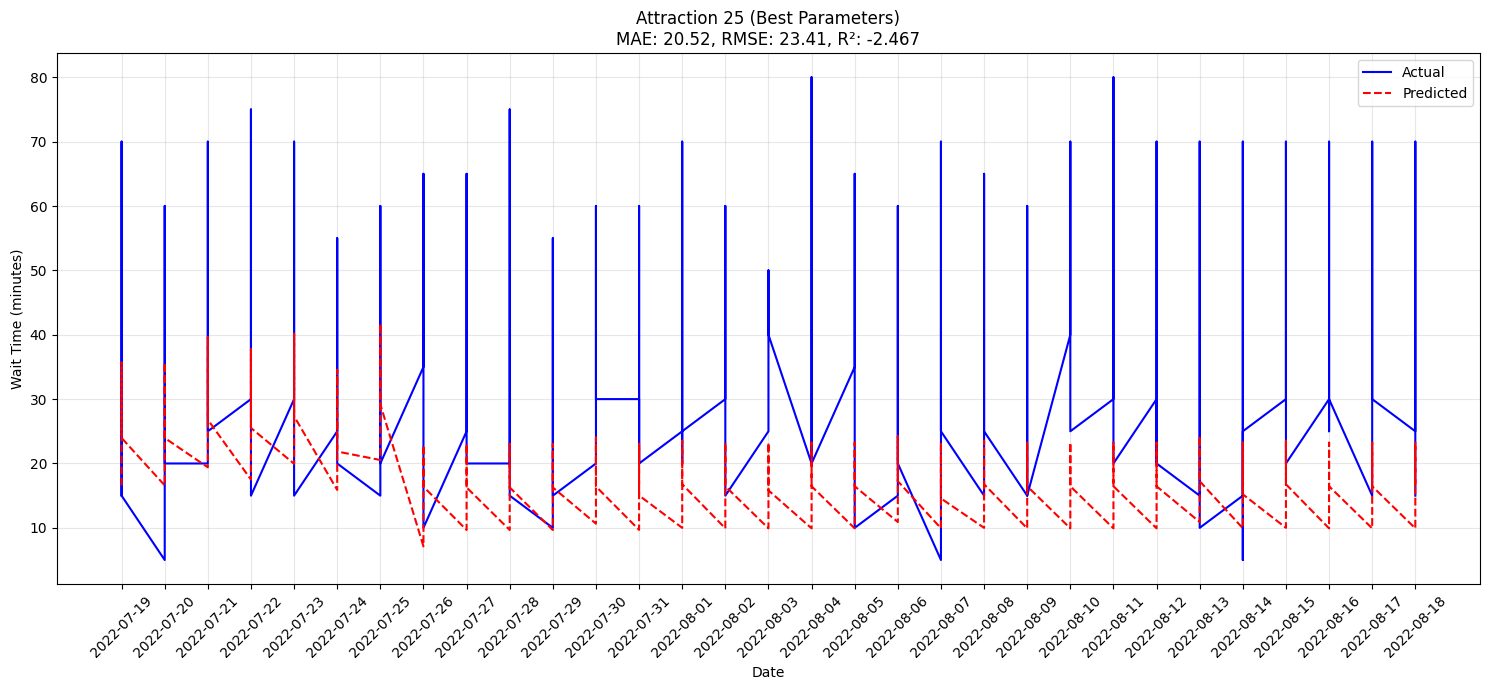

In [ ]:
# Plot for each attraction using the final_predictions
for attraction in df['ENTITY_DESCRIPTION_SHORT'].unique():
    # Filter test data for this attraction
    mask = test['ENTITY_DESCRIPTION_SHORT'] == attraction
    test_attraction = test[mask]
    pred_attraction = final_predictions[mask]
    
    # Create plot
    plt.figure(figsize=(15, 7))
    plt.plot(test_attraction['DATE'], test_attraction['WAIT_TIME_MAX'], 
             label='Actual', color='blue')
    plt.plot(test_attraction['DATE'], pred_attraction, 
             label='Predicted', color='red', linestyle='--')
    
    # Calculate metrics for this attraction
    mae = mean_absolute_error(test_attraction['WAIT_TIME_MAX'], pred_attraction)
    rmse = np.sqrt(mean_squared_error(test_attraction['WAIT_TIME_MAX'], pred_attraction))
    r2 = r2_score(test_attraction['WAIT_TIME_MAX'], pred_attraction)
    
    plt.title(f'Attraction {attraction} (Best Parameters)\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}')
    plt.xlabel('Date')
    plt.ylabel('Wait Time (minutes)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Prophet ? 

In [ ]:
train.isna().sum()

DATE                             0
DEB_TIME                         0
DEB_TIME_HOUR                    0
FIN_TIME                         0
ENTITY_DESCRIPTION_SHORT         0
WAIT_TIME_MAX                    0
NB_UNITS                         0
GUEST_CARRIED                    0
CAPACITY                         0
ADJUST_CAPACITY                  0
OPEN_TIME                        0
UP_TIME                          0
DOWNTIME                         0
NB_MAX_UNIT                      0
REF_CLOSING_DESCRIPTION     924032
PARK_ATTENDANCE                  0
NIGHT_SHOW                  170510
PARADE_1                    170510
PARADE_2                    778470
temp                        783373
humidity                    783373
wind_speed                  783373
is_holiday                       0
dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
import pandas as pd
import numpy as np
import logging

# Suppress cmdstanpy log messages
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


# Step 1: Create a custom Prophet wrapper for GridSearchCV
class ProphetWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, changepoint_prior_scale=0.05, seasonality_prior_scale=10.0,
                 holidays_prior_scale=10.0, daily_seasonality=True, yearly_seasonality=True,
                 weekly_seasonality=True):
        self.changepoint_prior_scale = changepoint_prior_scale
        self.seasonality_prior_scale = seasonality_prior_scale
        self.holidays_prior_scale = holidays_prior_scale
        self.daily_seasonality = daily_seasonality
        self.yearly_seasonality = yearly_seasonality
        self.weekly_seasonality = weekly_seasonality

    def fit(self, X, y):
        # Prophet expects 'ds' and 'y' columns, where 'ds' is the date column and 'y' is the target
        df = X.copy()
        df['y'] = y
        self.model = Prophet(
            changepoint_prior_scale=self.changepoint_prior_scale,
            seasonality_prior_scale=self.seasonality_prior_scale,
            holidays_prior_scale=self.holidays_prior_scale,
            daily_seasonality=self.daily_seasonality,
            yearly_seasonality=self.yearly_seasonality,
            weekly_seasonality=self.weekly_seasonality,
            stan_backend='CMDSTANPY'
        )
        
        # Add regressors if necessary
        for col in ['attendance', 'is_holiday_encoded', 'guest_carried', 
                    'deb_time_hour', 'open_time', 'up_time', 'downtime']:
            self.model.add_regressor(col)
        
        # Fit the model
        self.model.fit(df)
        return self

    def predict(self, X):
        # Prophet expects 'ds' column as input for prediction
        df = X.copy()
        forecast = self.model.predict(df)
        return forecast['yhat']

# Step 2: Prepare data for GridSearchCV
predictions_by_attraction = {}

for attraction in df['ENTITY_DESCRIPTION_SHORT'].unique():
    # Filter data for this attraction
    attraction_df = df[df['ENTITY_DESCRIPTION_SHORT'] == attraction].copy()
    
    # Prepare Prophet dataframe for this attraction
    prophet_df = pd.DataFrame({
        'ds': pd.to_datetime(attraction_df['DATE']),
        'y': attraction_df['WAIT_TIME_MAX'],
        'attendance': attraction_df['PARK_ATTENDANCE'],
        'is_holiday_encoded': le_holiday.fit_transform(attraction_df['is_holiday']),
        'guest_carried': attraction_df['GUEST_CARRIED'],
        'deb_time_hour': attraction_df['DEB_TIME_HOUR'],
        'open_time': attraction_df['OPEN_TIME'],
        'up_time': attraction_df['UP_TIME'],
        'downtime': attraction_df['DOWNTIME']
    })
    
    # Split into train/test
    train_df = prophet_df[prophet_df['ds'] <= '2022-07-19']
    test_df = prophet_df[prophet_df['ds'] > '2022-07-19']
    
    # Step 3: Grid search setup
    param_grid = {
        'changepoint_prior_scale': [0.05],
        'seasonality_prior_scale': [10.0],
        'daily_seasonality': [True, False],
        'yearly_seasonality': [True, False],
        'weekly_seasonality': [True, False]
    }

    model = ProphetWrapper()

    # Use verbose=3 to print progress during training
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, n_jobs=-1)
    
    # Step 4: Fit the model using grid search
    X_train = train_df.drop('y', axis=1)
    y_train = train_df['y']
    
    grid_search.fit(X_train, y_train)

    # You can also access the results in `cv_results_`
    results = grid_search.cv_results_
    
    # Print out the combination of parameters tested so far
    for i, params in enumerate(results['params']):
        print(f"Tested combination {i + 1} / {len(results['params'])}: {params}")

    best_model = grid_search.best_estimator_

    # Step 5: Make predictions with the best model
    test_predictions = best_model.predict(test_df.drop('y', axis=1))
    
    # Store predictions and calculate metrics
    predictions_by_attraction[attraction] = {
        'test_df': test_df,
        'predictions': test_predictions,
        'best_params': grid_search.best_params_
    }


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
23:07:41 - cmdstanpy - INFO - Chain [1] start processing
23:07:42 - cmdstanpy - INFO - Chain [1] start processing
23:07:42 - cmdstanpy - INFO - Chain [1] start processing
23:07:42 - cmdstanpy - INFO - Chain [1] start processing
23:07:43 - cmdstanpy - INFO - Chain [1] start processing
23:07:43 - cmdstanpy - INFO - Chain [1] start processing
23:07:44 - cmdstanpy - INFO - Chain [1] start processing
23:07:44 - cmdstanpy - INFO - Chain [1] start processing
23:08:03 - cmdstanpy - INFO - Chain [1] done processing
23:08:03 - cmdstanpy - I

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:09:28 - cmdstanpy - INFO - Chain [1] start processing
23:09:28 - cmdstanpy - INFO - Chain [1] start processing
23:09:29 - cmdstanpy - INFO - Chain [1] start processing
23:09:29 - cmdstanpy - INFO - Chain [1] start processing
23:09:30 - cmdstanpy - INFO - Chain [1] start processing
23:09:30 - cmdstanpy - INFO - Chain [1] start processing
23:09:30 - cmdstanpy - INFO - Chain [1] start processing
23:09:31 - cmdstanpy - INFO - Chain [1] start processing
23:09:40 - cmdstanpy - INFO - Chain [1] done processing
23:09:41 - cmdstanpy - INFO - Chain [1] done processing
23:09:56 - cmdstanpy - INFO - Chain [1] done processing
23:09:58 - cmdstanpy - INFO - Chain [1] start processing
23:09:58 - cmdstanpy - INFO - Chain [1] done processing
23:09:58 - cmdstanpy - INFO - Chain [1] start processing
23:10:05 - cmdstanpy - INFO - Chain [1] done processing
23:10:06 - cmdstanpy - INFO - Chain [1] done processing
23:10:07 - cmdstanpy - INFO - Chain [1] start processing
23:10:09 - cmdstanpy - INFO - Chain [

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:11:16 - cmdstanpy - INFO - Chain [1] start processing
23:11:17 - cmdstanpy - INFO - Chain [1] start processing
23:11:17 - cmdstanpy - INFO - Chain [1] start processing
23:11:17 - cmdstanpy - INFO - Chain [1] start processing
23:11:18 - cmdstanpy - INFO - Chain [1] start processing
23:11:19 - cmdstanpy - INFO - Chain [1] start processing
23:11:19 - cmdstanpy - INFO - Chain [1] start processing
23:11:19 - cmdstanpy - INFO - Chain [1] start processing
23:11:24 - cmdstanpy - INFO - Chain [1] done processing
23:11:27 - cmdstanpy - INFO - Chain [1] done processing
23:11:36 - cmdstanpy - INFO - Chain [1] done processing
23:11:38 - cmdstanpy - INFO - Chain [1] done processing
23:11:40 - cmdstanpy - INFO - Chain [1] done processing
23:11:40 - cmdstanpy - INFO - Chain [1] done processing
23:11:43 - cmdstanpy - INFO - Chain [1] start processing
23:11:46 - cmdstanpy - INFO - Chain [1] done processing
23:11:48 - cmdstanpy - INFO - Chain [1] start processing
23:11:51 - cmdstanpy - INFO - Chain [1

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:12:44 - cmdstanpy - INFO - Chain [1] start processing
23:12:44 - cmdstanpy - INFO - Chain [1] start processing
23:12:44 - cmdstanpy - INFO - Chain [1] start processing
23:12:44 - cmdstanpy - INFO - Chain [1] start processing
23:12:46 - cmdstanpy - INFO - Chain [1] start processing
23:12:46 - cmdstanpy - INFO - Chain [1] start processing
23:12:46 - cmdstanpy - INFO - Chain [1] start processing
23:12:46 - cmdstanpy - INFO - Chain [1] start processing
23:13:05 - cmdstanpy - INFO - Chain [1] done processing
23:13:08 - cmdstanpy - INFO - Chain [1] done processing
23:13:17 - cmdstanpy - INFO - Chain [1] done processing
23:13:19 - cmdstanpy - INFO - Chain [1] start processing
23:13:22 - cmdstanpy - INFO - Chain [1] start processing
23:13:33 - cmdstanpy - INFO - Chain [1] start processing
23:13:34 - cmdstanpy - INFO - Chain [1] done processing
23:13:35 - cmdstanpy - INFO - Chain [1] done processing
23:13:37 - cmdstanpy - INFO - Chain [1] done processing
23:13:41 - cmdstanpy - INFO - Chain [

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:14:49 - cmdstanpy - INFO - Chain [1] start processing
23:14:49 - cmdstanpy - INFO - Chain [1] start processing
23:14:50 - cmdstanpy - INFO - Chain [1] start processing
23:14:50 - cmdstanpy - INFO - Chain [1] start processing
23:14:51 - cmdstanpy - INFO - Chain [1] start processing
23:14:51 - cmdstanpy - INFO - Chain [1] start processing
23:14:51 - cmdstanpy - INFO - Chain [1] start processing
23:14:51 - cmdstanpy - INFO - Chain [1] start processing
23:15:03 - cmdstanpy - INFO - Chain [1] done processing
23:15:04 - cmdstanpy - INFO - Chain [1] done processing
23:15:11 - cmdstanpy - INFO - Chain [1] done processing
23:15:14 - cmdstanpy - INFO - Chain [1] done processing
23:15:15 - cmdstanpy - INFO - Chain [1] done processing
23:15:17 - cmdstanpy - INFO - Chain [1] done processing
23:15:17 - cmdstanpy - INFO - Chain [1] done processing
23:15:18 - cmdstanpy - INFO - Chain [1] done processing
23:15:26 - cmdstanpy - INFO - Chain [1] start processing
23:15:27 - cmdstanpy - INFO - Chain [1]

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:16:27 - cmdstanpy - INFO - Chain [1] start processing
23:16:27 - cmdstanpy - INFO - Chain [1] start processing
23:16:27 - cmdstanpy - INFO - Chain [1] start processing
23:16:27 - cmdstanpy - INFO - Chain [1] start processing
23:16:28 - cmdstanpy - INFO - Chain [1] start processing
23:16:28 - cmdstanpy - INFO - Chain [1] start processing
23:16:29 - cmdstanpy - INFO - Chain [1] start processing
23:16:29 - cmdstanpy - INFO - Chain [1] start processing
23:16:34 - cmdstanpy - INFO - Chain [1] done processing
23:16:35 - cmdstanpy - INFO - Chain [1] done processing
23:16:38 - cmdstanpy - INFO - Chain [1] done processing
23:16:43 - cmdstanpy - INFO - Chain [1] done processing
23:16:50 - cmdstanpy - INFO - Chain [1] start processing
23:16:51 - cmdstanpy - INFO - Chain [1] start processing
23:16:52 - cmdstanpy - INFO - Chain [1] start processing
23:16:53 - cmdstanpy - INFO - Chain [1] start processing
23:16:58 - cmdstanpy - INFO - Chain [1] done processing
23:16:59 - cmdstanpy - INFO - Chain 

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:18:24 - cmdstanpy - INFO - Chain [1] start processing
23:18:24 - cmdstanpy - INFO - Chain [1] start processing
23:18:25 - cmdstanpy - INFO - Chain [1] start processing
23:18:25 - cmdstanpy - INFO - Chain [1] start processing
23:18:26 - cmdstanpy - INFO - Chain [1] start processing
23:18:26 - cmdstanpy - INFO - Chain [1] start processing
23:18:26 - cmdstanpy - INFO - Chain [1] start processing
23:18:26 - cmdstanpy - INFO - Chain [1] start processing
23:18:35 - cmdstanpy - INFO - Chain [1] done processing
23:18:36 - cmdstanpy - INFO - Chain [1] done processing
23:18:37 - cmdstanpy - INFO - Chain [1] done processing
23:18:46 - cmdstanpy - INFO - Chain [1] done processing
23:18:47 - cmdstanpy - INFO - Chain [1] done processing
23:18:48 - cmdstanpy - INFO - Chain [1] start processing
23:18:49 - cmdstanpy - INFO - Chain [1] start processing
23:18:51 - cmdstanpy - INFO - Chain [1] start processing
23:18:54 - cmdstanpy - INFO - Chain [1] done processing
23:18:56 - cmdstanpy - INFO - Chain [

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:20:02 - cmdstanpy - INFO - Chain [1] start processing
23:20:02 - cmdstanpy - INFO - Chain [1] start processing
23:20:02 - cmdstanpy - INFO - Chain [1] start processing
23:20:02 - cmdstanpy - INFO - Chain [1] start processing
23:20:03 - cmdstanpy - INFO - Chain [1] start processing
23:20:03 - cmdstanpy - INFO - Chain [1] start processing
23:20:04 - cmdstanpy - INFO - Chain [1] start processing
23:20:04 - cmdstanpy - INFO - Chain [1] start processing
23:20:10 - cmdstanpy - INFO - Chain [1] done processing
23:20:11 - cmdstanpy - INFO - Chain [1] done processing
23:20:26 - cmdstanpy - INFO - Chain [1] done processing
23:20:27 - cmdstanpy - INFO - Chain [1] start processing
23:20:27 - cmdstanpy - INFO - Chain [1] done processing
23:20:27 - cmdstanpy - INFO - Chain [1] start processing
23:20:28 - cmdstanpy - INFO - Chain [1] done processing
23:20:28 - cmdstanpy - INFO - Chain [1] done processing
23:20:29 - cmdstanpy - INFO - Chain [1] done processing
23:20:30 - cmdstanpy - INFO - Chain [1

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:21:23 - cmdstanpy - INFO - Chain [1] start processing
23:21:24 - cmdstanpy - INFO - Chain [1] start processing
23:21:24 - cmdstanpy - INFO - Chain [1] start processing
23:21:24 - cmdstanpy - INFO - Chain [1] start processing
23:21:24 - cmdstanpy - INFO - Chain [1] start processing
23:21:25 - cmdstanpy - INFO - Chain [1] start processing
23:21:25 - cmdstanpy - INFO - Chain [1] start processing
23:21:25 - cmdstanpy - INFO - Chain [1] start processing
23:21:37 - cmdstanpy - INFO - Chain [1] done processing
23:21:39 - cmdstanpy - INFO - Chain [1] done processing
23:21:53 - cmdstanpy - INFO - Chain [1] done processing
23:21:56 - cmdstanpy - INFO - Chain [1] start processing
23:21:57 - cmdstanpy - INFO - Chain [1] start processing
23:21:59 - cmdstanpy - INFO - Chain [1] done processing
23:22:05 - cmdstanpy - INFO - Chain [1] start processing
23:22:05 - cmdstanpy - INFO - Chain [1] done processing
23:22:05 - cmdstanpy - INFO - Chain [1] done processing
23:22:09 - cmdstanpy - INFO - Chain [

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:23:16 - cmdstanpy - INFO - Chain [1] start processing
23:23:17 - cmdstanpy - INFO - Chain [1] start processing
23:23:17 - cmdstanpy - INFO - Chain [1] start processing
23:23:17 - cmdstanpy - INFO - Chain [1] start processing
23:23:18 - cmdstanpy - INFO - Chain [1] start processing
23:23:18 - cmdstanpy - INFO - Chain [1] start processing
23:23:18 - cmdstanpy - INFO - Chain [1] start processing
23:23:19 - cmdstanpy - INFO - Chain [1] start processing
23:23:28 - cmdstanpy - INFO - Chain [1] done processing
23:23:31 - cmdstanpy - INFO - Chain [1] done processing
23:23:33 - cmdstanpy - INFO - Chain [1] done processing
23:23:34 - cmdstanpy - INFO - Chain [1] done processing
23:23:37 - cmdstanpy - INFO - Chain [1] done processing
23:23:38 - cmdstanpy - INFO - Chain [1] done processing
23:23:48 - cmdstanpy - INFO - Chain [1] done processing
23:23:50 - cmdstanpy - INFO - Chain [1] start processing
23:23:51 - cmdstanpy - INFO - Chain [1] start processing
23:23:51 - cmdstanpy - INFO - Chain [1

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:24:42 - cmdstanpy - INFO - Chain [1] start processing
23:24:42 - cmdstanpy - INFO - Chain [1] start processing
23:24:42 - cmdstanpy - INFO - Chain [1] start processing
23:24:42 - cmdstanpy - INFO - Chain [1] start processing
23:24:44 - cmdstanpy - INFO - Chain [1] start processing
23:24:44 - cmdstanpy - INFO - Chain [1] start processing
23:24:44 - cmdstanpy - INFO - Chain [1] start processing
23:24:44 - cmdstanpy - INFO - Chain [1] start processing
23:24:52 - cmdstanpy - INFO - Chain [1] done processing
23:24:52 - cmdstanpy - INFO - Chain [1] done processing
23:24:59 - cmdstanpy - INFO - Chain [1] done processing
23:24:59 - cmdstanpy - INFO - Chain [1] done processing
23:25:11 - cmdstanpy - INFO - Chain [1] start processing
23:25:11 - cmdstanpy - INFO - Chain [1] start processing
23:25:11 - cmdstanpy - INFO - Chain [1] start processing
23:25:12 - cmdstanpy - INFO - Chain [1] start processing
23:25:14 - cmdstanpy - INFO - Chain [1] done processing
23:25:24 - cmdstanpy - INFO - Chain 

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:26:45 - cmdstanpy - INFO - Chain [1] start processing
23:26:45 - cmdstanpy - INFO - Chain [1] start processing
23:26:45 - cmdstanpy - INFO - Chain [1] start processing
23:26:46 - cmdstanpy - INFO - Chain [1] start processing
23:26:47 - cmdstanpy - INFO - Chain [1] start processing
23:26:47 - cmdstanpy - INFO - Chain [1] start processing
23:26:48 - cmdstanpy - INFO - Chain [1] start processing
23:26:48 - cmdstanpy - INFO - Chain [1] start processing
23:27:03 - cmdstanpy - INFO - Chain [1] done processing
23:27:05 - cmdstanpy - INFO - Chain [1] done processing
23:27:05 - cmdstanpy - INFO - Chain [1] done processing
23:27:08 - cmdstanpy - INFO - Chain [1] done processing
23:27:13 - cmdstanpy - INFO - Chain [1] done processing
23:27:19 - cmdstanpy - INFO - Chain [1] done processing
23:27:23 - cmdstanpy - INFO - Chain [1] start processing
23:27:23 - cmdstanpy - INFO - Chain [1] start processing
23:27:24 - cmdstanpy - INFO - Chain [1] start processing
23:27:24 - cmdstanpy - INFO - Chain [

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:28:26 - cmdstanpy - INFO - Chain [1] start processing
23:28:26 - cmdstanpy - INFO - Chain [1] start processing
23:28:26 - cmdstanpy - INFO - Chain [1] start processing
23:28:26 - cmdstanpy - INFO - Chain [1] start processing
23:28:27 - cmdstanpy - INFO - Chain [1] start processing
23:28:27 - cmdstanpy - INFO - Chain [1] start processing
23:28:28 - cmdstanpy - INFO - Chain [1] start processing
23:28:28 - cmdstanpy - INFO - Chain [1] start processing
23:28:35 - cmdstanpy - INFO - Chain [1] done processing
23:28:38 - cmdstanpy - INFO - Chain [1] done processing
23:28:40 - cmdstanpy - INFO - Chain [1] done processing
23:28:41 - cmdstanpy - INFO - Chain [1] done processing
23:28:47 - cmdstanpy - INFO - Chain [1] done processing
23:28:48 - cmdstanpy - INFO - Chain [1] start processing
23:28:51 - cmdstanpy - INFO - Chain [1] done processing
23:28:51 - cmdstanpy - INFO - Chain [1] start processing
23:28:55 - cmdstanpy - INFO - Chain [1] done processing
23:28:56 - cmdstanpy - INFO - Chain [1

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:29:39 - cmdstanpy - INFO - Chain [1] start processing
23:29:39 - cmdstanpy - INFO - Chain [1] start processing
23:29:39 - cmdstanpy - INFO - Chain [1] start processing
23:29:39 - cmdstanpy - INFO - Chain [1] start processing
23:29:40 - cmdstanpy - INFO - Chain [1] start processing
23:29:40 - cmdstanpy - INFO - Chain [1] start processing
23:29:41 - cmdstanpy - INFO - Chain [1] start processing
23:29:41 - cmdstanpy - INFO - Chain [1] start processing
23:29:52 - cmdstanpy - INFO - Chain [1] done processing
23:29:53 - cmdstanpy - INFO - Chain [1] done processing
23:29:56 - cmdstanpy - INFO - Chain [1] done processing
23:30:04 - cmdstanpy - INFO - Chain [1] start processing
23:30:06 - cmdstanpy - INFO - Chain [1] start processing
23:30:07 - cmdstanpy - INFO - Chain [1] start processing
23:30:08 - cmdstanpy - INFO - Chain [1] done processing
23:30:12 - cmdstanpy - INFO - Chain [1] done processing
23:30:14 - cmdstanpy - INFO - Chain [1] done processing
23:30:15 - cmdstanpy - INFO - Chain [

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:31:11 - cmdstanpy - INFO - Chain [1] start processing
23:31:11 - cmdstanpy - INFO - Chain [1] start processing
23:31:11 - cmdstanpy - INFO - Chain [1] start processing
23:31:11 - cmdstanpy - INFO - Chain [1] start processing
23:31:13 - cmdstanpy - INFO - Chain [1] start processing
23:31:13 - cmdstanpy - INFO - Chain [1] start processing
23:31:14 - cmdstanpy - INFO - Chain [1] start processing
23:31:14 - cmdstanpy - INFO - Chain [1] start processing
23:31:35 - cmdstanpy - INFO - Chain [1] done processing
23:31:39 - cmdstanpy - INFO - Chain [1] done processing
23:31:40 - cmdstanpy - INFO - Chain [1] done processing
23:31:43 - cmdstanpy - INFO - Chain [1] done processing
23:31:44 - cmdstanpy - INFO - Chain [1] done processing
23:31:47 - cmdstanpy - INFO - Chain [1] done processing
23:31:48 - cmdstanpy - INFO - Chain [1] start processing
23:31:56 - cmdstanpy - INFO - Chain [1] start processing
23:31:56 - cmdstanpy - INFO - Chain [1] start processing
23:31:56 - cmdstanpy - INFO - Chain [

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:33:07 - cmdstanpy - INFO - Chain [1] start processing
23:33:07 - cmdstanpy - INFO - Chain [1] start processing
23:33:07 - cmdstanpy - INFO - Chain [1] start processing
23:33:07 - cmdstanpy - INFO - Chain [1] start processing
23:33:08 - cmdstanpy - INFO - Chain [1] start processing
23:33:08 - cmdstanpy - INFO - Chain [1] start processing
23:33:09 - cmdstanpy - INFO - Chain [1] start processing
23:33:09 - cmdstanpy - INFO - Chain [1] start processing
23:33:11 - cmdstanpy - INFO - Chain [1] done processing
23:33:12 - cmdstanpy - INFO - Chain [1] done processing
23:33:24 - cmdstanpy - INFO - Chain [1] start processing
23:33:25 - cmdstanpy - INFO - Chain [1] start processing
23:33:33 - cmdstanpy - INFO - Chain [1] done processing
23:33:33 - cmdstanpy - INFO - Chain [1] done processing
23:33:39 - cmdstanpy - INFO - Chain [1] done processing
23:33:44 - cmdstanpy - INFO - Chain [1] start processing
23:33:48 - cmdstanpy - INFO - Chain [1] start processing
23:33:50 - cmdstanpy - INFO - Chain 

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:34:53 - cmdstanpy - INFO - Chain [1] start processing
23:34:53 - cmdstanpy - INFO - Chain [1] start processing
23:34:53 - cmdstanpy - INFO - Chain [1] start processing
23:34:53 - cmdstanpy - INFO - Chain [1] start processing
23:34:55 - cmdstanpy - INFO - Chain [1] start processing
23:34:55 - cmdstanpy - INFO - Chain [1] start processing
23:34:55 - cmdstanpy - INFO - Chain [1] start processing
23:34:55 - cmdstanpy - INFO - Chain [1] start processing
23:35:03 - cmdstanpy - INFO - Chain [1] done processing
23:35:04 - cmdstanpy - INFO - Chain [1] done processing
23:35:05 - cmdstanpy - INFO - Chain [1] done processing
23:35:05 - cmdstanpy - INFO - Chain [1] done processing
23:35:09 - cmdstanpy - INFO - Chain [1] done processing
23:35:10 - cmdstanpy - INFO - Chain [1] done processing
23:35:11 - cmdstanpy - INFO - Chain [1] done processing
23:35:14 - cmdstanpy - INFO - Chain [1] done processing
23:35:17 - cmdstanpy - INFO - Chain [1] start processing
23:35:18 - cmdstanpy - INFO - Chain [1]

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:35:52 - cmdstanpy - INFO - Chain [1] start processing
23:35:53 - cmdstanpy - INFO - Chain [1] start processing
23:35:53 - cmdstanpy - INFO - Chain [1] start processing
23:35:53 - cmdstanpy - INFO - Chain [1] start processing
23:35:54 - cmdstanpy - INFO - Chain [1] start processing
23:35:54 - cmdstanpy - INFO - Chain [1] start processing
23:35:54 - cmdstanpy - INFO - Chain [1] start processing
23:35:55 - cmdstanpy - INFO - Chain [1] start processing
23:36:01 - cmdstanpy - INFO - Chain [1] done processing
23:36:03 - cmdstanpy - INFO - Chain [1] done processing
23:36:13 - cmdstanpy - INFO - Chain [1] done processing
23:36:14 - cmdstanpy - INFO - Chain [1] done processing
23:36:18 - cmdstanpy - INFO - Chain [1] start processing
23:36:20 - cmdstanpy - INFO - Chain [1] start processing
23:36:23 - cmdstanpy - INFO - Chain [1] start processing
23:36:23 - cmdstanpy - INFO - Chain [1] done processing
23:36:24 - cmdstanpy - INFO - Chain [1] start processing
23:36:27 - cmdstanpy - INFO - Chain 

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:37:33 - cmdstanpy - INFO - Chain [1] start processing
23:37:33 - cmdstanpy - INFO - Chain [1] start processing
23:37:33 - cmdstanpy - INFO - Chain [1] start processing
23:37:33 - cmdstanpy - INFO - Chain [1] start processing
23:37:34 - cmdstanpy - INFO - Chain [1] start processing
23:37:35 - cmdstanpy - INFO - Chain [1] start processing
23:37:35 - cmdstanpy - INFO - Chain [1] start processing
23:37:35 - cmdstanpy - INFO - Chain [1] start processing
23:37:43 - cmdstanpy - INFO - Chain [1] done processing
23:37:43 - cmdstanpy - INFO - Chain [1] done processing
23:37:44 - cmdstanpy - INFO - Chain [1] done processing
23:37:48 - cmdstanpy - INFO - Chain [1] done processing
23:37:56 - cmdstanpy - INFO - Chain [1] start processing
23:37:59 - cmdstanpy - INFO - Chain [1] start processing
23:37:59 - cmdstanpy - INFO - Chain [1] start processing
23:38:00 - cmdstanpy - INFO - Chain [1] start processing
23:38:07 - cmdstanpy - INFO - Chain [1] done processing
23:38:07 - cmdstanpy - INFO - Chain 

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:38:59 - cmdstanpy - INFO - Chain [1] start processing
23:38:59 - cmdstanpy - INFO - Chain [1] start processing
23:38:59 - cmdstanpy - INFO - Chain [1] start processing
23:39:00 - cmdstanpy - INFO - Chain [1] start processing
23:39:01 - cmdstanpy - INFO - Chain [1] start processing
23:39:01 - cmdstanpy - INFO - Chain [1] start processing
23:39:02 - cmdstanpy - INFO - Chain [1] start processing
23:39:02 - cmdstanpy - INFO - Chain [1] start processing
23:39:06 - cmdstanpy - INFO - Chain [1] done processing
23:39:07 - cmdstanpy - INFO - Chain [1] done processing
23:39:14 - cmdstanpy - INFO - Chain [1] done processing
23:39:24 - cmdstanpy - INFO - Chain [1] start processing
23:39:25 - cmdstanpy - INFO - Chain [1] start processing
23:39:25 - cmdstanpy - INFO - Chain [1] start processing
23:39:30 - cmdstanpy - INFO - Chain [1] done processing
23:39:36 - cmdstanpy - INFO - Chain [1] done processing
23:39:42 - cmdstanpy - INFO - Chain [1] done processing
23:39:43 - cmdstanpy - INFO - Chain [

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:40:42 - cmdstanpy - INFO - Chain [1] start processing
23:40:42 - cmdstanpy - INFO - Chain [1] start processing
23:40:42 - cmdstanpy - INFO - Chain [1] start processing
23:40:42 - cmdstanpy - INFO - Chain [1] start processing
23:40:43 - cmdstanpy - INFO - Chain [1] start processing
23:40:43 - cmdstanpy - INFO - Chain [1] start processing
23:40:44 - cmdstanpy - INFO - Chain [1] start processing
23:40:44 - cmdstanpy - INFO - Chain [1] start processing
23:40:53 - cmdstanpy - INFO - Chain [1] done processing
23:40:59 - cmdstanpy - INFO - Chain [1] done processing
23:41:01 - cmdstanpy - INFO - Chain [1] done processing
23:41:05 - cmdstanpy - INFO - Chain [1] done processing
23:41:06 - cmdstanpy - INFO - Chain [1] done processing
23:41:07 - cmdstanpy - INFO - Chain [1] done processing
23:41:08 - cmdstanpy - INFO - Chain [1] done processing
23:41:09 - cmdstanpy - INFO - Chain [1] done processing
23:41:11 - cmdstanpy - INFO - Chain [1] start processing
23:41:12 - cmdstanpy - INFO - Chain [1]

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:42:09 - cmdstanpy - INFO - Chain [1] start processing
23:42:09 - cmdstanpy - INFO - Chain [1] start processing
23:42:09 - cmdstanpy - INFO - Chain [1] start processing
23:42:09 - cmdstanpy - INFO - Chain [1] start processing
23:42:10 - cmdstanpy - INFO - Chain [1] start processing
23:42:10 - cmdstanpy - INFO - Chain [1] start processing
23:42:11 - cmdstanpy - INFO - Chain [1] start processing
23:42:11 - cmdstanpy - INFO - Chain [1] start processing
23:42:27 - cmdstanpy - INFO - Chain [1] done processing
23:42:27 - cmdstanpy - INFO - Chain [1] done processing
23:42:29 - cmdstanpy - INFO - Chain [1] done processing
23:42:31 - cmdstanpy - INFO - Chain [1] done processing
23:42:31 - cmdstanpy - INFO - Chain [1] done processing
23:42:32 - cmdstanpy - INFO - Chain [1] done processing
23:42:34 - cmdstanpy - INFO - Chain [1] done processing
23:42:35 - cmdstanpy - INFO - Chain [1] done processing
23:42:44 - cmdstanpy - INFO - Chain [1] start processing
23:42:44 - cmdstanpy - INFO - Chain [1]

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:43:28 - cmdstanpy - INFO - Chain [1] start processing
23:43:29 - cmdstanpy - INFO - Chain [1] start processing
23:43:29 - cmdstanpy - INFO - Chain [1] start processing
23:43:29 - cmdstanpy - INFO - Chain [1] start processing
23:43:30 - cmdstanpy - INFO - Chain [1] start processing
23:43:30 - cmdstanpy - INFO - Chain [1] start processing
23:43:30 - cmdstanpy - INFO - Chain [1] start processing
23:43:31 - cmdstanpy - INFO - Chain [1] start processing
23:43:41 - cmdstanpy - INFO - Chain [1] done processing
23:43:42 - cmdstanpy - INFO - Chain [1] done processing
23:43:49 - cmdstanpy - INFO - Chain [1] done processing
23:43:56 - cmdstanpy - INFO - Chain [1] done processing
23:43:59 - cmdstanpy - INFO - Chain [1] start processing
23:44:00 - cmdstanpy - INFO - Chain [1] start processing
23:44:00 - cmdstanpy - INFO - Chain [1] start processing
23:44:08 - cmdstanpy - INFO - Chain [1] start processing
23:44:08 - cmdstanpy - INFO - Chain [1] done processing
23:44:23 - cmdstanpy - INFO - Chain 

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:45:35 - cmdstanpy - INFO - Chain [1] start processing
23:45:35 - cmdstanpy - INFO - Chain [1] start processing
23:45:35 - cmdstanpy - INFO - Chain [1] start processing
23:45:35 - cmdstanpy - INFO - Chain [1] start processing
23:45:37 - cmdstanpy - INFO - Chain [1] start processing
23:45:37 - cmdstanpy - INFO - Chain [1] start processing
23:45:37 - cmdstanpy - INFO - Chain [1] start processing
23:45:37 - cmdstanpy - INFO - Chain [1] start processing
23:45:45 - cmdstanpy - INFO - Chain [1] done processing
23:45:49 - cmdstanpy - INFO - Chain [1] done processing
23:46:02 - cmdstanpy - INFO - Chain [1] done processing
23:46:02 - cmdstanpy - INFO - Chain [1] done processing
23:46:04 - cmdstanpy - INFO - Chain [1] done processing
23:46:04 - cmdstanpy - INFO - Chain [1] start processing
23:46:07 - cmdstanpy - INFO - Chain [1] start processing
23:46:10 - cmdstanpy - INFO - Chain [1] done processing
23:46:13 - cmdstanpy - INFO - Chain [1] start processing
23:46:14 - cmdstanpy - INFO - Chain [

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

23:47:21 - cmdstanpy - INFO - Chain [1] start processing
23:47:21 - cmdstanpy - INFO - Chain [1] start processing
23:47:21 - cmdstanpy - INFO - Chain [1] start processing
23:47:21 - cmdstanpy - INFO - Chain [1] start processing
23:47:23 - cmdstanpy - INFO - Chain [1] start processing
23:47:23 - cmdstanpy - INFO - Chain [1] start processing
23:47:23 - cmdstanpy - INFO - Chain [1] start processing
23:47:23 - cmdstanpy - INFO - Chain [1] start processing
23:47:31 - cmdstanpy - INFO - Chain [1] done processing
23:47:31 - cmdstanpy - INFO - Chain [1] done processing
23:47:39 - cmdstanpy - INFO - Chain [1] done processing
23:47:43 - cmdstanpy - INFO - Chain [1] done processing
23:47:45 - cmdstanpy - INFO - Chain [1] done processing
23:47:46 - cmdstanpy - INFO - Chain [1] done processing
23:47:53 - cmdstanpy - INFO - Chain [1] start processing
23:47:53 - cmdstanpy - INFO - Chain [1] start processing
23:47:54 - cmdstanpy - INFO - Chain [1] done processing
23:47:56 - cmdstanpy - INFO - Chain [1

Tested combination 1 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 2 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': False}
Tested combination 3 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': True}
Tested combination 4 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': False, 'yearly_seasonality': False}
Tested combination 5 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}
Tested combination 6 / 8: {'changepoint_prior_scale': 0.05, 'daily_seasonality': False, 'seasonality_prior_scale': 

In [ ]:
print(f"Best parameters for {attraction}: {grid_search.best_params_}")


Best parameters for Zipline: {'changepoint_prior_scale': 0.05, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'weekly_seasonality': True, 'yearly_seasonality': True}


   ds  actual  predicted
0 NaT     NaN  39.562242
1 NaT     NaN  38.311379
2 NaT     NaN  39.014989
3 NaT     NaN  39.679510
4 NaT     NaN  38.241734


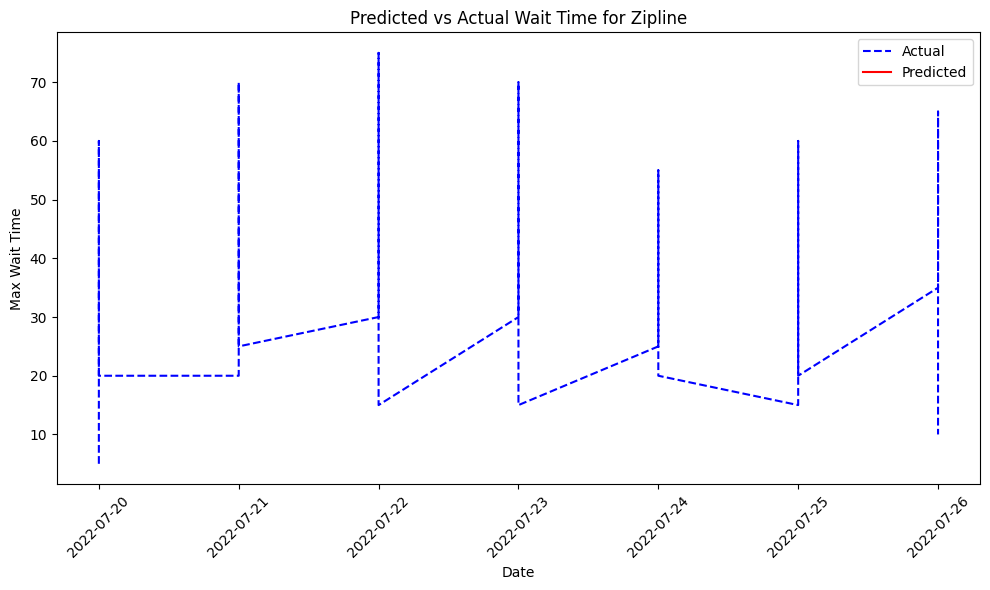

In [ ]:
import matplotlib.pyplot as plt

# Step 5: Make predictions with the best model
test_predictions = best_model.predict(test_df.drop('y', axis=1))

# Combine actual and predicted values in a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'ds': test_df['ds'],
    'actual': test_df['y'],
    'predicted': test_predictions
})

# Store predictions and calculate metrics
predictions_by_attraction[attraction] = {
    'test_df': test_df,
    'predictions': test_predictions,
    'best_params': grid_search.best_params_,
    'comparison_df': comparison_df  # Store the comparison dataframe
}

# Print comparison for a quick view
print(comparison_df.head())

# Optional: Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['ds'], comparison_df['actual'], label='Actual', color='blue', linestyle='--')
plt.plot(comparison_df['ds'], comparison_df['predicted'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Max Wait Time')
plt.title(f'Predicted vs Actual Wait Time for {attraction}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Plot for each attraction
for attraction in df['ENTITY_DESCRIPTION_SHORT'].unique():
    # Filter test data for this attraction
    mask = test['ENTITY_DESCRIPTION_SHORT'] == attraction
    test_attraction = test[mask]
    forecast_attraction = forecast[future['attraction'] == attraction]
    
    # Create plot
    plt.figure(figsize=(15, 7))
    plt.plot(test_attraction['USAGE_DATE'], test_attraction['WAIT_TIME_MAX'], 
             label='Actual', color='blue')
    plt.plot(test_attraction['USAGE_DATE'], forecast_attraction['yhat'], 
             label='Predicted', color='red', linestyle='--')
    
    # Add confidence intervals
    plt.fill_between(test_attraction['USAGE_DATE'],
                     forecast_attraction['yhat_lower'],
                     forecast_attraction['yhat_upper'],
                     color='red', alpha=0.1)
    
    # Calculate metrics
    mae = mean_absolute_error(test_attraction['WAIT_TIME_MAX'], forecast_attraction['yhat'])
    rmse = np.sqrt(mean_squared_error(test_attraction['WAIT_TIME_MAX'], forecast_attraction['yhat']))
    r2 = r2_score(test_attraction['WAIT_TIME_MAX'], forecast_attraction['yhat'])
    
    plt.title(f'Attraction {attraction}\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}')
    plt.xlabel('Date')
    plt.ylabel('Wait Time (minutes)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
df

DATE             DEB_TIME  DEB_TIME_HOUR  \
8456     2018-06-01  2018-06-01 09:00:00              9   
8457     2018-06-01  2018-06-01 09:15:00              9   
8458     2018-06-01  2018-06-01 09:30:00              9   
8459     2018-06-01  2018-06-01 09:45:00              9   
8460     2018-06-01  2018-06-01 10:00:00             10   
...             ...                  ...            ...   
2368528  2022-07-26  2022-07-26 21:45:00             21   
2368529  2022-07-26  2022-07-26 22:00:00             22   
2368530  2022-07-26  2022-07-26 22:15:00             22   
2368531  2022-07-26  2022-07-26 22:30:00             22   
2368532  2022-07-26  2022-07-26 22:45:00             22   

                        FIN_TIME ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  \
8456     2018-06-01 09:15:00.000              Bumper Cars              0   
8457     2018-06-01 09:30:00.000              Bumper Cars              0   
8458     2018-06-01 09:45:00.000              Bumper Cars              0   
8459     2018-06-01 10:00:00.000              Bumper Cars              0   
8460     2018-06-01 10:15:00.000              Bumper Cars              0   
...                          ...                      ...            ...   
2368528  2022-07-26 22:00:00.000                  Zipline             30   
2368529  2022-07-26 22:15:00.000                  Zipline             25   
2368530  2022-07-26 22:30:00.000                  Zipline             30   
2368531  2022-07-26 22:45:00.000                  Zipline             30   
2368532  2022-07-26 23:00:00.000                  Zipline             10   

         NB_UNITS  GUEST_CARRIED  CAPACITY  ADJUST_CAPACITY  ...  NB_MAX_UNIT  \
8456          0.0           0.00      0.00             0.00  ...         18.0   
8457          0.0           0.00      0.00             0.00  ...         18.0   
8458          0.0           0.00      0.00             0.00  ...         18.0   
8459          0.0           0.00      0.00             0.00  ...         18.0   
8460          0.0           0.00      0.00             0.00  ...         18.0   
...           ...            ...       ...              ...  ...          ...   
2368528      12.0          97.00    101.25           101.25  ...         12.0   
2368529      12.0          80.00    101.25           101.25  ...         12.0   
2368530      12.0          75.00    101.25           101.25  ...         12.0   
2368531      12.0         101.25    101.25           101.25  ...         12.0   
2368532      12.0          99.00    101.25           101.25  ...         12.0   

         REF_CLOSING_DESCRIPTION  PARK_ATTENDANCE  NIGHT_SHOW  PARADE_1  \
8456             Fermeture Réhab          46804.0         NaN       NaN   
8457             Fermeture Réhab          46804.0         NaN       NaN   
8458             Fermeture Réhab          46804.0         NaN       NaN   
8459             Fermeture Réhab          46804.0         NaN       NaN   
8460             Fermeture Réhab          46804.0         NaN       NaN   
...                          ...              ...         ...       ...   
2368528                      NaN          26391.0    23:00:00  17:30:00   
2368529                      NaN          26391.0    23:00:00  17:30:00   
2368530                      NaN          26391.0    23:00:00  17:30:00   
2368531                      NaN          26391.0    23:00:00  17:30:00   
2368532                      NaN          26391.0    23:00:00  17:30:00   

         PARADE_2   temp humidity wind_speed  is_holiday  
8456          NaN  18.55     87.0       2.95       False  
8457          NaN    NaN      NaN        NaN       False  
8458          NaN    NaN      NaN        NaN       False  
8459          NaN    NaN      NaN        NaN       False  
8460          NaN  19.47     85.0       2.01       False  
...           ...    ...      ...        ...         ...  
2368528       NaN    NaN      NaN        NaN       False  
2368529       NaN  17.80     74.0       3.47   